# Ciorna

0.009361566303394719


In [48]:
import sys
%load_ext autoreload
%autoreload 2

sys.path.append("../libs/")
from data_prep import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
from sklearn.metrics import confusion_matrix
from fairlearn.postprocessing import ThresholdOptimizer

# Load prepared data and models

In [50]:
for i in range(0, 11, 2):
    var_name = f"var_{i}"
    globals()[var_name] = i + 1

# Now you can access the variables directly
for i in range(0, 11, 2):
    var_name = f"var_{i}"
    #print(f"{var_name}: {globals()[var_name]}")

i=30
globals()[f'var{i}'], globals()[f'var{i+1}']=5,6
print(var30, var31)


5 6


# Computations on train and test 

In [51]:
ls_p1=[np.round(i,2) for i in np.arange(0.2, 1.05, 0.05)]
ls_p2=[np.round(i,2) for i in np.arange(0.2, 1.05, 0.05)]

import joblib

#Initialize scores
test_acc_scores_initial=dict() ##keys should be tuples with values of p1,p2
test_acc_scores_optim_age=dict()
test_acc_scores_optim_gender=dict()
test_fairness_age_scores_optim_age=dict()
test_fairness_age_scores_optim_gender=dict()
test_fairness_gender_scores_optim_age=dict() #fairness gdner after optimiz for age
test_fairness_gender_scores_optim_gender=dict()
test_initial_fairness_age=dict()
test_initial_fairness_gender=dict()

train_acc_scores_initial=dict() ##keys should be tuples with values of p1,p2
train_acc_scores_optim_age=dict()
train_acc_scores_optim_gender=dict()
train_fairness_age_scores_optim_age=dict()
train_fairness_age_scores_optim_gender=dict()
train_fairness_gender_scores_optim_age=dict() #fairness gdner after optimiz for age
train_fairness_gender_scores_optim_gender=dict()
train_initial_fairness_age=dict()
train_initial_fairness_gender=dict()




##Do same for train!!!!!!!!!!!!!!!!!!


for p1 in ls_p1: #This is for age
    for p2 in ls_p2: #This is for gender
        sufix_name= f'_{p1}_{p2}'
        X_train_with_A, X_val_with_A, X_test_with_A, y_train, y_val, y_test, age_train, age_val, \
             age_test, gender_train, gender_val, gender_test, ed_train, ed_val, ed_test= load_stored_data(
            age=True, gender=True, education=None,dataset_name='German_credit_biased', scale=True, sufix_name=f'_{p1}_{p2}')
        print('aaaaaaaaaaa',p1,p2)

        X_train_val_with_A, y_train_val = merge_two_sets(X_train_with_A, X_val_with_A, y_train, y_val)
        age_train_val, gender_train_val = merge_two_sets(age_train, age_val, gender_train, gender_val)


############## CONTINUA CU MODELS ITERATIVE #####################

        ##Load models  # Load the models from the files


        best_lr_A = joblib.load(f'../ML_models/German_credit_biased/best_logistic_regression_A_model{sufix_name}.pkl')

        best_lr_big_A =  joblib.load(f'../ML_models/German_credit_biased/best_logistic_regression_big_A_model{sufix_name}.pkl')
        # Now you have the loaded models in the respective variables

        ##Compute predictions


        y_train_pred_lr_A = best_lr_A.predict(X_train_with_A)
        y_val_pred_lr_A = best_lr_A.predict(X_val_with_A)
        y_test_pred_lr_A=best_lr_A.predict(X_test_with_A)
        y_train_val_pred_lr_A = best_lr_A.predict(X_train_val_with_A)

        threshold_optimizer = ThresholdOptimizer(estimator=best_lr_A, constraints="true_positive_rate_parity", objective= "accuracy_score", prefit=True)

        initial_acc_train_age, initial_acc_test_age, after_acc_train_age, after_acc_test_age, initial_fair_train_1_age, initial_fair_test_1_age, after_fair_train_1_age, after_fair_test_1_age, initial_fair_train_2_age, initial_fair_test_2_age, after_fair_train_2_age, after_fair_test_2_age = fairness_optimizer_results(threshold_optimizer,X_fit=X_val_with_A, y_fit=y_val_pred_lr_A, X_obs=X_test_with_A, y_obs=y_test_pred_lr_A, 
                    y_train=y_val, y_val=y_test, sensitive_1_fit= age_val, sensitive_2_fit=gender_val, sensitive_1_obs= age_test, sensitive_2_obs=gender_test,
                    name_1="AGE", name_2="GENDER", fitted=False)

        threshold_optimizer = ThresholdOptimizer(estimator=best_lr_A, constraints="true_positive_rate_parity", objective= "accuracy_score", prefit=True)

        initial_acc_train_gender, initial_acc_test_gender, after_acc_train_gender, after_acc_test_gender, initial_fair_train_1_gender, initial_fair_test_1_gender, after_fair_train_1_gender, after_fair_test_1_gender, initial_fair_train_2_gender, initial_fair_test_2_gender, after_fair_train_2_gender, after_fair_test_2_gender = fairness_optimizer_results(threshold_optimizer,X_fit=X_val_with_A, y_fit=y_val_pred_lr_A, X_obs=X_test_with_A, y_obs=y_test_pred_lr_A, 
                    y_train=y_val, y_val=y_test, sensitive_1_fit= gender_val, sensitive_2_fit=age_val, sensitive_1_obs= gender_test, sensitive_2_obs=age_test,
                    name_1="GENDER", name_2="AGE", fitted=False)

        print(initial_acc_train_age, initial_acc_test_age, after_acc_train_age, after_acc_test_age, initial_fair_train_1_age, initial_fair_test_1_age, after_fair_train_1_age, after_fair_test_1_age, initial_fair_train_2_age, initial_fair_test_2_age, after_fair_train_2_age, after_fair_test_2_age )
        test_acc_scores_initial[(p1,p2)] = initial_acc_test_age ##age does not matter! REMOVE LATER!!!
        test_acc_scores_optim_age[(p1,p2)] = after_acc_test_age #optimiz after age
        test_acc_scores_optim_gender[(p1,p2)] = after_acc_test_gender
        test_fairness_age_scores_optim_age[(p1,p2)] = after_fair_test_1_age ##optimiz after age
        test_fairness_age_scores_optim_gender[(p1,p2)] =after_fair_test_2_gender
        test_fairness_gender_scores_optim_age[(p1,p2)] = after_fair_test_2_age #fairness gender after optimiz for age
        test_fairness_gender_scores_optim_gender[(p1,p2)] = after_fair_test_1_gender
        test_initial_fairness_age[(p1,p2)] =initial_fair_test_1_age
        test_initial_fairness_gender[(p1,p2)] =initial_fair_test_1_gender
        assert initial_fair_test_1_age == initial_fair_test_2_gender , 'Initial should be equal.'

        ###DO THE SAME FOR TRAIN
        train_acc_scores_initial[(p1,p2)] = initial_acc_train_age ##age does not matter! REMOVE LATER!!!
        train_acc_scores_optim_age[(p1,p2)] = after_acc_train_age #optimiz after age
        train_acc_scores_optim_gender[(p1,p2)] = after_acc_train_gender
        train_fairness_age_scores_optim_age[(p1,p2)] = after_fair_train_1_age ##optimiz after age
        train_fairness_age_scores_optim_gender[(p1,p2)] =after_fair_train_2_gender
        train_fairness_gender_scores_optim_age[(p1,p2)] = after_fair_train_2_age #fairness gender after optimiz for age
        train_fairness_gender_scores_optim_gender[(p1,p2)] = after_fair_train_1_gender
        train_initial_fairness_age[(p1,p2)] =initial_fair_train_1_age
        train_initial_fairness_gender[(p1,p2)] =initial_fair_train_1_gender
        assert initial_fair_train_1_age == initial_fair_train_2_gender , 'Initial should be equal.'

        

        


aaaaaaaaaaa 0.2 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8253968253968254 0.8031496062992126 0.8174603174603174 0.7559055118110236 0.1436170212765957 0.2012578616352202 0.015957446808510634 0.47798742138364786 0.2898936170212766 0.08606557377049184 0.601063829787234 0.23770491803278693
aaaaaaaaaaa 0.2 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7984496124031008 0.7615384615384615 0.8062015503875969 0.7769230769230769 0.14905660377358498 0.1138392857142857 0.04528301886792452 0.0357142857142857 0.6793103448275861 0.3157894736842105 0.6103448275862069 0.26315789473684215
aaaaaaaaaaa 0.2 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.813953488372093 0.7441860465116279 0.8294573643410853 0.7131782945736435 0.5263157894736843 0.027272727272727226 0.06725146198830412 0.26363636363636367 0.6512605042016806 0.6984126984126984 0.2226890756302521 0.6984126984126984
aaaaaaaaaaa 0.2 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7575757575757576 0.8257575757575758 0.7424242424242424 0.8106060606060606 0.13982642237222753 0.07272727272727275 0.024108003857280624 0.07272727272727275 0.6607142857142857 0.39655172413793105 0.5915178571428572 0.2931034482758621
aaaaaaaaaaa 0.2 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7293233082706767 0.7611940298507462 0.7293233082706767 0.7313432835820896 0.2761904761904762 0.17261904761904767 0.060317460317460325 0.24404761904761907 0.2857142857142857 0.2068965517241379 0.15000000000000002 0.13793103448275867
aaaaaaaaaaa 0.2 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7651515151515151 0.7272727272727273 0.7348484848484849 0.6515151515151515 0.18452380952380953 0.33836206896551724 0.001984126984126977 0.0431034482758621 0.18452380952380953 0.234375 0.001984126984126977 0.09687500000000004
aaaaaaaaaaa 0.2 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7692307692307693 0.6793893129770993 0.8076923076923077 0.6641221374045801 0.035439137134052334 0.5647058823529412 0.046224961479198745 0.5431372549019609 0.25115562403698 0.1367521367521367 0.3697996918335902 0.10256410256410264
aaaaaaaaaaa 0.2 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7348484848484849 0.7424242424242424 0.696969696969697 0.6893939393939394 0.3610421836228288 0.5 0.03970223325062039 0.13636363636363635 0.10606060606060608 0.2878787878787879 0.16666666666666674 0.24242424242424243
aaaaaaaaaaa 0.2 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7686567164179104 0.7910447761194029 0.7388059701492538 0.6940298507462687 0.3356164383561644 0.34545454545454546 0.023287671232876783 0.33333333333333337 0.3196078431372549 0.10746812386156646 0.17843137254901964 0.1730418943533697
aaaaaaaaaaa 0.2 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7368421052631579 0.8045112781954887 0.7518796992481203 0.6390977443609023 0.2514619883040935 0.17156862745098045 0.023391812865497075 0.1519607843137255 0.4833091436865022 0.31818181818181823 0.525399129172714 0.12121212121212122
aaaaaaaaaaa 0.2 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7794117647058824 0.7573529411764706 0.7867647058823529 0.7867647058823529 0.4615384615384615 0.3055555555555556 0.015384615384615441 0.04166666666666663 0.20952380952380956 0.0060975609756097615 0.13650793650793647 0.14634146341463417
aaaaaaaaaaa 0.2 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7647058823529411 0.8088235294117647 0.7720588235294118 0.7794117647058824 0.3666666666666667 0.5129107981220657 0.0 0.016431924882629123 0.25558312655086846 0.013725490196078494 0.22332506203473945 0.05784313725490198
aaaaaaaaaaa 0.2 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6906474820143885 0.7785714285714286 0.6834532374100719 0.7285714285714285 0.0980392156862745 0.2850877192982456 0.009803921568627527 0.1991228070175438 0.4047619047619048 0.16263736263736261 0.13571428571428568 0.234065934065934
aaaaaaaaaaa 0.2 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7101449275362319 0.7266187050359713 0.7608695652173914 0.6906474820143885 0.31153846153846154 0.025568181818181768 0.02051282051282055 0.265625 0.09595959595959602 0.1166666666666667 0.18686868686868685 0.20000000000000007
aaaaaaaaaaa 0.2 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7304964539007093 0.7183098591549296 0.6950354609929078 0.6549295774647887 0.28260869565217395 0.4677103718199609 0.04347826086956519 0.21819960861056747 0.0357142857142857 0.09328358208955223 0.11428571428571432 0.012686567164179152
aaaaaaaaaaa 0.2 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7801418439716312 0.7163120567375887 0.7659574468085106 0.7021276595744681 0.3382352941176471 0.6218851570964247 0.044117647058823595 0.1180931744312026 0.39230769230769236 0.06985032074126862 0.20769230769230773 0.0007127583749109156
aaaaaaaaaaa 0.2 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7482517482517482 0.7916666666666666 0.7202797202797203 0.7013888888888888 0.41650853889943074 0.38095238095238093 0.015180265654649028 0.031746031746031744 0.06818181818181823 0.13235294117647056 0.003030303030302939 0.16176470588235292
aaaaaaaaaaa 0.25 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7480916030534351 0.8409090909090909 0.7480916030534351 0.7803030303030303 0.5082352941176471 0.03220338983050841 0.022352941176470575 0.015254237288135575 0.5642857142857143 0.4538461538461539 0.3285714285714286 0.43846153846153846
aaaaaaaaaaa 0.25 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7878787878787878 0.7348484848484849 0.7803030303030303 0.6893939393939394 0.2875 0.1620421753607103 0.08750000000000002 0.06326304106548286 0.20281690140845077 0.359375 0.08732394366197183 0.22395833333333337
aaaaaaaaaaa 0.25 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7368421052631579 0.7593984962406015 0.7518796992481203 0.7142857142857143 0.19590643274853792 0.1217948717948718 0.011695906432748537 0.08974358974358976 0.21031746031746024 0.4854202401372213 0.15476190476190477 0.46998284734133794
aaaaaaaaaaa 0.25 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7954545454545454 0.803030303030303 0.803030303030303 0.7424242424242424 0.17127799736495386 0.456060606060606 0.08036890645586292 0.456060606060606 0.22522522522522526 0.5027322404371586 0.23873873873873874 0.5027322404371586
aaaaaaaaaaa 0.25 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7575757575757576 0.6590909090909091 0.7954545454545454 0.6818181818181818 0.23134328358208955 0.15842490842490842 0.005597014925373123 0.1501831501831502 0.23134328358208955 0.4507936507936508 0.005597014925373123 0.4936507936507936
aaaaaaaaaaa 0.25 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7611940298507462 0.7703703703703704 0.8134328358208955 0.7703703703703704 0.14117647058823535 0.23076923076923084 0.02352941176470591 0.2615384615384616 0.4214285714285714 0.06982872200263501 0.17500000000000004 0.006587615283267456
aaaaaaaaaaa 0.25 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7744360902255639 0.7313432835820896 0.7969924812030075 0.7164179104477612 0.08606557377049184 0.33107344632768365 0.004098360655737654 0.1446327683615819 0.22115384615384615 0.27521367521367524 0.14423076923076927 0.10598290598290594
aaaaaaaaaaa 0.25 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7553956834532374 0.7285714285714285 0.7482014388489209 0.6857142857142857 0.3380952380952381 0.2678571428571429 0.004761904761904745 0.07738095238095244 0.2571428571428571 0.06349206349206349 0.24761904761904763 0.12698412698412698
aaaaaaaaaaa 0.25 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7872340425531915 0.7446808510638298 0.7304964539007093 0.6737588652482269 0.32539682539682535 0.3420168067226891 0.12698412698412698 0.032773109243697474 0.3643790849673203 0.26890756302521 0.18790849673202614 0.25966386554621845
aaaaaaaaaaa 0.25 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7299270072992701 0.7608695652173914 0.7153284671532847 0.6811594202898551 0.3645833333333333 0.32719393282773557 0.01041666666666663 0.0433369447453954 0.0710382513661203 0.005797101449275366 0.052459016393442526 0.011594202898550732
aaaaaaaaaaa 0.25 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7857142857142857 0.7730496453900709 0.7928571428571428 0.6737588652482269 0.38413197172034563 0.0973630831643002 0.05184603299293 0.07910750507099396 0.24642857142857144 0.11440677966101698 0.03928571428571426 0.08580508474576276
aaaaaaaaaaa 0.25 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7746478873239436 0.676056338028169 0.7605633802816901 0.676056338028169 0.09393346379647749 0.4419237749546279 0.004892367906066508 0.2323049001814882 0.07198142414860687 0.15454545454545454 0.07739938080495357 0.036363636363636376
aaaaaaaaaaa 0.25 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8297872340425532 0.7021276595744681 0.8297872340425532 0.7021276595744681 0.024436090225563922 0.34375 0.03195488721804507 0.296875 0.07816277195809829 0.005952380952380931 0.0547945205479452 0.0714285714285714
aaaaaaaaaaa 0.25 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7902097902097902 0.7622377622377622 0.6643356643356644 0.6993006993006993 0.47885572139303484 0.07675906183368864 0.04975124378109452 0.18550106609808092 0.04505494505494512 0.030391583869082472 0.25384615384615383 0.039158386908240694
aaaaaaaaaaa 0.25 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7375886524822695 0.8028169014084507 0.6879432624113475 0.6830985915492958 0.3158953722334005 0.14552238805970152 0.01609657947686116 0.03638059701492535 0.06333333333333335 0.09829059829059827 0.07000000000000006 0.27692307692307694
aaaaaaaaaaa 0.25 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7945205479452054 0.7328767123287672 0.7671232876712328 0.6986301369863014 0.17760617760617758 0.33478260869565224 0.01737451737451734 0.22753623188405803 0.10158730158730156 0.1402597402597402 0.06825396825396834 0.12402597402597404
aaaaaaaaaaa 0.25 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7619047619047619 0.7142857142857143 0.7687074829931972 0.6802721088435374 0.19857235561323816 0.0741935483870968 0.00843608046722899 0.16935483870967738 0.043269230769230727 0.11458333333333337 0.027644230769230727 0.22743055555555558
aaaaaaaaaaa 0.3 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7238805970149254 0.7686567164179104 0.746268656716418 0.7238805970149254 0.14839572192513362 0.20486815415821502 0.02406417112299475 0.02535496957403649 0.6035714285714286 0.13619402985074625 0.532142857142857 0.09328358208955223
aaaaaaaaaaa 0.3 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7669172932330827 0.7388059701492538 0.7744360902255639 0.7164179104477612 0.06578947368421051 0.17972350230414746 0.033717105263157854 0.09907834101382484 0.4166666666666667 0.4952380952380953 0.39166666666666666 0.6047619047619048
aaaaaaaaaaa 0.3 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7555555555555555 0.7205882352941176 0.7851851851851852 0.6985294117647058 0.012834224598930466 0.48630553864881315 0.012834224598930466 0.4297017650639075 0.8571428571428571 0.10336239103362388 0.8571428571428571 0.06226650062266503
aaaaaaaaaaa 0.3 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7391304347826086 0.697841726618705 0.7246376811594203 0.6402877697841727 0.2579710144927536 0.280188679245283 0.005797101449275366 0.12924528301886784 0.4493150684931506 0.4030054644808743 0.49452054794520545 0.4713114754098361
aaaaaaaaaaa 0.3 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7426470588235294 0.7132352941176471 0.7573529411764706 0.7132352941176471 0.2545454545454545 0.2687400318979266 0.042424242424242475 0.12200956937799046 0.41269841269841273 0.2115942028985508 0.20634920634920628 0.18405797101449284
aaaaaaaaaaa 0.3 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7279411764705882 0.7426470588235294 0.7573529411764706 0.6397058823529411 0.5532786885245902 0.2548387096774194 0.002732240437158473 0.03870967741935483 0.3937621832358674 0.2826797385620915 0.41812865497076024 0.18627450980392157
aaaaaaaaaaa 0.3 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7697841726618705 0.7482014388489209 0.7697841726618705 0.7482014388489209 0.11706349206349209 0.4580223880597015 0.007936507936507908 0.33582089552238803 0.10660980810234544 0.02049910873440286 0.07675906183368864 0.06595365418894827
aaaaaaaaaaa 0.3 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6879432624113475 0.7304964539007093 0.6879432624113475 0.7092198581560284 0.2827586206896552 0.2917232021709634 0.08908045977011492 0.07394843962008146 0.16190476190476188 0.5027777777777778 0.20571428571428574 0.1347222222222222
aaaaaaaaaaa 0.3 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7622377622377622 0.6944444444444444 0.7202797202797203 0.6805555555555556 0.3236842105263158 0.25454545454545463 0.0368421052631579 0.034848484848484906 0.18508771929824563 0.365530303030303 0.17105263157894735 0.3352272727272727
aaaaaaaaaaa 0.3 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8040540540540541 0.7094594594594594 0.7972972972972973 0.6959459459459459 0.0483772198407838 0.016402116402116418 0.01041028781383957 0.02910052910052907 0.012393998695368502 0.07793209876543206 0.0671885192433137 0.022376543209876587
aaaaaaaaaaa 0.3 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7605633802816901 0.6993006993006993 0.7887323943661971 0.6713286713286714 0.37451737451737455 0.05012531328320802 0.03667953667953672 0.08521303258145363 0.07787903893951953 0.11363636363636365 0.01905550952775481 0.14393939393939392
aaaaaaaaaaa 0.3 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7586206896551724 0.7241379310344828 0.7448275862068966 0.7034482758620689 0.12019230769230771 0.42961876832844575 0.02043269230769229 0.2360703812316715 0.1871657754010695 0.17295873573309917 0.05481283422459893 0.21510096575943816
aaaaaaaaaaa 0.3 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7671232876712328 0.7602739726027398 0.7671232876712328 0.6095890410958904 0.33854166666666663 0.36611062335381916 0.01041666666666663 0.07199297629499568 0.15138592750533042 0.17320028510334995 0.08031272210376683 0.07555238774055595
aaaaaaaaaaa 0.3 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.696551724137931 0.7465753424657534 0.6689655172413793 0.6232876712328768 0.37229437229437234 0.4595959595959596 0.0 0.14141414141414144 0.16645161290322574 0.1539589442815249 0.26193548387096777 0.22580645161290325
aaaaaaaaaaa 0.3 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7635135135135135 0.7432432432432432 0.7027027027027027 0.722972972972973 0.22807017543859653 0.29230769230769227 0.08771929824561397 0.13076923076923086 0.012536162005786 0.033333333333333326 0.28254580520732875 0.06848484848484848
aaaaaaaaaaa 0.3 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6413793103448275 0.7862068965517242 0.6758620689655173 0.7448275862068966 0.07499999999999996 0.406301824212272 0.002777777777777768 0.07711442786069644 0.049107142857142905 0.19345238095238093 0.0647321428571429 0.11235119047619047
aaaaaaaaaaa 0.3 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7619047619047619 0.7687074829931972 0.7755102040816326 0.7210884353741497 0.08441558441558439 0.12660028449502136 0.004870129870129802 0.21550497866287338 0.011596788581623496 0.020588235294117685 0.07760927743086532 0.04764705882352949
aaaaaaaaaaa 0.35 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7593984962406015 0.6766917293233082 0.7744360902255639 0.6842105263157895 0.14580941446613083 0.39871794871794874 0.025258323765786406 0.35128205128205126 0.4553990610328638 0.8387096774193549 0.3035993740219092 0.8709677419354839
aaaaaaaaaaa 0.35 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7293233082706767 0.7761194029850746 0.6992481203007519 0.7238805970149254 0.29117647058823526 0.20879120879120883 0.0039215686274509665 0.016483516483516425 0.39230769230769236 0.2222222222222222 0.14871794871794874 0.11111111111111116
aaaaaaaaaaa 0.35 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7910447761194029 0.762962962962963 0.7164179104477612 0.674074074074074 0.33220338983050846 0.1657894736842105 0.01242937853107351 0.10350877192982455 0.14925373134328357 0.48415492957746475 0.12579957356076754 0.5933098591549296
aaaaaaaaaaa 0.35 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7372262773722628 0.6788321167883211 0.7518248175182481 0.6934306569343066 0.15300546448087438 0.3595238095238095 0.07923497267759572 0.21190476190476182 0.22058823529411764 0.43693693693693697 0.03529411764705892 0.4234234234234235
aaaaaaaaaaa 0.35 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8156028368794326 0.75177304964539 0.7375886524822695 0.7021276595744681 0.270935960591133 0.18693284936479126 0.14778325123152702 0.03932244404113727 0.20599739243807047 0.464699683877766 0.1720990873533247 0.4099051633298208
aaaaaaaaaaa 0.35 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7142857142857143 0.7857142857142857 0.7142857142857143 0.7 0.19098143236074272 0.23945409429280395 0.049071618037135334 0.08188585607940446 0.3529411764705882 0.3615384615384616 0.26102941176470584 0.41538461538461535
aaaaaaaaaaa 0.35 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7676056338028169 0.7394366197183099 0.7816901408450704 0.7464788732394366 0.12890922959572848 0.2847394540942928 0.009916094584286772 0.15570719602977667 0.203125 0.2615384615384616 0.0625 0.22747252747252744
aaaaaaaaaaa 0.35 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7394366197183099 0.7272727272727273 0.8098591549295775 0.6853146853146853 0.31170568561872913 0.03240740740740733 0.012709030100334417 0.10185185185185186 0.24338624338624337 0.05443548387096775 0.11816578483245155 0.04233870967741937
aaaaaaaaaaa 0.35 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7202797202797203 0.7916666666666666 0.7552447552447552 0.7083333333333334 0.18756218905472644 0.22426470588235292 0.007960199004975133 0.05055147058823528 0.17032967032967028 0.21376811594202894 0.09432234432234432 0.07971014492753614
aaaaaaaaaaa 0.35 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6870748299319728 0.7210884353741497 0.7414965986394558 0.6530612244897959 0.05437853107344626 0.21818181818181825 0.015536723163841804 0.13090909090909086 0.2808219178082192 0.130718954248366 0.03150684931506842 0.03361344537815125
aaaaaaaaaaa 0.35 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7551020408163265 0.7482993197278912 0.7414965986394558 0.6870748299319728 0.1470795214637579 0.18270676691729326 0.08585503166783948 0.022556390977443552 0.13636363636363635 0.41450216450216454 0.09090909090909094 0.3495670995670996
aaaaaaaaaaa 0.35 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7919463087248322 0.7666666666666667 0.8053691275167785 0.7533333333333333 0.04140786749482406 0.2770562770562771 0.0020703933747411307 0.4047619047619048 0.2913533834586466 0.19870967741935486 0.25187969924812026 0.2464516129032257
aaaaaaaaaaa 0.35 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6821192052980133 0.7763157894736842 0.6887417218543046 0.7763157894736842 0.26392961876832843 0.18094758064516125 0.008797653958944274 0.09879032258064513 0.3529411764705882 0.05340375586854462 0.13235294117647056 0.040492957746478875
aaaaaaaaaaa 0.35 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7114093959731543 0.8053691275167785 0.738255033557047 0.7449664429530202 0.17272727272727273 0.21510673234811162 0.019393939393939408 0.03995621237000546 0.03169014084507038 0.05074626865671639 0.08450704225352113 0.04955223880597015
aaaaaaaaaaa 0.35 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7516339869281046 0.738562091503268 0.738562091503268 0.7058823529411765 0.19959677419354838 0.3115079365079365 0.022177419354838745 0.01388888888888884 0.02083333333333337 0.013157894736842146 0.05208333333333337 0.06798245614035081
aaaaaaaaaaa 0.35 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7236842105263158 0.7302631578947368 0.7302631578947368 0.6644736842105263 0.44248826291079807 0.3247162673392182 0.10856807511737088 0.053593947036570055 0.028205128205128216 0.022504892367906093 0.11282051282051286 0.06653620352250489
aaaaaaaaaaa 0.35 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7579617834394905 0.7707006369426752 0.7388535031847133 0.7452229299363057 0.17965367965367962 0.20238095238095233 0.011904761904761973 0.07539682539682546 0.07567567567567568 0.10317460317460314 0.037837837837837784 0.025793650793650813
aaaaaaaaaaa 0.4 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7194244604316546 0.7357142857142858 0.7194244604316546 0.6785714285714286 0.20152505446623092 0.3211289092295957 0.006535947712418277 0.02440884820747513 0.15384615384615385 0.09210526315789469 0.12307692307692308 0.3157894736842105
aaaaaaaaaaa 0.4 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7676056338028169 0.7746478873239436 0.8028169014084507 0.7746478873239436 0.16449275362318838 0.12680477087256747 0.007246376811594235 0.052730696798493404 0.21804511278195493 0.5497287522603979 0.1278195488721804 0.5750452079566004
aaaaaaaaaaa 0.4 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7428571428571429 0.7 0.7214285714285714 0.6928571428571428 0.11384615384615382 0.4467924528301887 0.040000000000000036 0.22566037735849054 0.025000000000000022 0.26388888888888884 0.10000000000000009 0.36111111111111116
aaaaaaaaaaa 0.4 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8098591549295775 0.6923076923076923 0.7816901408450704 0.6293706293706294 0.27951388888888884 0.19122257053291536 0.02083333333333337 0.10031347962382442 0.16276477146042367 0.02777777777777779 0.23968784838350055 0.2222222222222222
aaaaaaaaaaa 0.4 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7902097902097902 0.7552447552447552 0.7692307692307693 0.7062937062937062 0.2622807017543859 0.2661982825917252 0.007017543859649034 0.03903200624512104 0.09014423076923073 0.07857142857142863 0.22836538461538458 0.13333333333333341
aaaaaaaaaaa 0.4 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7692307692307693 0.7638888888888888 0.7482517482517482 0.7083333333333334 0.21370967741935487 0.3744959677419355 0.06048387096774188 0.11542338709677424 0.3157894736842105 0.03529411764705892 0.09210526315789469 0.01764705882352946
aaaaaaaaaaa 0.4 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7622377622377622 0.7832167832167832 0.7902097902097902 0.7272727272727273 0.1978260869565217 0.32932692307692313 0.04275362318840581 0.0036057692307692735 0.04112554112554112 0.28383458646616544 0.22077922077922074 0.2763157894736842
aaaaaaaaaaa 0.4 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6986301369863014 0.7808219178082192 0.6986301369863014 0.6506849315068494 0.3295944779982744 0.14905450500556172 0.004314063848144922 0.06117908787541715 0.4064293915040183 0.10492845786963434 0.5453501722158438 0.15103338632750396
aaaaaaaaaaa 0.4 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7152317880794702 0.8026315789473685 0.6887417218543046 0.756578947368421 0.14743589743589736 0.2185507246376811 0.03589743589743599 0.08811594202898543 0.06052855924978695 0.14619883040935677 0.12105711849957368 0.16520467836257302
aaaaaaaaaaa 0.4 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7142857142857143 0.722972972972973 0.7142857142857143 0.7162162162162162 0.3435960591133005 0.2623224728487886 0.06280788177339902 0.137844611528822 0.2139639639639639 0.27083333333333337 0.22747747747747749 0.19128787878787878
aaaaaaaaaaa 0.4 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7466666666666667 0.695364238410596 0.7733333333333333 0.7019867549668874 0.23096774193548386 0.40895372233400396 0.039354838709677376 0.2801810865191148 0.10386473429951693 0.024691358024691357 0.09420289855072461 0.030864197530864224
aaaaaaaaaaa 0.4 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7615894039735099 0.7302631578947368 0.7350993377483444 0.6710526315789473 0.3554778554778555 0.2785714285714286 0.011655011655011704 0.014285714285714346 0.09340659340659341 0.12791472351765498 0.11355311355311348 0.1319120586275816
aaaaaaaaaaa 0.4 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7682119205298014 0.7417218543046358 0.7350993377483444 0.7549668874172185 0.26099537037037035 0.460446247464503 0.04918981481481477 0.16125760649087217 0.1450704225352113 0.26086956521739135 0.16690140845070423 0.18840579710144933
aaaaaaaaaaa 0.4 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7402597402597403 0.7272727272727273 0.7532467532467533 0.6753246753246753 0.1461538461538462 0.25569358178053825 0.007692307692307665 0.17443064182194623 0.014308426073131986 0.04394977168949776 0.0238473767885532 0.15696347031963476
aaaaaaaaaaa 0.4 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7124183006535948 0.7124183006535948 0.6928104575163399 0.6405228758169934 0.375 0.1742584745762712 0.06060606060606066 0.2452330508474576 0.1108108108108109 0.00461133069828723 0.10270270270270276 0.09354413702239794
aaaaaaaaaaa 0.4 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7735849056603774 0.7484276729559748 0.6918238993710691 0.660377358490566 0.21857923497267762 0.29489164086687314 0.060109289617486295 0.012383900928792602 0.06939890710382512 0.15976951283394447 0.01038251366120213 0.22786799371398642
aaaaaaaaaaa 0.4 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7402597402597403 0.7727272727272727 0.7662337662337663 0.7207792207792207 0.08098591549295775 0.1324085750315258 0.004225352112676051 0.16645649432534682 0.03654970760233911 0.015671641791044744 0.09064327485380119 0.12313432835820892
aaaaaaaaaaa 0.45 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6857142857142857 0.7785714285714286 0.7285714285714285 0.7071428571428572 0.08840125391849529 0.22817460317460314 0.0018808777429467627 0.16666666666666663 0.37179487179487186 0.8285714285714286 0.14102564102564097 0.042857142857142816
aaaaaaaaaaa 0.45 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7394366197183099 0.704225352112676 0.7605633802816901 0.6901408450704225 0.1262553802008608 0.24888888888888883 0.010521281683405048 0.17333333333333334 0.12100840336134455 0.5053763440860215 0.14453781512605035 0.5053763440860215
aaaaaaaaaaa 0.45 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6971830985915493 0.7762237762237763 0.7535211267605634 0.7132867132867133 0.21285714285714286 0.03239556692242118 0.03428571428571425 0.1483375959079284 0.47098214285714285 0.11428571428571432 0.2879464285714286 0.3285714285714286
aaaaaaaaaaa 0.45 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7905405405405406 0.7248322147651006 0.7702702702702703 0.7181208053691275 0.17103448275862065 0.196078431372549 0.0013793103448276334 0.019607843137254832 0.5583333333333333 0.3666666666666667 0.42500000000000004 0.47333333333333333
aaaaaaaaaaa 0.45 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6712328767123288 0.7945205479452054 0.6986301369863014 0.7123287671232876 0.20967741935483875 0.24695740365111563 0.012406947890818754 0.09381338742393519 0.2207792207792208 0.17794117647058816 0.23376623376623373 0.05514705882352944
aaaaaaaaaaa 0.45 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7635135135135135 0.722972972972973 0.7635135135135135 0.6824324324324325 0.25251989389920426 0.045400238948626104 0.007957559681697535 0.08243727598566308 0.05751633986928106 0.1354430379746836 0.04052287581699354 0.26075949367088613
aaaaaaaaaaa 0.45 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7297297297297297 0.722972972972973 0.75 0.6486486486486487 0.13286713286713292 0.18787878787878787 0.0034965034965034336 0.08484848484848484 0.17670682730923704 0.07554417413572345 0.36278447121820623 0.3892445582586428
aaaaaaaaaaa 0.45 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7615894039735099 0.7894736842105263 0.7814569536423841 0.7105263157894737 0.23845108695652173 0.26912442396313363 0.07676630434782605 0.09216589861751145 0.0628019323671497 0.18726591760299627 0.007246376811594124 0.08614232209737827
aaaaaaaaaaa 0.45 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7207792207792207 0.7337662337662337 0.7792207792207793 0.7012987012987013 0.16602465331278893 0.12459371614301196 0.0007704160246533309 0.02708559046587211 0.14194139194139188 0.07234432234432231 0.034798534798534786 0.06593406593406603
aaaaaaaaaaa 0.45 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7337662337662337 0.7142857142857143 0.7532467532467533 0.6753246753246753 0.232174688057041 0.03752665245202569 0.0017825311942958333 0.011087420042643958 0.3192771084337349 0.2328042328042328 0.2657295850066934 0.08112874779541446
aaaaaaaaaaa 0.45 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7612903225806451 0.7161290322580646 0.7612903225806451 0.6838709677419355 0.2561669829222011 0.45079365079365075 0.004743833017077814 0.03968253968253965 0.36111111111111116 0.35111111111111104 0.125 0.1711111111111111
aaaaaaaaaaa 0.45 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7032258064516129 0.6774193548387096 0.7225806451612903 0.6838709677419355 0.030054644808743203 0.2568627450980392 0.03506375227686709 0.2715686274509804 0.2273954116059379 0.1601731601731602 0.18893387314439947 0.23376623376623384
aaaaaaaaaaa 0.45 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7006369426751592 0.7770700636942676 0.7006369426751592 0.7452229299363057 0.21323529411764708 0.30645161290322576 0.023897058823529438 0.06451612903225801 0.06478405315614622 0.1467391304347826 0.04485049833887045 0.22101449275362317
aaaaaaaaaaa 0.45 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7278481012658228 0.7421383647798742 0.7531645569620253 0.7232704402515723 0.2596491228070176 0.16017316017316008 0.05438596491228076 0.0800865800865801 0.04377880184331795 0.004645760743321681 0.006912442396313279 0.062137049941927924
aaaaaaaaaaa 0.45 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7133757961783439 0.759493670886076 0.7643312101910829 0.6455696202531646 0.10603715170278638 0.1730205278592376 0.020123839009287936 0.019061583577712704 0.06818181818181823 0.0691176470588235 0.07954545454545459 0.0625
aaaaaaaaaaa 0.45 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.782608695652174 0.7098765432098766 0.7701863354037267 0.7098765432098766 0.20833333333333337 0.10976702508960567 0.01666666666666672 0.07930107526881724 0.05327245053272445 0.034871794871794815 0.04921359715880269 0.02051282051282044
aaaaaaaaaaa 0.45 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7345679012345679 0.7283950617283951 0.7592592592592593 0.7222222222222222 0.35915492957746475 0.13636363636363635 0.0074823943661971315 0.12121212121212122 0.0033333333333332993 0.21081081081081088 0.050000000000000044 0.030270270270270294
aaaaaaaaaaa 0.5 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7163120567375887 0.8028169014084507 0.7446808510638298 0.7535211267605634 0.01388888888888884 0.24799286351471894 0.004629629629629539 0.07136485280999105 0.32089552238805974 0.275 0.2350746268656716 0.08214285714285718
aaaaaaaaaaa 0.5 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7916666666666666 0.7777777777777778 0.7569444444444444 0.7222222222222222 0.22440677966101696 0.31211180124223603 0.014915254237288122 0.06211180124223603 0.5584415584415584 0.5054054054054054 0.28571428571428575 0.5297297297297296
aaaaaaaaaaa 0.5 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6938775510204082 0.7142857142857143 0.7210884353741497 0.7346938775510204 0.06618464961067849 0.2482435597189696 0.021134593993325956 0.08606557377049184 0.2816091954022989 0.27922077922077926 0.3275862068965517 0.1645021645021646
aaaaaaaaaaa 0.5 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7945205479452054 0.7465753424657534 0.7397260273972602 0.6438356164383562 0.18894009216589858 0.2723214285714286 0.004608294930875556 0.024553571428571397 0.46703296703296704 0.2857142857142857 0.478021978021978 0.47023809523809523
aaaaaaaaaaa 0.5 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7808219178082192 0.7191780821917808 0.7945205479452054 0.7123287671232876 0.19176470588235295 0.3242835595776773 0.022941176470588243 0.09351432880844646 0.0033222591362126463 0.44350961538461536 0.04983388704318936 0.44471153846153844
aaaaaaaaaaa 0.5 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7483443708609272 0.8026315789473685 0.7814569536423841 0.6973684210526315 0.03208232445520587 0.0708333333333333 0.024818401937045986 0.08750000000000002 0.16103896103896098 0.4625121713729309 0.23116883116883125 0.3758519961051606
aaaaaaaaaaa 0.5 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7615894039735099 0.7218543046357616 0.7417218543046358 0.6423841059602649 0.23755656108597278 0.23468468468468462 0.007918552036199067 0.060810810810810856 0.20952380952380956 0.34337349397590367 0.2690476190476191 0.3192771084337349
aaaaaaaaaaa 0.5 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7171052631578947 0.7368421052631579 0.756578947368421 0.7039473684210527 0.21517857142857144 0.23018867924528308 0.0022321428571429047 0.01572327044025157 0.35227272727272724 0.42967032967032964 0.3522727272727273 0.3615384615384616
aaaaaaaaaaa 0.5 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7777777777777778 0.7516339869281046 0.7777777777777778 0.7058823529411765 0.21116315378610462 0.1921989824759751 0.010538641686182681 0.1724137931034483 0.09649122807017552 0.09290540540540537 0.09837092731829578 0.008445945945945943
aaaaaaaaaaa 0.5 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7368421052631579 0.7763157894736842 0.7631578947368421 0.7302631578947368 0.10219780219780217 0.2192982456140351 0.01978021978021971 0.14035087719298245 0.21794871794871795 0.14991181657848318 0.1282051282051282 0.08112874779541446
aaaaaaaaaaa 0.5 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7548387096774194 0.7564102564102564 0.832258064516129 0.6602564102564102 0.13837011884550088 0.0 0.005942275042444822 0.16666666666666663 0.043269230769230727 0.35526315789473684 0.03296703296703296 0.06390977443609025
aaaaaaaaaaa 0.5 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.732484076433121 0.7974683544303798 0.7707006369426752 0.7974683544303798 0.2333333333333334 0.17741935483870963 0.010389610389610393 0.11290322580645162 0.13937282229965153 0.023809523809523836 0.13937282229965153 0.1329365079365079
aaaaaaaaaaa 0.5 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7610062893081762 0.7358490566037735 0.7421383647798742 0.710691823899371 0.3134469696969697 0.14101995565410197 0.01041666666666663 0.18713968957871396 0.0725091288471571 0.0389249304911955 0.07198748043818459 0.17608897126969425
aaaaaaaaaaa 0.5 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7133757961783439 0.7848101265822784 0.6815286624203821 0.7215189873417721 0.15245009074410154 0.22785285285285284 0.03992740471869327 0.0611861861861861 0.33935585231736054 0.21473354231974928 0.2875098193244305 0.13375130616509923
aaaaaaaaaaa 0.5 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6894409937888198 0.6851851851851852 0.7267080745341615 0.6049382716049383 0.3454120397428404 0.3151515151515152 0.04850964348334297 0.203030303030303 0.02604166666666663 0.10520939734422885 0.00520833333333337 0.027068437180796656
aaaaaaaaaaa 0.5 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7607361963190185 0.7668711656441718 0.7361963190184049 0.7239263803680982 0.18449197860962563 0.07272727272727275 0.011140819964349347 0.17867132867132862 0.007179487179487243 0.0401157981803143 0.06974358974358974 0.03722084367245648
aaaaaaaaaaa 0.5 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7607361963190185 0.7177914110429447 0.7668711656441718 0.6932515337423313 0.18143459915611815 0.1166666666666667 0.0024613220815752346 0.08333333333333326 0.002405773857257487 0.009324009324009341 0.0112269446672012 0.0641025641025641
aaaaaaaaaaa 0.55 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7659574468085106 0.7323943661971831 0.8085106382978723 0.7394366197183099 0.19886363636363635 0.34484848484848485 0.011363636363636354 0.042424242424242475 0.8243243243243243 0.5995670995670996 0.3783783783783784 0.30519480519480524
aaaaaaaaaaa 0.55 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.738255033557047 0.7114093959731543 0.7583892617449665 0.6644295302013423 0.049258474576271194 0.09591836734693882 0.024894067796610186 0.08299319727891163 0.30454545454545456 0.5198412698412699 0.18522727272727268 0.7043650793650793
aaaaaaaaaaa 0.55 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7181208053691275 0.72 0.7919463087248322 0.64 0.34238875878220143 0.07748538011695905 0.011709601873536313 0.13888888888888895 0.3454545454545455 0.4951807228915663 0.36042780748663106 0.47108433734939764
aaaaaaaaaaa 0.55 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7278911564625851 0.7414965986394558 0.7551020408163265 0.7210884353741497 0.07726692209450825 0.01314217443249699 0.013409961685823757 0.07347670250896055 0.45300751879699247 0.1965579710144928 0.09022556390977443 0.12952898550724634
aaaaaaaaaaa 0.55 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7181208053691275 0.7114093959731543 0.7114093959731543 0.6778523489932886 0.11790878754171297 0.08517156862745101 0.010567296996663034 0.015318627450980338 0.425513698630137 0.43833333333333335 0.11900684931506844 0.18333333333333335
aaaaaaaaaaa 0.55 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7785234899328859 0.7066666666666667 0.7718120805369127 0.7333333333333333 0.1064516129032258 0.2564102564102565 0.003225806451612856 0.0871794871794872 0.36026936026936024 0.04960317460317454 0.3019079685746352 0.059523809523809534
aaaaaaaaaaa 0.55 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7647058823529411 0.7777777777777778 0.7973856209150327 0.7124183006535948 0.2552135054617677 0.10705095213587235 0.014399205561072548 0.13072568193515177 0.13596491228070184 0.2520852641334569 0.268421052631579 0.17979610750695085
aaaaaaaaaaa 0.55 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7467532467532467 0.7467532467532467 0.7012987012987013 0.6363636363636364 0.2933467741935484 0.15191256830601096 0.04385080645161288 0.07923497267759572 0.4083333333333333 0.2564102564102564 0.32500000000000007 0.28205128205128205
aaaaaaaaaaa 0.55 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6987179487179487 0.7261146496815286 0.6923076923076923 0.6751592356687898 0.2349624060150376 0.18827620466964723 0.015977443609022535 0.11376055638350724 0.04631441617742993 0.05792972459639123 0.12198303979125891 0.018043684710351338
aaaaaaaaaaa 0.55 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7884615384615384 0.7628205128205128 0.782051282051282 0.7051282051282052 0.22058823529411764 0.16562173458725182 0.02941176470588236 0.03970741901776387 0.17532467532467533 0.0015822784810126667 0.1525974025974025 0.015031645569620222
aaaaaaaaaaa 0.55 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8050314465408805 0.6625 0.7421383647798742 0.7 0.20211640211640214 0.46470828233374134 0.011111111111111183 0.19135046919624643 0.08873456790123457 0.14044605183845693 0.04861111111111116 0.1464737793851718
aaaaaaaaaaa 0.55 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7329192546583851 0.7329192546583851 0.7267080745341615 0.6894409937888198 0.167931688804554 0.03574432296047103 0.05502846299810238 0.05046257359125317 0.13328776486671223 0.0911047345767576 0.10799726589200276 0.10114777618364423
aaaaaaaaaaa 0.55 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7453416149068323 0.7283950617283951 0.7453416149068323 0.7160493827160493 0.16486486486486496 0.17161862527716176 0.009009009009009028 0.031485587583148456 0.11419068736141902 0.04791154791154795 0.12638580931263854 0.1117936117936118
aaaaaaaaaaa 0.55 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7283950617283951 0.7654320987654321 0.7592592592592593 0.7469135802469136 0.2572463768115941 0.2777777777777777 0.018115942028985477 0.16666666666666663 0.23754789272030652 0.032467532467532534 0.22030651340996166 0.10389610389610393
aaaaaaaaaaa 0.55 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7724550898203593 0.7365269461077845 0.7365269461077845 0.7005988023952096 0.24924242424242415 0.23441295546558705 0.008333333333333415 0.12874493927125508 0.011904761904761973 0.10228310502283111 0.011904761904761973 0.03789954337899548
aaaaaaaaaaa 0.55 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7151515151515152 0.7349397590361446 0.7272727272727273 0.7048192771084337 0.18178137651821868 0.25236167341430493 0.008502024291497934 0.1228070175438597 0.03606237816764135 0.006585612968591614 0.12085769980506822 0.07548125633232017
aaaaaaaaaaa 0.55 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7616279069767442 0.75 0.7674418604651163 0.7325581395348837 0.15264423076923073 0.12167832167832171 0.05248397435897434 0.04895104895104896 0.045200372786579734 0.10000000000000009 0.08108108108108103 0.011111111111111072
aaaaaaaaaaa 0.6 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8082191780821918 0.7876712328767124 0.773972602739726 0.7602739726027398 0.22520908004778972 0.13124999999999998 0.024492234169653515 0.125 0.6646586345381527 0.21609195402298853 0.676706827309237 0.006896551724137945
aaaaaaaaaaa 0.6 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7837837837837838 0.7027027027027027 0.8040540540540541 0.6891891891891891 0.13003095975232204 0.26168699186991873 0.0010319917440660964 0.11229674796747968 0.4523809523809524 0.0662020905923345 0.42857142857142855 0.3153310104529617
aaaaaaaaaaa 0.6 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7947019867549668 0.7086092715231788 0.8278145695364238 0.6754966887417219 0.17232597623089974 0.09150757077024363 0.001697792869269965 0.02896642527978932 0.5380434782608695 0.28 0.32065217391304346 0.15999999999999992
aaaaaaaaaaa 0.6 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7777777777777778 0.7581699346405228 0.7516339869281046 0.7908496732026143 0.11376055638350724 0.12037037037037035 0.03427719821162434 0.06481481481481477 0.40476190476190477 0.6602564102564102 0.38095238095238093 0.5897435897435899
aaaaaaaaaaa 0.6 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7086092715231788 0.8344370860927153 0.7019867549668874 0.7284768211920529 0.26555299539170507 0.021212121212121238 0.006912442396313279 0.0696969696969697 0.17333333333333334 0.09772727272727266 0.20999999999999996 0.34318181818181825
aaaaaaaaaaa 0.6 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7792207792207793 0.7096774193548387 0.7532467532467533 0.7548387096774194 0.21357063403781973 0.1650246305418719 0.05784204671857618 0.018883415435139606 0.1428571428571428 0.0029761904761904656 0.25324675324675316 0.06845238095238093
aaaaaaaaaaa 0.6 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7628205128205128 0.75 0.7564102564102564 0.7371794871794872 0.17803030303030298 0.3516129032258065 0.01461038961038963 0.21198156682027647 0.09324009324009319 0.13286264441591777 0.010489510489510523 0.06803594351733
aaaaaaaaaaa 0.6 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7763975155279503 0.7777777777777778 0.8074534161490683 0.7530864197530864 0.1713747645951036 0.07358834244080148 0.004143126177024503 0.0480874316939891 0.2682539682539682 0.045348837209302384 0.06507936507936518 0.06860465116279069
aaaaaaaaaaa 0.6 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7006369426751592 0.7974683544303798 0.7579617834394905 0.7911392405063291 0.07894736842105254 0.027113237639553422 0.040935672514619936 0.053429027113237604 0.04134615384615381 0.2681159420289856 0.0788461538461539 0.0036231884057971175
aaaaaaaaaaa 0.6 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7 0.7080745341614907 0.7125 0.7204968944099379 0.21879483500717356 0.28214129003949107 0.038737446197991354 0.010092145677928932 0.12878787878787878 0.3638095238095238 0.14502164502164505 0.17714285714285716
aaaaaaaaaaa 0.6 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7272727272727273 0.7696969696969697 0.7454545454545455 0.7757575757575758 0.062053571428571375 0.15235065394132208 0.004910714285714324 0.10357016613644399 0.05549199084668188 0.05647176411794097 0.02517162471395884 0.07946026986506738
aaaaaaaaaaa 0.6 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7818181818181819 0.7289156626506024 0.8 0.7530120481927711 0.06437425029988009 0.13181818181818172 0.009596161535385783 0.0984848484848484 0.05243902439024395 0.2404761904761905 0.03292682926829271 0.21666666666666667
aaaaaaaaaaa 0.6 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7544910179640718 0.7083333333333334 0.7544910179640718 0.7083333333333334 0.1970893970893971 0.1262553802008608 0.0070686070686070135 0.05954088952654235 0.02834199338686827 0.001831501831501825 0.00803023145961268 0.046398046398046344
aaaaaaaaaaa 0.6 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7228915662650602 0.8143712574850299 0.7048192771084337 0.6946107784431138 0.0874296435272045 0.08333333333333326 0.028517823639774842 0.06944444444444442 0.1692307692307693 0.04938271604938271 0.15865384615384615 0.345679012345679
aaaaaaaaaaa 0.6 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7710843373493976 0.7604790419161677 0.8192771084337349 0.7065868263473054 0.06839826839826846 0.11592505854800939 0.04329004329004327 0.004683840749414525 0.054964539007092195 0.026862026862026878 0.019503546099290836 0.01098901098901095
aaaaaaaaaaa 0.6 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8323353293413174 0.7142857142857143 0.8383233532934131 0.7023809523809523 0.032224532224532254 0.1080675422138837 0.019057519057519068 0.1080675422138837 0.013445378151260567 0.044731182795698876 0.03697478991596648 0.044731182795698876
aaaaaaaaaaa 0.6 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.788235294117647 0.6941176470588235 0.8 0.6647058823529411 0.22420506164828025 0.2519111758281761 0.008111615833874097 0.10957408081543496 0.0479797979797979 0.14746543778801835 0.038961038961038974 0.25094260578131544
aaaaaaaaaaa 0.65 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7748344370860927 0.8079470198675497 0.7947019867549668 0.7880794701986755 0.07647058823529418 0.19373219373219364 0.01764705882352946 0.054131054131054124 0.40697674418604646 0.33554817275747506 0.43023255813953487 0.3588039867109635
aaaaaaaaaaa 0.65 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7516778523489933 0.7666666666666667 0.738255033557047 0.6733333333333333 0.2256438969764838 0.15138592750533042 0.008398656215005573 0.1769722814498934 0.6461038961038961 0.577922077922078 0.3652597402597403 0.48214285714285715
aaaaaaaaaaa 0.65 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7350993377483444 0.7748344370860927 0.7483443708609272 0.7284768211920529 0.16363636363636358 0.04435483870967738 0.006060606060605989 0.08366935483870963 0.43562610229276894 0.2537878787878788 0.4603174603174603 0.19696969696969702
aaaaaaaaaaa 0.65 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7105263157894737 0.8092105263157895 0.75 0.7894736842105263 0.11027568922305764 0.1398601398601398 0.002005012531328343 0.07365967365967363 0.20487804878048788 0.326797385620915 0.23902439024390243 0.3973856209150326
aaaaaaaaaaa 0.65 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7628205128205128 0.7692307692307693 0.7756410256410257 0.7435897435897436 0.0914786967418546 0.06896551724137934 0.003759398496240629 0.1724137931034483 0.3595238095238096 0.5802469135802468 0.25 0.5555555555555556
aaaaaaaaaaa 0.65 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7875 0.7125 0.7875 0.70625 0.05997001499250376 0.23804143126177024 0.012493753123438256 0.11939736346516006 0.10678733031674204 0.33626588465298146 0.31402714932126696 0.26099706744868034
aaaaaaaaaaa 0.65 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7707006369426752 0.7531645569620253 0.7515923566878981 0.7025316455696202 0.1473429951690821 0.10163934426229504 0.019323671497584516 0.003278688524590123 0.20329670329670324 0.3355855855855856 0.25274725274725274 0.3513513513513513
aaaaaaaaaaa 0.65 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.710691823899371 0.7375 0.7169811320754716 0.69375 0.3397177419354839 0.010508617065994041 0.020161290322580627 0.22026061370323669 0.25168401714635646 0.30487804878048785 0.16227801592161673 0.21138211382113825
aaaaaaaaaaa 0.65 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7361963190184049 0.7791411042944786 0.7177914110429447 0.7423312883435583 0.30236159504452187 0.23237179487179493 0.014711575687185396 0.044871794871794934 0.10037573805689748 0.00974658869395717 0.09339774557165859 0.05588044184535412
aaaaaaaaaaa 0.65 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7080745341614907 0.7018633540372671 0.7391304347826086 0.6459627329192547 0.19638648860958363 0.1597701149425288 0.0483110761979576 0.012643678160919491 0.03977968176254587 0.11688311688311692 0.05875152998776012 0.16883116883116878
aaaaaaaaaaa 0.65 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7393939393939394 0.7151515151515152 0.7393939393939394 0.7393939393939394 0.18719397363465162 0.18253968253968256 0.003389830508474634 0.0793650793650793 0.1331981068289384 0.004605263157894668 0.18052738336713992 0.08223684210526316
aaaaaaaaaaa 0.65 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7530120481927711 0.7664670658682635 0.7650602409638554 0.7664670658682635 0.029844472467423278 0.053417124901806834 0.01345102984447244 0.053417124901806834 0.12 0.1635802469135802 0.16000000000000003 0.1635802469135802
aaaaaaaaaaa 0.65 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7696969696969697 0.7349397590361446 0.7575757575757576 0.6987951807228916 0.07453416149068315 0.12115153938424628 0.0365769496204279 0.047181127548980406 0.09038800705467376 0.07159090909090904 0.0806878306878307 0.10113636363636369
aaaaaaaaaaa 0.65 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.791907514450867 0.7687861271676301 0.815028901734104 0.7456647398843931 0.010135135135135087 0.11337868480725621 0.007432432432432412 0.1201814058956916 0.10963455149501666 0.029919447640966546 0.04900332225913617 0.05024932873034138
aaaaaaaaaaa 0.65 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7209302325581395 0.7209302325581395 0.7558139534883721 0.7034883720930233 0.14505494505494498 0.17479541734860882 0.04029304029304037 0.018003273322422242 0.08446251129177962 0.0948121645796065 0.023035230352303482 0.009838998211091243
aaaaaaaaaaa 0.65 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7457627118644068 0.7966101694915254 0.7740112994350282 0.7231638418079096 0.08986928104575165 0.03549245785270627 0.013071895424836666 0.10026619343389531 0.270281124497992 0.039682539682539764 0.2313253012048193 0.11031746031746026
aaaaaaaaaaa 0.65 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7701149425287356 0.7528735632183908 0.7931034482758621 0.7068965517241379 0.10393487109905031 0.2002635046113307 0.007869742198100438 0.09881422924901184 0.045592705167173286 0.13023255813953483 0.020516717325227973 0.15514950166112962
aaaaaaaaaaa 0.7 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7466666666666667 0.7533333333333333 0.7733333333333333 0.74 0.0949494949494949 0.18538324420677355 0.016161616161616155 0.18538324420677355 0.45142857142857146 0.6918918918918919 0.3352380952380952 0.6918918918918919
aaaaaaaaaaa 0.7 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7662337662337663 0.6774193548387096 0.7792207792207793 0.7032258064516129 0.10105580693815985 0.09462759462759462 0.016591251885369473 0.01526251526251532 0.3125 0.6018518518518519 0.35 0.5401234567901234
aaaaaaaaaaa 0.7 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7225806451612903 0.8012820512820513 0.7419354838709677 0.7371794871794872 0.20512820512820518 0.2138200782268579 0.044871794871794934 0.07779226423294228 0.18039215686274512 0.35164835164835173 0.19215686274509802 0.47252747252747257
aaaaaaaaaaa 0.7 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7096774193548387 0.782051282051282 0.7419354838709677 0.7115384615384616 0.14486391571553991 0.06209677419354842 0.016242317822651398 0.07016129032258067 0.6959595959595959 0.5806451612903225 0.19494949494949498 0.48028673835125446
aaaaaaaaaaa 0.7 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7169811320754716 0.7861635220125787 0.7169811320754716 0.7044025157232704 0.2785547785547785 0.18693693693693691 0.01631701631701632 0.024774774774774744 0.3351648351648352 0.10882352941176465 0.005494505494505475 0.084313725490196
aaaaaaaaaaa 0.7 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.725 0.6583850931677019 0.70625 0.6459627329192547 0.2455197132616488 0.255358807082945 0.006272401433691788 0.08807082945013978 0.08636363636363631 0.2720057720057719 0.0636363636363636 0.3831168831168831
aaaaaaaaaaa 0.7 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7607361963190185 0.7177914110429447 0.7975460122699386 0.6809815950920245 0.014336917562724039 0.12919594067135054 0.0025601638504864077 0.13348946135831385 0.04285714285714293 0.30219780219780223 0.14821428571428574 0.358974358974359
aaaaaaaaaaa 0.7 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7125748502994012 0.7664670658682635 0.7305389221556886 0.7005988023952096 0.1362126245847176 0.22283813747228387 0.0053156146179401675 0.09756097560975607 0.2721164613661814 0.2080459770114943 0.09462486002239645 0.19999999999999996
aaaaaaaaaaa 0.7 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7607361963190185 0.803680981595092 0.803680981595092 0.754601226993865 0.13524590163934425 0.10840108401084003 0.005216095380029762 0.03561749903213318 0.0547752808988764 0.2028985507246377 0.0835674157303371 0.06521739130434778
aaaaaaaaaaa 0.7 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6994219653179191 0.7514450867052023 0.7630057803468208 0.7514450867052023 0.15674603174603174 0.24461839530332674 0.033068783068783025 0.09817351598173507 0.04149933065595712 0.07999999999999996 0.02677376171352075 0.033333333333333326
aaaaaaaaaaa 0.7 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7134502923976608 0.7719298245614035 0.7426900584795322 0.7309941520467836 0.2792574656981437 0.1848940533151059 0.0266343825665859 0.07723855092276144 0.10460829493087553 0.04222222222222227 0.004147465437787989 0.020000000000000018
aaaaaaaaaaa 0.7 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7485380116959064 0.7485380116959064 0.8070175438596491 0.7017543859649122 0.17855072463768118 0.19617742517129466 0.041449275362318794 0.0973674720519293 0.1539589442815249 0.028455284552845517 0.06085043988269789 0.06402439024390238
aaaaaaaaaaa 0.7 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7109826589595376 0.7572254335260116 0.7398843930635838 0.7341040462427746 0.21576384662203296 0.058313085734120085 0.016433353621424174 0.16244359597362035 0.22947454844006565 0.033333333333333326 0.09811165845648606 0.06666666666666665
aaaaaaaaaaa 0.7 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.75 0.7514450867052023 0.7325581395348837 0.7861271676300579 0.1959505833905284 0.009948415622697104 0.01818805765271103 0.08732498157700819 0.3047619047619048 0.1037000973709834 0.20523809523809522 0.1037000973709834
aaaaaaaaaaa 0.7 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7542857142857143 0.7443181818181818 0.7542857142857143 0.7386363636363636 0.08613184079601999 0.11384845091452034 0.0024875621890546595 0.005225830533781228 0.08396084337349397 0.08321308321308318 0.030873493975903665 0.16642616642616637
aaaaaaaaaaa 0.7 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7359550561797753 0.7471910112359551 0.7584269662921348 0.7471910112359551 0.04900064474532562 0.13055222088835539 0.0035460992907802025 0.09213685474189681 0.014015151515151536 0.0662118780096308 0.06212121212121213 0.056982343499197396
aaaaaaaaaaa 0.7 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7528089887640449 0.7430167597765364 0.7696629213483146 0.7318435754189944 0.13809523809523805 0.18571428571428572 0.023015873015873045 0.04761904761904756 0.01837349397590371 0.004065040650406582 0.15542168674698797 0.047154471544715526
aaaaaaaaaaa 0.75 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7468354430379747 0.710691823899371 0.7784810126582279 0.7232704402515723 0.11164274322169054 0.00048216007714563247 0.001993620414672992 0.042912246865959514 0.33801498127340823 0.521551724137931 0.11048689138576773 0.5560344827586207
aaaaaaaaaaa 0.75 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7388535031847133 0.7341772151898734 0.732484076433121 0.7088607594936709 0.11666666666666659 0.2345559845559846 0.011111111111111183 0.0646718146718146 0.30681818181818177 0.5747126436781609 0.25 0.4942528735632184
aaaaaaaaaaa 0.75 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7243589743589743 0.7115384615384616 0.7948717948717948 0.6666666666666666 0.03138622493461207 0.10848549946294306 0.016129032258064502 0.020408163265306145 0.3620689655172413 0.38607594936708856 0.011494252873563204 0.125
aaaaaaaaaaa 0.75 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.732484076433121 0.740506329113924 0.7579617834394905 0.7341772151898734 0.030364372469635637 0.1518708730741013 0.037449392712550544 0.1254585473220836 0.48141891891891897 0.5193423597678917 0.5304054054054054 0.45551257253384914
aaaaaaaaaaa 0.75 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.775 0.7453416149068323 0.775 0.7204968944099379 0.11024844720496896 0.18621013133208253 0.03105590062111796 0.14258911819887432 0.43727598566308246 0.17951807228915662 0.43727598566308246 0.17951807228915662
aaaaaaaaaaa 0.75 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7349397590361446 0.7604790419161677 0.7409638554216867 0.7604790419161677 0.15252976190476186 0.1749163879598663 0.00520833333333337 0.02608695652173909 0.2881692002643754 0.25416666666666665 0.2181097157964309 0.08958333333333335
aaaaaaaaaaa 0.75 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8414634146341463 0.7378048780487805 0.8536585365853658 0.7195121951219512 0.0606725146198831 0.1605698883326916 0.004385964912280715 0.1417019638043897 0.1611111111111111 0.15476190476190477 0.14444444444444438 0.16666666666666674
aaaaaaaaaaa 0.75 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7218934911242604 0.7294117647058823 0.7514792899408284 0.7058823529411765 0.15454545454545454 0.18273809523809526 0.016363636363636358 0.0071428571428571175 0.27624602332979853 0.14619883040935677 0.2258748674443266 0.27166400850611383
aaaaaaaaaaa 0.75 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7321428571428571 0.727810650887574 0.7380952380952381 0.7692307692307693 0.15882874889086074 0.16124429223744297 0.03549245785270627 0.00827625570776247 0.19047619047619047 0.3661904761904762 0.14430014430014426 0.1104761904761905
aaaaaaaaaaa 0.75 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7321428571428571 0.757396449704142 0.7440476190476191 0.6804733727810651 0.20516717325227962 0.0888888888888888 0.052051671732522786 0.15555555555555556 0.20461538461538453 0.2962962962962963 0.2317948717948718 0.23456790123456783
aaaaaaaaaaa 0.75 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7619047619047619 0.7321428571428571 0.7916666666666666 0.6726190476190477 0.1873015873015873 0.16549295774647887 0.0 0.07323943661971821 0.055421686746987886 0.2510989010989011 0.06361445783132536 0.24010989010989003
aaaaaaaaaaa 0.75 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7853107344632768 0.7401129943502824 0.7966101694915254 0.7231638418079096 0.06153846153846154 0.1875 0.0013986013986013734 0.07211538461538458 0.008964589870013473 0.29171868497711195 0.047960555804571925 0.2143154390345402
aaaaaaaaaaa 0.75 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7068965517241379 0.7816091954022989 0.7298850574712644 0.7758620689655172 0.02543035993740217 0.13800904977375572 0.0027386541471048353 0.1368778280542987 0.014056224899598457 0.1852631578947369 0.015562248995984018 0.2126315789473684
aaaaaaaaaaa 0.75 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7486033519553073 0.7597765363128491 0.7430167597765364 0.6983240223463687 0.06798245614035092 0.24960753532182112 0.005756578947368474 0.1017268445839874 0.1688904494382022 0.020224719101123556 0.1025280898876404 0.07011235955056183
aaaaaaaaaaa 0.75 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.797752808988764 0.7865168539325843 0.7865168539325843 0.7415730337078652 0.20279512340172456 0.04761904761904767 0.00535236396074934 0.04761904761904756 0.16212338593974185 0.04973118279569888 0.11334289813486376 0.037634408602150504
aaaaaaaaaaa 0.75 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7624309392265194 0.7348066298342542 0.7790055248618785 0.7403314917127072 0.04012539184952979 0.13304347826086949 0.02288401253918504 0.12405797101449278 0.015662650602409567 0.06231671554252194 0.0036144578313253017 0.05278592375366564
aaaaaaaaaaa 0.75 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7582417582417582 0.6758241758241759 0.7692307692307693 0.6373626373626373 0.050982800982800947 0.08606557377049184 0.00614250614250611 0.09279859484777508 0.09688346883468835 0.0557432432432432 0.10365853658536583 0.24898648648648647
aaaaaaaaaaa 0.8 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7151898734177216 0.7484276729559748 0.740506329113924 0.7358490566037735 0.1867007672634271 0.150642445724413 0.006393861892583064 0.049180327868852514 0.4390804597701149 0.4835164835164835 0.26551724137931043 0.03296703296703296
aaaaaaaaaaa 0.8 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6894409937888198 0.7839506172839507 0.7391304347826086 0.7592592592592593 0.32002851033499646 0.13880445795339413 0.03349964362081248 0.05775075987841949 0.4938144329896907 0.27 0.38659793814432986 0.31000000000000005
aaaaaaaaaaa 0.8 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7018633540372671 0.7701863354037267 0.7018633540372671 0.6956521739130435 0.25 0.05572755417956654 0.005128205128205221 0.1940144478844169 0.2571428571428571 0.2193064667291471 0.2333333333333334 0.21743205248359887
aaaaaaaaaaa 0.8 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7423312883435583 0.7423312883435583 0.7791411042944786 0.7423312883435583 0.15320704553007647 0.20808323329331735 0.0016616816218012476 0.027611044417767072 0.26315789473684215 0.38903625110521656 0.15087719298245617 0.48894783377542
aaaaaaaaaaa 0.8 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7710843373493976 0.7530120481927711 0.7891566265060241 0.7168674698795181 0.03783996846669302 0.11309523809523803 0.033504138746551004 0.023809523809523725 0.096551724137931 0.1274853801169591 0.1954022988505747 0.0011695906432748204
aaaaaaaaaaa 0.8 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7423312883435583 0.7012195121951219 0.7300613496932515 0.6707317073170732 0.08429118773946354 0.20338266384778003 0.019157088122605415 0.029598308668076112 0.16307471264367812 0.36796536796536794 0.1681034482758621 0.3030303030303031
aaaaaaaaaaa 0.8 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7692307692307693 0.6941176470588235 0.7692307692307693 0.7352941176470589 0.16666666666666663 0.13317191283292973 0.007575757575757569 0.16585956416464898 0.21130952380952372 0.07779349363507782 0.2321428571428571 0.01555869872701554
aaaaaaaaaaa 0.8 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7894736842105263 0.7602339181286549 0.8011695906432749 0.6842105263157895 0.14030218933086647 0.16228070175438591 0.009559050262102908 0.04385964912280704 0.08119658119658113 0.030196629213483095 0.004273504273504258 0.0035112359550562022
aaaaaaaaaaa 0.8 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7294117647058823 0.783625730994152 0.7588235294117647 0.7076023391812866 0.1522807017543859 0.04119318181818177 0.017894736842105297 0.024147727272727293 0.05057471264367808 0.05555555555555547 0.06206896551724128 0.12222222222222212
aaaaaaaaaaa 0.8 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7572254335260116 0.6878612716763006 0.7572254335260116 0.6705202312138728 0.03887449092928541 0.054747912155892364 0.01629026286560542 0.04237550262913703 0.15087719298245617 0.14160839160839156 0.07719298245614037 0.1774475524475525
aaaaaaaaaaa 0.8 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7401129943502824 0.751412429378531 0.768361581920904 0.711864406779661 0.09963588215822572 0.01031746031746028 0.002648129758358153 0.02619047619047621 0.1378848728246318 0.07290729072907287 0.04997768853190543 0.1183618361836184
aaaaaaaaaaa 0.8 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8202247191011236 0.770949720670391 0.8202247191011236 0.7653631284916201 0.11174089068825921 0.13494623655913984 0.006747638326585648 0.014516129032258074 0.02163461538461542 0.15724637681159415 0.004006410256410242 0.01231884057971011
aaaaaaaaaaa 0.8 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7374301675977654 0.7486033519553073 0.7430167597765364 0.7206703910614525 0.10302830809743246 0.11546685673556667 0.00987491770901916 0.048705155618911866 0.1656626506024096 0.2165413533834587 0.12908777969018936 0.25714285714285723
aaaaaaaaaaa 0.8 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7650273224043715 0.7445652173913043 0.7704918032786885 0.7445652173913043 0.09670329670329669 0.053763440860215006 0.008791208791208871 0.060752688172042935 0.07752577319587628 0.03623188405797095 0.0024742268041237914 0.11376811594202896
aaaaaaaaaaa 0.8 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7650273224043715 0.7595628415300546 0.7650273224043715 0.7540983606557377 0.17385444743935308 0.22014051522248246 0.00862533692722367 0.012230028623471223 0.19249649368863953 0.07973856209150332 0.05294530154277699 0.03594771241830064
aaaaaaaaaaa 0.8 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7258064516129032 0.7204301075268817 0.7580645161290323 0.6935483870967742 0.12253249879634087 0.12907683803206194 0.02864708714492059 0.05555555555555558 0.14331550802139037 0.02651515151515149 0.021925133689839504 0.0492424242424242
aaaaaaaaaaa 0.8 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7526881720430108 0.7379679144385026 0.8118279569892473 0.6844919786096256 0.16176470588235292 0.15909090909090906 0.0 0.005411255411255422 0.03533026113671278 0.16149870801033595 0.0 0.007105943152454719
aaaaaaaaaaa 0.85 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7453416149068323 0.7888198757763976 0.7701863354037267 0.7763975155279503 0.16149068322981364 0.14795918367346939 0.013198757763975166 0.03826530612244894 0.6144329896907217 0.1284722222222222 0.45567010309278344 0.20833333333333337
aaaaaaaaaaa 0.85 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7515527950310559 0.7962962962962963 0.7453416149068323 0.7716049382716049 0.20238095238095233 0.018650793650793585 0.0267857142857143 0.1876984126984127 0.75 0.32474226804123707 0.45833333333333337 0.365979381443299
aaaaaaaaaaa 0.85 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7300613496932515 0.7317073170731707 0.7607361963190185 0.75 0.05542452830188682 0.06547619047619047 0.01297169811320753 0.038690476190476275 0.23521505376344087 0.2952380952380953 0.196236559139785 0.3507936507936509
aaaaaaaaaaa 0.85 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7349397590361446 0.7425149700598802 0.7590361445783133 0.7365269461077845 0.01657824933687002 0.019191919191919204 0.0006631299734748408 0.08585858585858586 0.5186170212765957 0.398989898989899 0.5292553191489362 0.4621212121212121
aaaaaaaaaaa 0.85 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7041420118343196 0.7294117647058823 0.7337278106508875 0.7058823529411765 0.1045454545454545 0.12676886792452835 0.03181818181818186 0.004422169811320709 0.27563025210084036 0.36941176470588233 0.17983193277310927 0.3105882352941176
aaaaaaaaaaa 0.85 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6941176470588235 0.6941176470588235 0.7294117647058823 0.6764705882352942 0.04265734265734267 0.21070234113712372 0.027272727272727337 0.153010033444816 0.30709219858156034 0.29799196787148596 0.2191489361702128 0.340562248995984
aaaaaaaaaaa 0.85 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7441860465116279 0.7976878612716763 0.7616279069767442 0.7225433526011561 0.025078369905956133 0.1430769230769231 0.0009404388714733258 0.06000000000000005 0.16491228070175445 0.043817527010804325 0.04502923976608186 0.038415366146458574
aaaaaaaaaaa 0.85 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7028571428571428 0.7314285714285714 0.7428571428571429 0.7371428571428571 0.08287961282516632 0.22323232323232323 0.03236539624924373 0.14848484848484844 0.14390665514261014 0.24619883040935675 0.019014693171996555 0.2713450292397661
aaaaaaaaaaa 0.85 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6609195402298851 0.7085714285714285 0.6839080459770115 0.6742857142857143 0.16601255886970168 0.21997929606625255 0.011773940345368938 0.0866977225672878 0.27279411764705885 0.36407766990291257 0.13602941176470584 0.43248014121800527
aaaaaaaaaaa 0.85 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7215909090909091 0.7231638418079096 0.7329545454545454 0.6892655367231638 0.13604826546003024 0.03995901639344257 0.0012066365007541435 0.034494535519125624 0.25014854426619126 0.1622549019607843 0.023767082590612 0.10882352941176465
aaaaaaaaaaa 0.85 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7262569832402235 0.7262569832402235 0.7430167597765364 0.7206703910614525 0.10936408106219431 0.14322250639386191 0.015024458420684894 0.31543052003410066 0.053827751196172224 0.14247821144372874 0.08133971291866038 0.03410382720727545
aaaaaaaaaaa 0.85 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7582417582417582 0.7417582417582418 0.7582417582417582 0.7362637362637363 0.1384615384615384 0.057120901639344246 0.027972027972027913 0.09912909836065575 0.14526315789473687 0.0525321239606954 0.008421052631578996 0.034391534391534306
aaaaaaaaaaa 0.85 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7486033519553073 0.7541899441340782 0.8268156424581006 0.7094972067039106 0.12393162393162394 0.16611387506909892 0.030982905982905984 0.011885019347705916 0.006279434850863352 0.045454545454545414 0.02590266875981162 0.0719696969696969
aaaaaaaaaaa 0.85 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7282608695652174 0.7934782608695652 0.7391304347826086 0.7391304347826086 0.17687687687687692 0.10986482599942482 0.024324324324324298 0.07046304285303429 0.1333333333333333 0.038258038258038196 0.10238095238095235 0.10948310948310946
aaaaaaaaaaa 0.85 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7445652173913043 0.6739130434782609 0.7663043478260869 0.7010869565217391 0.22937625754527158 0.08313817330210771 0.01886317907444668 0.1446135831381733 0.10626185958254275 0.1156521739130435 0.09329538266919679 0.14130434782608692
aaaaaaaaaaa 0.85 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7165775401069518 0.7379679144385026 0.7593582887700535 0.7165775401069518 0.1713747645951036 0.10268817204301073 0.007532956685499026 0.1118279569892473 0.01628787878787874 0.00572337042925275 0.0768939393939394 0.013036565977742498
aaaaaaaaaaa 0.85 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7340425531914894 0.7712765957446809 0.7393617021276596 0.7180851063829787 0.09514687100894004 0.07441737288135597 0.030012771392081805 0.0015889830508474256 0.11190760653126242 0.07529069767441854 0.07765830346475511 0.020058139534883668
aaaaaaaaaaa 0.9 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7716049382716049 0.7530864197530864 0.7592592592592593 0.7716049382716049 0.09478260869565225 0.16409537166900423 0.006086956521739184 0.13183730715287523 0.2333333333333334 0.7058823529411765 0.34444444444444444 0.6862745098039216
aaaaaaaaaaa 0.9 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7393939393939394 0.7878787878787878 0.7696969696969697 0.806060606060606 0.1428571428571429 0.24016938898971563 0.011904761904761973 0.15426497277676943 0.21309872922776152 0.1407828282828283 0.2189638318670577 0.13888888888888884
aaaaaaaaaaa 0.9 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7575757575757576 0.7212121212121212 0.8 0.7393939393939394 0.0910344827586207 0.2549019607843137 0.0034482758620689724 0.196078431372549 0.07872539831302716 0.3695652173913043 0.08903467666354259 0.3804347826086957
aaaaaaaaaaa 0.9 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7602339181286549 0.7426900584795322 0.7777777777777778 0.7251461988304093 0.07101110461718296 0.05021276595744684 0.002045587375803626 0.05617021276595746 0.44468313641245977 0.30243902439024395 0.2969924812030076 0.047967479674796754
aaaaaaaaaaa 0.9 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7368421052631579 0.7602339181286549 0.7426900584795322 0.6842105263157895 0.15141113653699456 0.02330508474576276 0.09038901601830662 0.16701977401129953 0.2648709315375982 0.37559808612440193 0.27721661054994384 0.33732057416267947
aaaaaaaaaaa 0.9 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7093023255813954 0.7732558139534884 0.7325581395348837 0.7558139534883721 0.10851648351648358 0.0760942760942761 0.006868131868131844 0.07138047138047143 0.5632183908045978 0.24135338345864654 0.4548440065681445 0.20150375939849619
aaaaaaaaaaa 0.9 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7283236994219653 0.6994219653179191 0.7687861271676301 0.7109826589595376 0.17465321563682223 0.03220663265306123 0.0006305170239596647 0.14317602040816324 0.433816425120773 0.31256038647343 0.3468599033816425 0.23574879227053136
aaaaaaaaaaa 0.9 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6853932584269663 0.7094972067039106 0.7191011235955056 0.664804469273743 0.2447710570944036 0.01382488479262678 0.022328999434708896 0.09578670177748516 0.3186868686868687 0.11507936507936511 0.2893939393939394 0.11507936507936511
aaaaaaaaaaa 0.9 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7988826815642458 0.7374301675977654 0.8268156424581006 0.7430167597765364 0.1071428571428571 0.10412087912087908 0.006349206349206327 0.017307692307692357 0.14777327935222673 0.24822695035460995 0.09514170040485825 0.18479117415287627
aaaaaaaaaaa 0.9 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7362637362637363 0.7704918032786885 0.7637362637362637 0.7431693989071039 0.1026785714285714 0.030597014925373145 0.004464285714285698 0.05696517412935331 0.24731182795698925 0.07896505376344087 0.10035842293906816 0.056115591397849496
aaaaaaaaaaa 0.9 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7377049180327869 0.7868852459016393 0.7704918032786885 0.7650273224043715 0.1624869383490074 0.06217345872518287 0.006792058516196464 0.09979101358411702 0.12943871706758303 0.13131313131313127 0.09660175639557078 0.0311111111111112
aaaaaaaaaaa 0.9 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7540983606557377 0.7119565217391305 0.7759562841530054 0.7010869565217391 0.1071428571428571 0.017857142857142905 0.004761904761904745 0.01388888888888884 0.0775510204081632 0.09254385964912282 0.028163265306122454 0.06140350877192979
aaaaaaaaaaa 0.9 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7405405405405405 0.7675675675675676 0.7675675675675676 0.7567567567567568 0.04207021791767551 0.14820633673736583 0.012409200968522938 0.14820633673736583 0.11840968020743292 0.13095238095238093 0.12489196197061359 0.13095238095238093
aaaaaaaaaaa 0.9 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7513513513513513 0.7135135135135136 0.7675675675675676 0.7189189189189189 0.05734265734265731 0.15000000000000002 0.005594405594405494 0.1166666666666667 0.0966810966810967 0.09050064184852369 0.028860028860028808 0.06611039794608464
aaaaaaaaaaa 0.9 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7120418848167539 0.7591623036649214 0.7329842931937173 0.743455497382199 0.14238875878220136 0.09592822636300902 0.01850117096018744 0.04899930986887513 0.158187134502924 0.0505050505050505 0.04502923976608186 0.030303030303030276
aaaaaaaaaaa 0.9 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7068062827225131 0.7539267015706806 0.7277486910994765 0.7539267015706806 0.1537931034482759 0.05597189695550353 0.01172413793103444 0.04660421545667448 0.03673469387755102 0.017344173441734334 0.01632653061224487 0.013550135501355087
aaaaaaaaaaa 0.9 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7277486910994765 0.7329842931937173 0.7382198952879581 0.680628272251309 0.03655913978494618 0.13701923076923073 0.02741935483870961 0.0038461538461538325 0.010840108401083959 0.18226600985221675 0.046973803071364006 0.1617405582922824
aaaaaaaaaaa 0.95 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7439024390243902 0.774390243902439 0.7926829268292683 0.7439024390243902 0.0540216086434574 0.04922394678492237 0.02280912364945975 0.0359201773835921 0.7765151515151516 0.5340659340659341 0.48863636363636365 0.7450549450549451
aaaaaaaaaaa 0.95 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7738095238095238 0.7916666666666666 0.7857142857142857 0.7321428571428571 0.020000000000000018 0.07867494824016563 0.01333333333333342 0.0031055900621117516 0.5897435897435899 0.07878787878787874 0.6987179487179488 0.23737373737373735
aaaaaaaaaaa 0.95 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7159763313609467 0.757396449704142 0.7928994082840237 0.7633136094674556 0.06349206349206349 0.0034305317324184736 0.042328042328042326 0.08096054888507709 0.5909090909090909 0.44897959183673475 0.5 0.5673469387755101
aaaaaaaaaaa 0.95 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7192982456140351 0.7616279069767442 0.7309941520467836 0.7441860465116279 0.018867924528301883 0.004757656853999426 0.018867924528301883 0.020517395182872433 0.22291666666666665 0.048484848484848464 0.08541666666666659 0.09610389610389602
aaaaaaaaaaa 0.95 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7126436781609196 0.7241379310344828 0.7413793103448276 0.7011494252873564 0.0672814207650273 0.15966386554621848 0.008538251366120297 0.07936507936507942 0.3514619883040936 0.3210445468509985 0.3789473684210527 0.3456221198156682
aaaaaaaaaaa 0.95 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7413793103448276 0.6666666666666666 0.7528735632183908 0.6839080459770115 0.039682539682539764 0.14038461538461544 0.013227513227513255 0.15192307692307694 0.17077798861480076 0.34099616858237547 0.18659076533839336 0.3390804597701149
aaaaaaaaaaa 0.95 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7134831460674157 0.7430167597765364 0.7528089887640449 0.7430167597765364 0.1662531017369726 0.10113636363636369 0.020471464019851116 0.00823863636363631 0.2813483146067416 0.16919191919191923 0.378876404494382 0.3388888888888888
aaaaaaaaaaa 0.95 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7640449438202247 0.7653631284916201 0.7808988764044944 0.7262569832402235 0.18407557354925774 0.07625000000000004 0.011066126855600489 0.018124999999999947 0.28316326530612246 0.25258426966292125 0.10459183673469385 0.11505617977528093
aaaaaaaaaaa 0.95 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7333333333333333 0.7277777777777777 0.7611111111111111 0.7 0.16355404640633842 0.16631130063965882 0.04697226938313526 0.04131130063965882 0.25407608695652173 0.11729323308270678 0.05570652173913049 0.006015037593985029
aaaaaaaaaaa 0.95 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7747252747252747 0.7307692307692307 0.7857142857142857 0.7087912087912088 0.1552825552825553 0.1220430107526882 0.008353808353808279 0.09462365591397848 0.15555555555555556 0.19142300194931772 0.07272727272727275 0.042884990253411304
aaaaaaaaaaa 0.95 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7043010752688172 0.7754010695187166 0.7150537634408602 0.7540106951871658 0.2002314814814815 0.1346153846153847 0.02314814814814814 0.07051282051282048 0.24292909724912815 0.09716732542819495 0.14025571483920962 0.20750988142292492
aaaaaaaaaaa 0.95 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8162162162162162 0.7688172043010753 0.8216216216216217 0.7258064516129032 0.12121212121212122 0.1576476402273289 0.006163328197226536 0.04645416357795895 0.1411637931034483 0.16138763197586736 0.06501436781609204 0.15987933634992457
aaaaaaaaaaa 0.95 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.723404255319149 0.776595744680851 0.75 0.723404255319149 0.17013888888888884 0.1167325428194993 0.015625 0.021607378129117283 0.13937547600913935 0.1467817896389325 0.038461538461538436 0.012558869701726816
aaaaaaaaaaa 0.95 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7539267015706806 0.7395833333333334 0.7905759162303665 0.7135416666666666 0.2650847457627118 0.22989550204452525 0.010847457627118584 0.054520672421626504 0.12841813776393218 0.1494932432432432 0.009691934925579737 0.09346846846846846
aaaaaaaaaaa 0.95 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7409326424870466 0.6907216494845361 0.7564766839378239 0.6958762886597938 0.05659075224292609 0.09203980099502485 0.0034506556245686992 0.010696517412935314 0.022974963181148778 0.025686136523574987 0.019734904270986675 0.023223082336382816
aaaaaaaaaaa 0.95 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7628865979381443 0.7422680412371134 0.7680412371134021 0.7680412371134021 0.1237373737373737 0.1799417192812044 0.008838383838383868 0.018698397280233148 0.09134615384615385 0.06976744186046502 0.014423076923076872 0.08139534883720934
aaaaaaaaaaa 0.95 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.764102564102564 0.7589743589743589 0.8205128205128205 0.7487179487179487 0.06688311688311688 0.1499999999999999 0.03354978354978355 0.09886363636363638 0.14392523364485976 0.0 0.12523364485981303 0.015151515151515138
aaaaaaaaaaa 1.0 0.2


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7831325301204819 0.7365269461077845 0.7951807228915663 0.7245508982035929 0.15674603174603174 0.041893188359449884 0.0035714285714285587 0.15030380556443879 0.21250000000000002 0.4685534591194969 0.21250000000000002 0.5974842767295598
aaaaaaaaaaa 1.0 0.25


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7309941520467836 0.7848837209302325 0.7485380116959064 0.7209302325581395 0.08211143695014667 0.11248073959938365 0.0014662756598240456 0.08813559322033904 0.7129186602870814 0.40816326530612246 0.5588516746411484 0.4413265306122449
aaaaaaaaaaa 1.0 0.3


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7076023391812866 0.7034883720930233 0.7251461988304093 0.7093023255813954 0.1312997347480106 0.032352941176470584 0.018567639257294433 0.14411764705882357 0.2965900079302142 0.31565656565656564 0.4250594766058683 0.148989898989899
aaaaaaaaaaa 1.0 0.35


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7613636363636364 0.7175141242937854 0.7954545454545454 0.7570621468926554 0.11078794288736116 0.28817946505608283 0.0023796932839768026 0.17342536669542707 0.23650793650793644 0.4497607655502393 0.21904761904761905 0.45773524720893144
aaaaaaaaaaa 1.0 0.4


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6647727272727273 0.7853107344632768 0.7045454545454546 0.751412429378531 0.09455842997323816 0.17543859649122806 0.019327980969372605 0.03508771929824561 0.4125 0.11805555555555558 0.10833333333333339 0.04513888888888895
aaaaaaaaaaa 1.0 0.45


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7443181818181818 0.75 0.7670454545454546 0.7443181818181818 0.07302533532041722 0.010000000000000009 0.007451564828613977 0.030000000000000027 0.28500000000000003 0.3042378241619228 0.10750000000000004 0.3257432005060088
aaaaaaaaaaa 1.0 0.5


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6871508379888268 0.7486033519553073 0.7262569832402235 0.6983240223463687 0.044654088050314455 0.050237969328397636 0.028930817610062887 0.0338445267054468 0.1394557823129252 0.2857142857142857 0.09251700680272101 0.23015873015873012
aaaaaaaaaaa 1.0 0.55


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6850828729281768 0.7527472527472527 0.6906077348066298 0.7197802197802198 0.11525423728813555 0.11405529953917048 0.03220338983050841 0.02880184331797242 0.173469387755102 0.26950354609929084 0.2448979591836734 0.04078014184397172
aaaaaaaaaaa 1.0 0.6


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7445652173913043 0.7675675675675676 0.7771739130434783 0.7081081081081081 0.12715517241379315 0.001366120218579292 0.007543103448275912 0.16284153005464486 0.07181818181818178 0.09708737864077666 0.0009090909090909705 0.021035598705501535
aaaaaaaaaaa 1.0 0.65


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7580645161290323 0.7419354838709677 0.7903225806451613 0.7580645161290323 0.022058823529411797 0.12195812110922466 0.031512605042016806 0.12478777589134116 0.0008912655971479166 0.21361702127659565 0.05793226381461669 0.205531914893617
aaaaaaaaaaa 1.0 0.7


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.776595744680851 0.7354497354497355 0.8138297872340425 0.7513227513227513 0.12828054298642533 0.10980810234541583 0.04140271493212666 0.05090618336886987 0.193030303030303 0.23655913978494625 0.2124242424242424 0.15698924731182795
aaaaaaaaaaa 1.0 0.75


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7578947368421053 0.774869109947644 0.7789473684210526 0.743455497382199 0.04047619047619044 0.12364376130198906 0.0071428571428571175 0.19959312839059673 0.06490384615384615 0.033868092691622054 0.042925824175824134 0.05525846702317294
aaaaaaaaaaa 1.0 0.8


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7277486910994765 0.7760416666666666 0.7486910994764397 0.7864583333333334 0.0070556309362279634 0.09925373134328352 0.0070556309362279634 0.09925373134328352 0.040411201701524235 0.06640876853642808 0.040411201701524235 0.06640876853642808
aaaaaaaaaaa 1.0 0.85


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7512953367875648 0.7371134020618557 0.7409326424870466 0.711340206185567 0.10416666666666663 0.0984848484848484 0.012500000000000067 0.00303030303030305 0.09837962962962965 0.17774936061381064 0.02314814814814814 0.05690537084398983
aaaaaaaaaaa 1.0 0.9


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7704081632653061 0.751269035532995 0.7959183673469388 0.7258883248730964 0.04535762744717964 0.09133271202236726 0.009110292692382282 0.03821062441752099 0.061336828309305313 0.00992555831265507 0.029619921363040702 0.006617038875103343
aaaaaaaaaaa 1.0 0.95


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7222222222222222 0.7727272727272727 0.7777777777777778 0.7626262626262627 0.0793650793650793 0.09812409812409817 0.0043290043290042934 0.07215007215007219 0.11904761904761896 0.05092592592592593 0.0374149659863946 0.06944444444444442
aaaaaaaaaaa 1.0 1.0


e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.755 0.785 0.74 0.765 0.17162698412698407 0.010135135135135087 0.016865079365079416 0.09909909909909909 0.10603448275862071 0.04289610711629066 0.07902298850574707 0.011157946937763397


# Plots for test

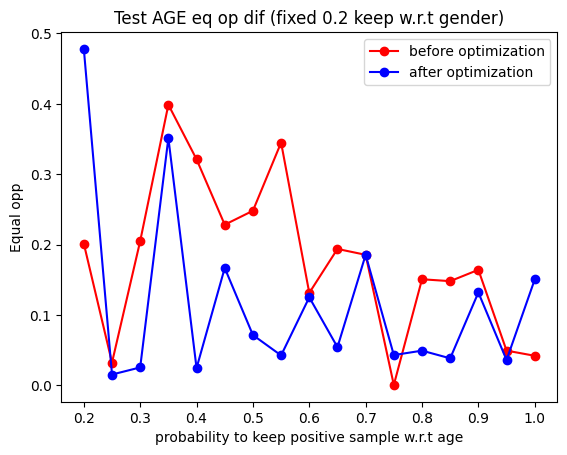

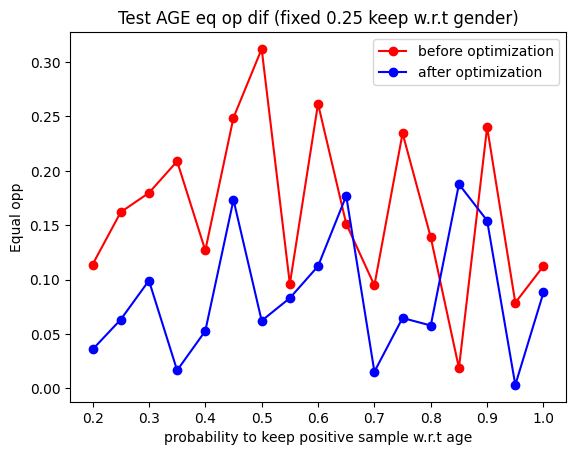

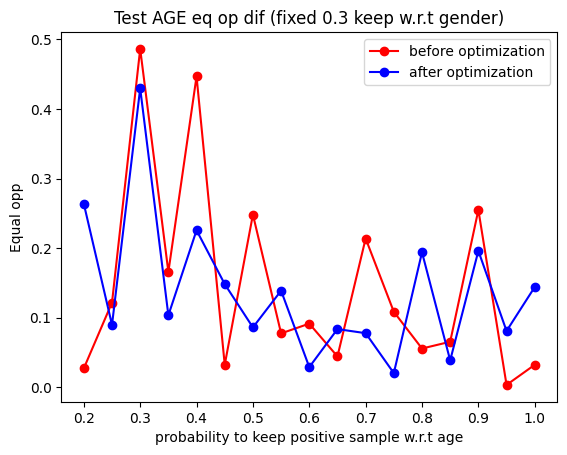

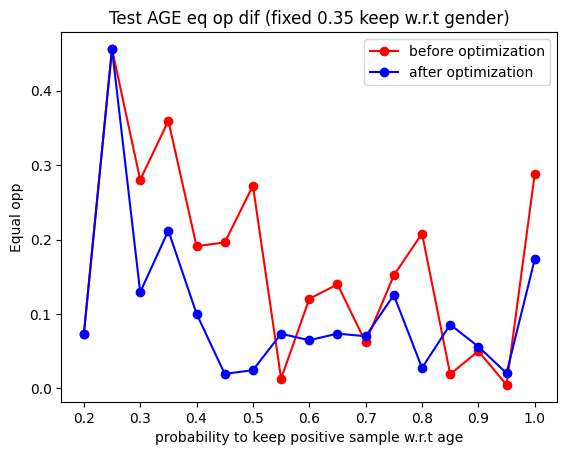

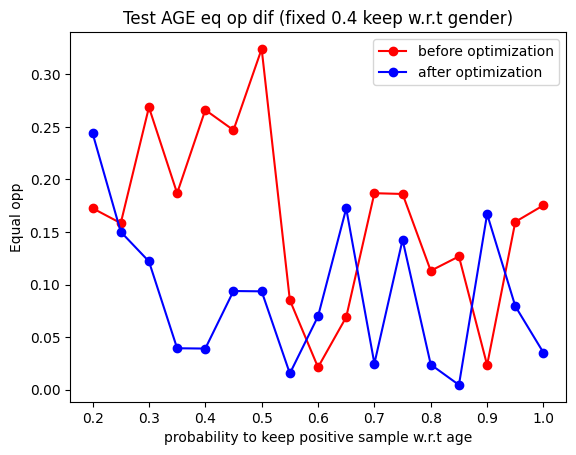

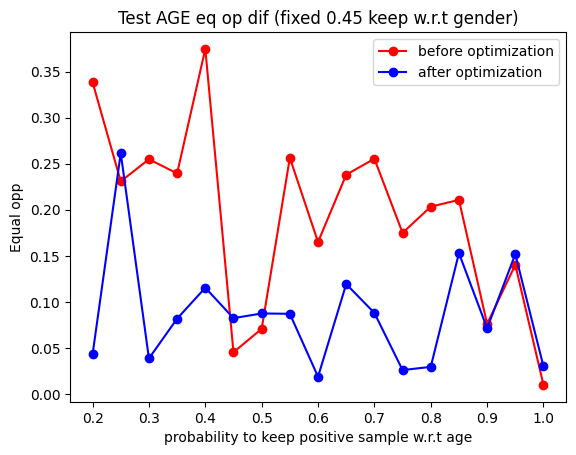

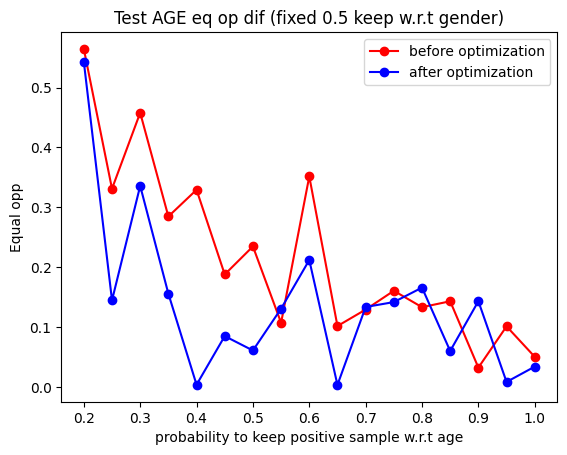

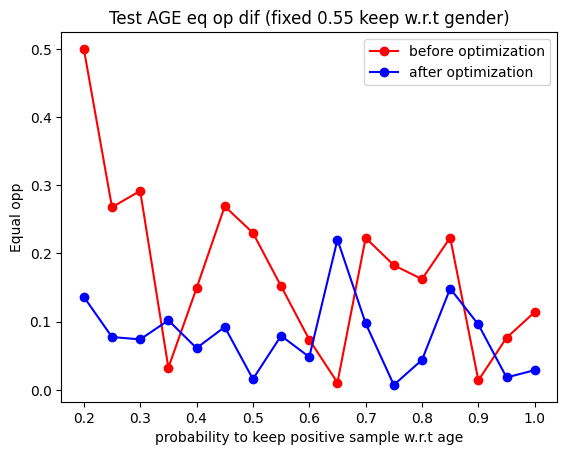

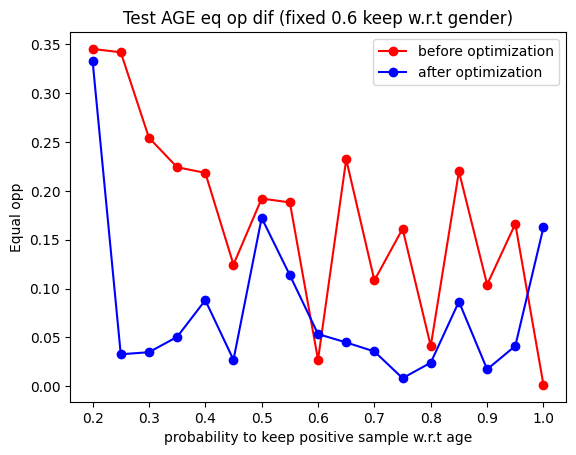

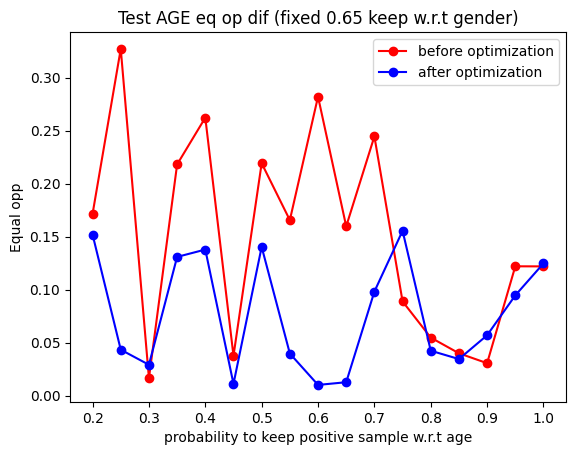

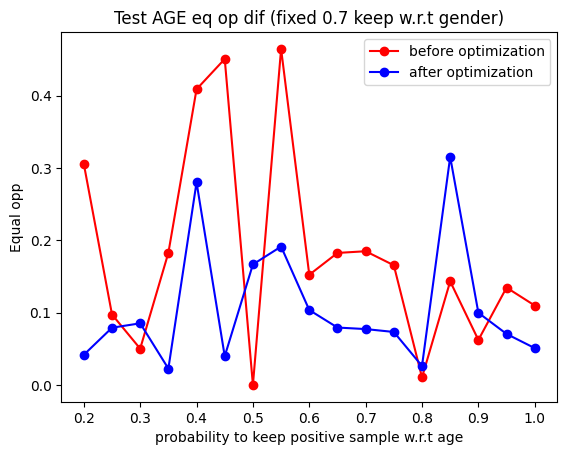

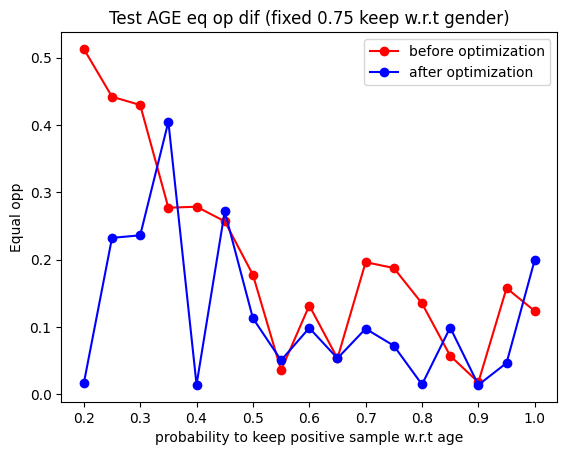

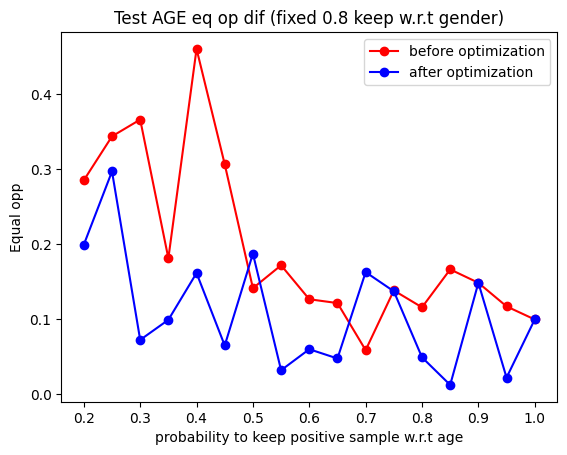

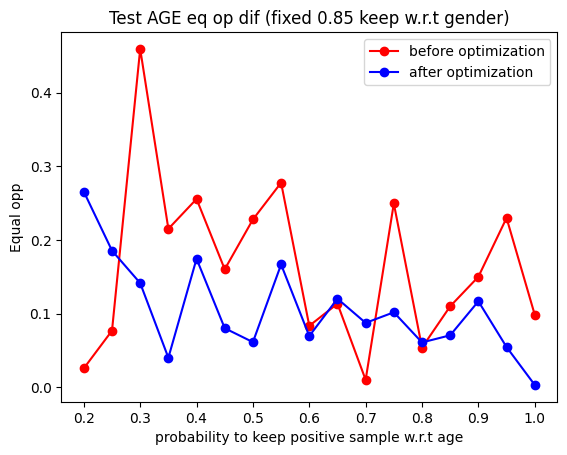

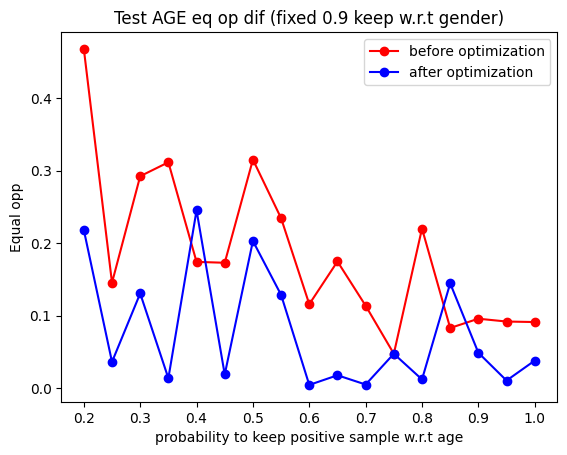

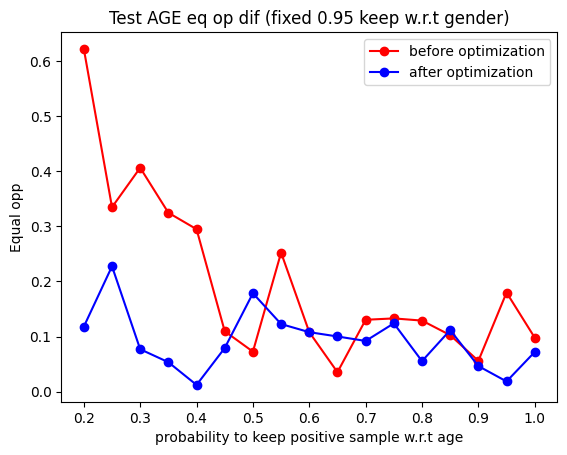

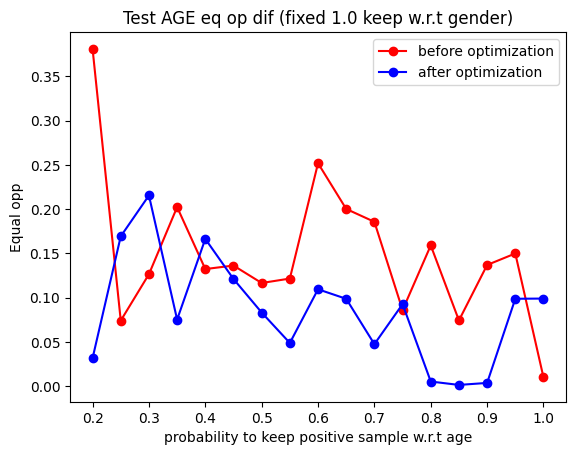

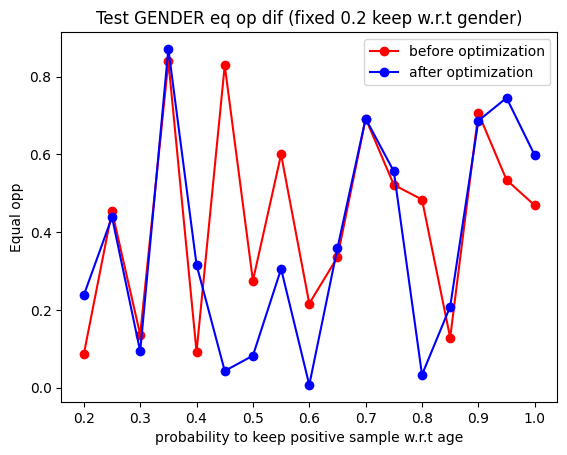

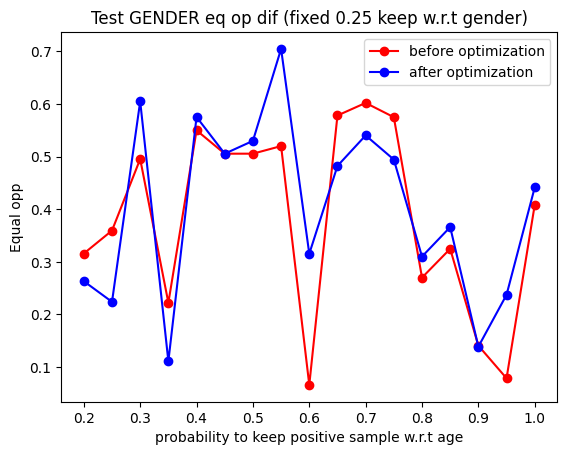

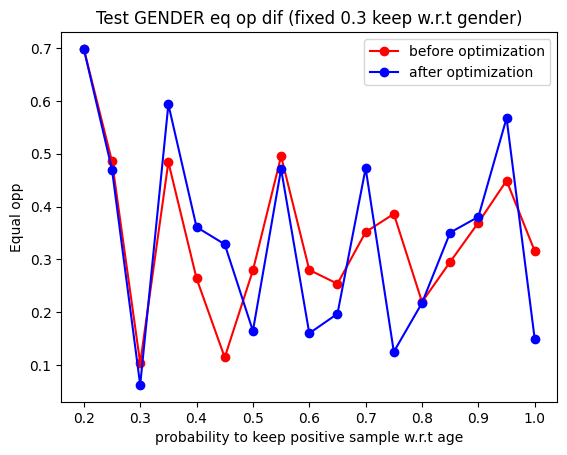

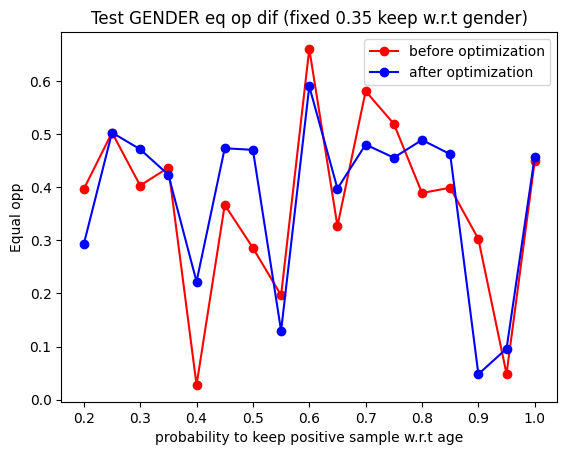

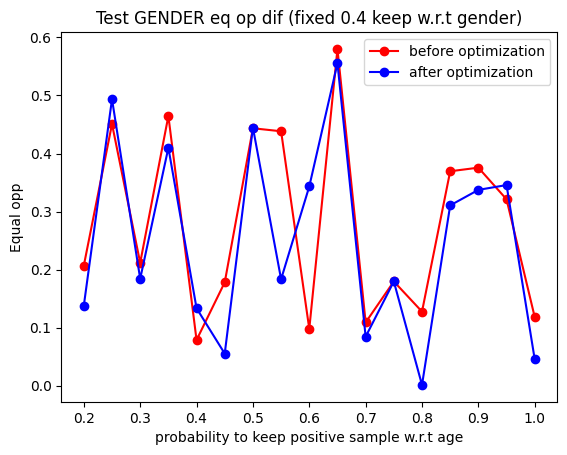

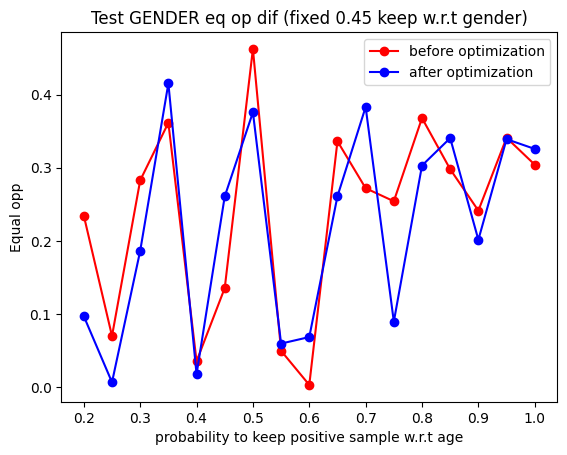

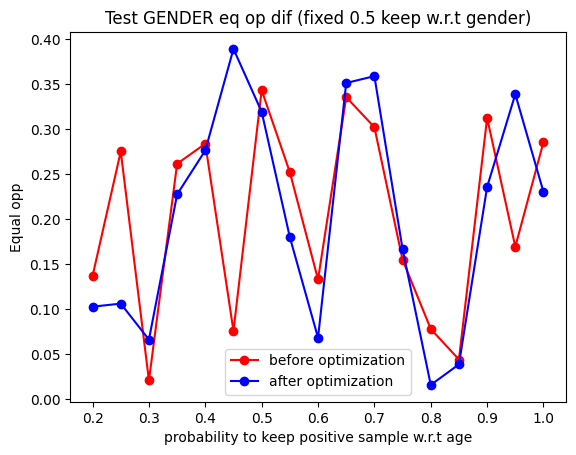

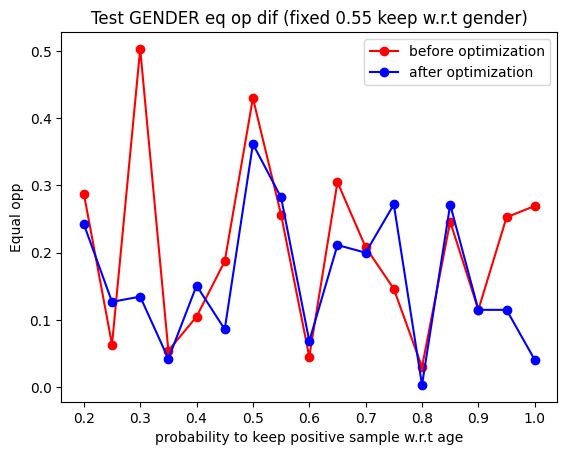

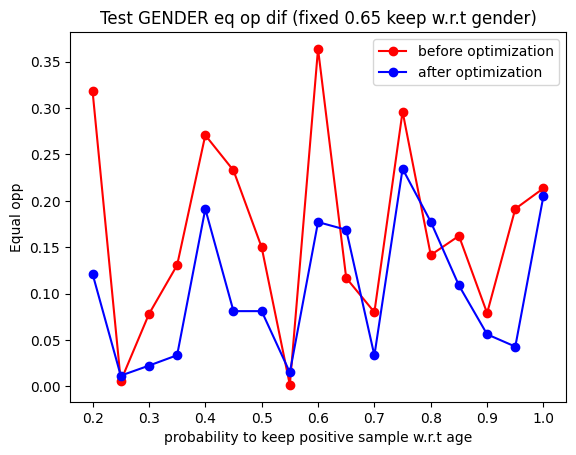

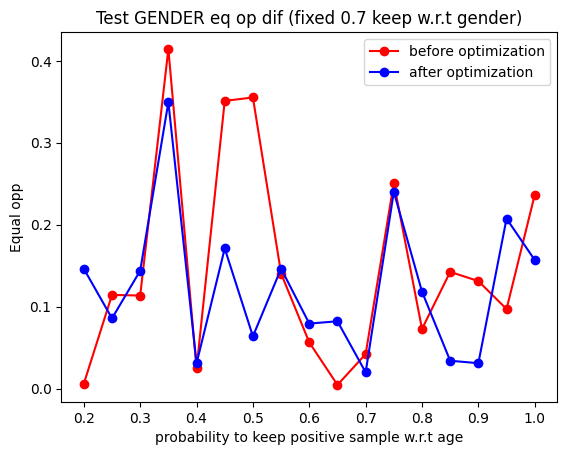

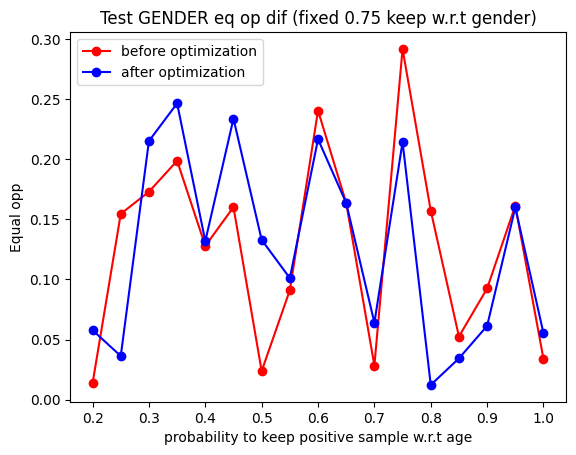

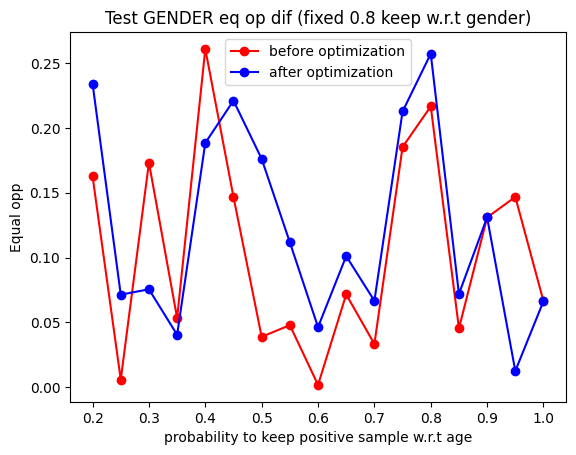

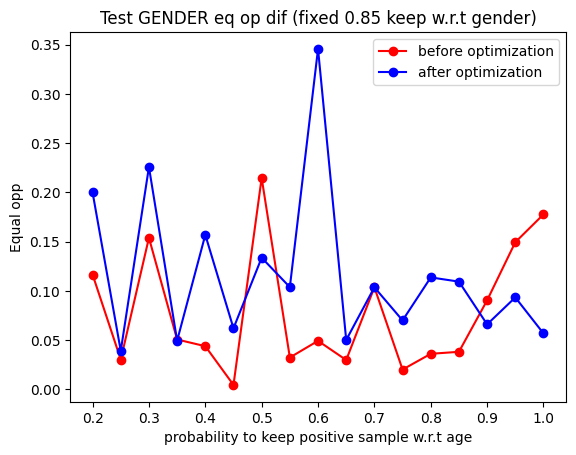

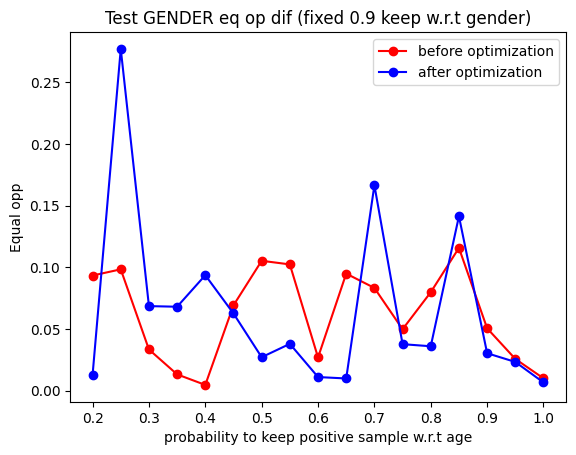

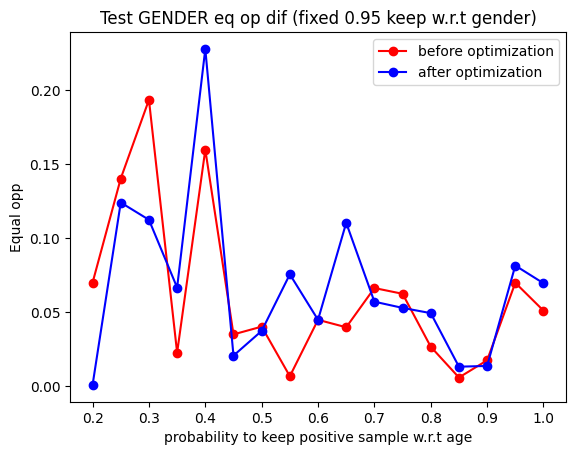

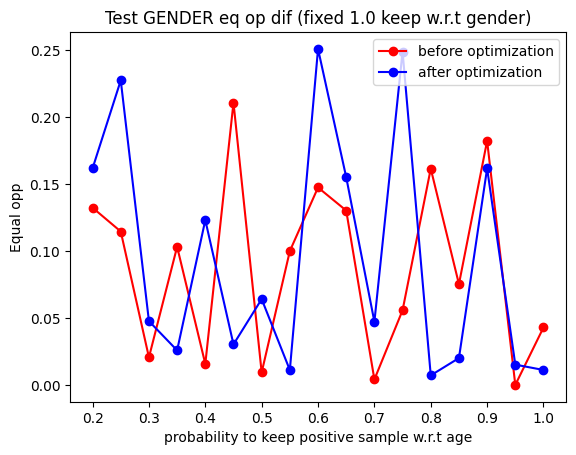

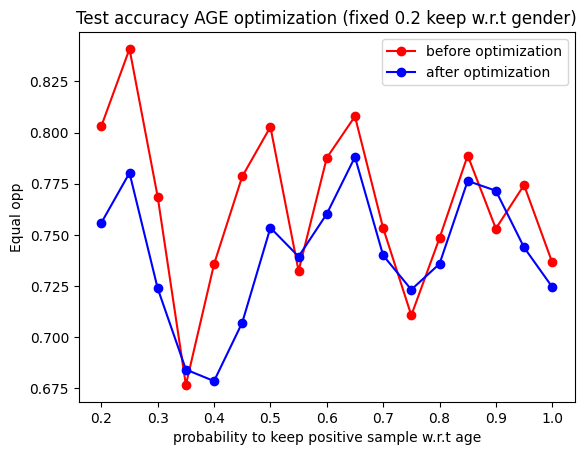

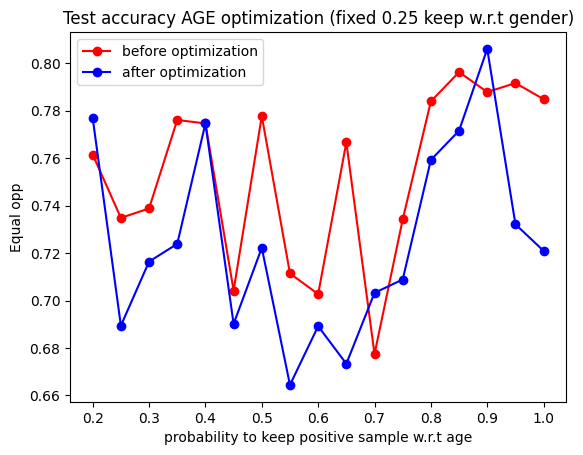

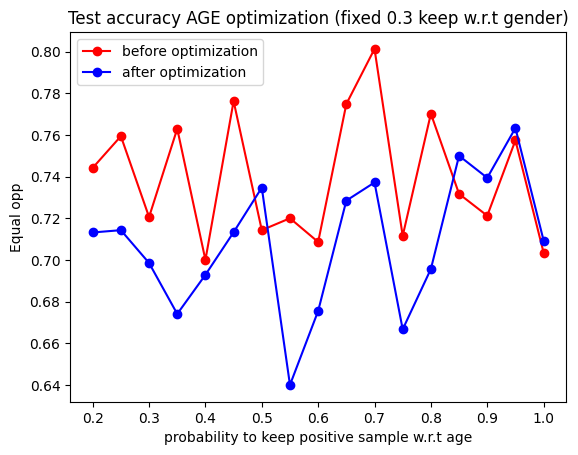

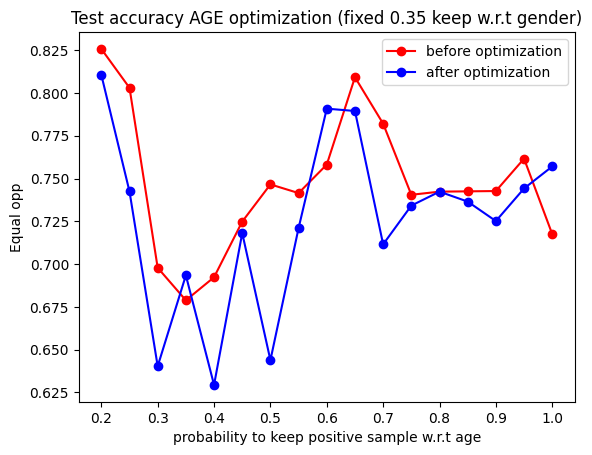

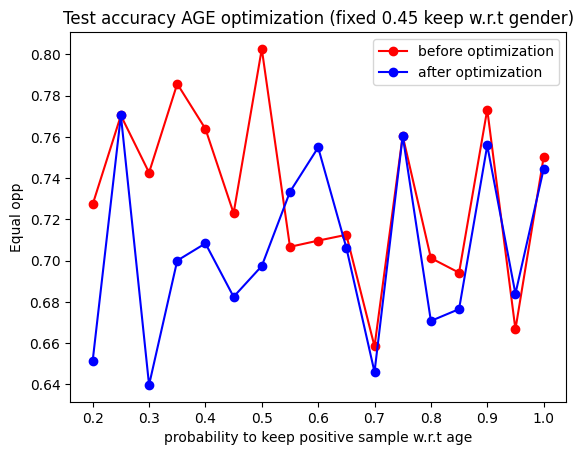

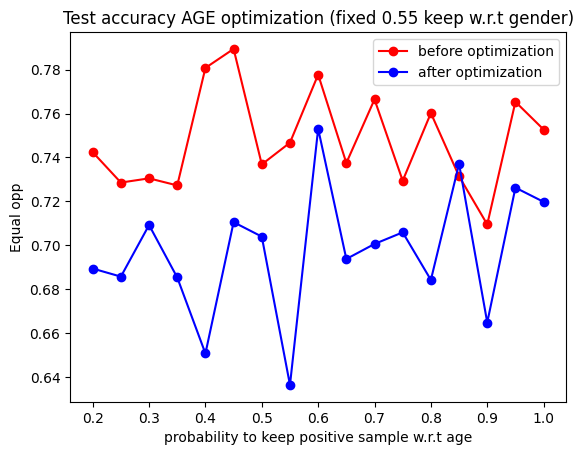

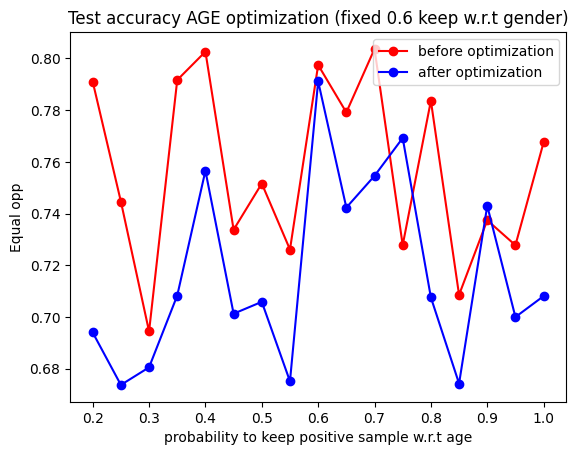

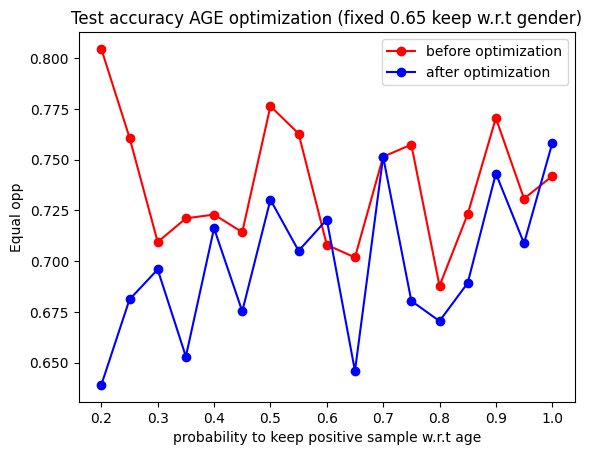

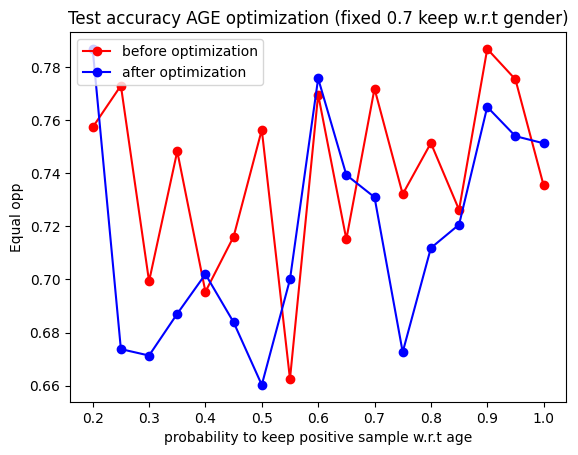

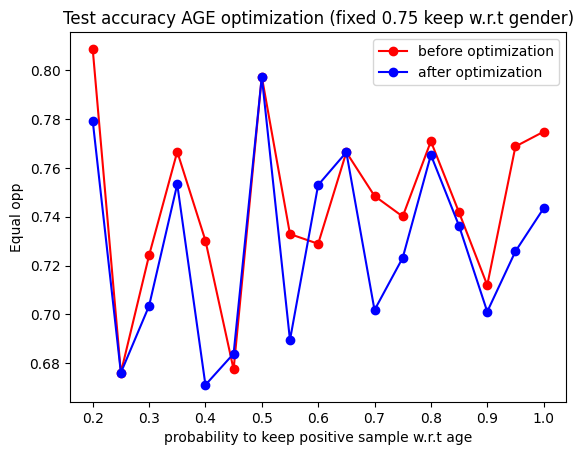

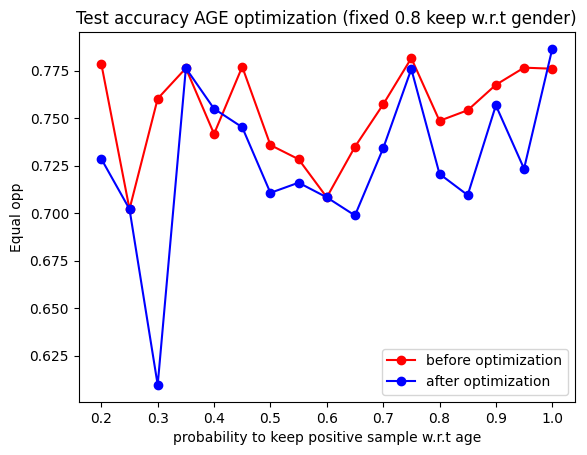

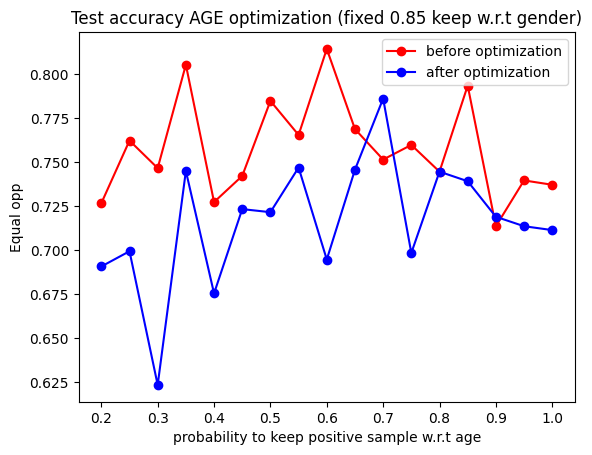

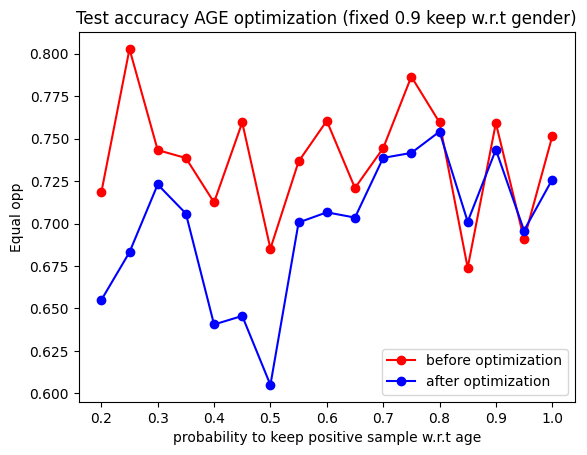

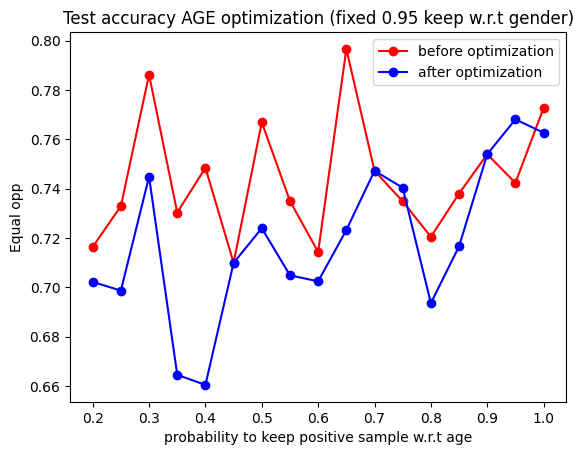

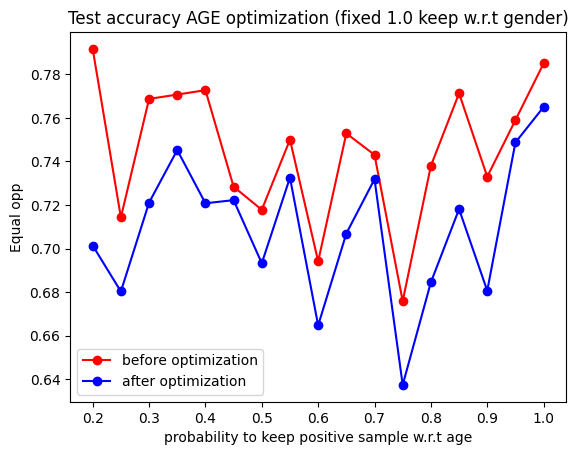

In [52]:

### OPTIMIZATION w.r.t age

###Fairness reudction AGE
for p2 in ls_p2:
    vals_before=[]
    vals_after=[]

    for p1 in ls_p1:
        vals_before.append(test_initial_fairness_age[(p1,p2)])
        vals_after.append(test_fairness_age_scores_optim_age[(p1,p2)] )
    plot_values_with_legend(x_values=ls_p1, y_values1=vals_before, y_values2= vals_after, plot_name=f"Test AGE eq op dif (fixed {p2} keep w.r.t gender)", x_axis_name="probability to keep positive sample w.r.t age", y_axis_name="Equal opp")


### Gender Fairness affected
for p2 in ls_p2:
    vals_before=[]
    vals_after=[]

    for p1 in ls_p1:
        vals_before.append(test_initial_fairness_gender[(p1,p2)])
        vals_after.append(test_fairness_gender_scores_optim_age[(p1,p2)] )
    plot_values_with_legend(x_values=ls_p1, y_values1=vals_before, y_values2= vals_after, plot_name=f"Test GENDER eq op dif (fixed {p2} keep w.r.t gender)", x_axis_name="probability to keep positive sample w.r.t age", y_axis_name="Equal opp")



###ACCURACY reduction
    
for p2 in ls_p2:
    vals_before=[]
    vals_after=[]

    for p1 in ls_p1:
        vals_before.append(test_acc_scores_initial[(p1,p2)])
        vals_after.append(test_acc_scores_optim_age[(p1,p2)] )
    plot_values_with_legend(x_values=ls_p1, y_values1=vals_before, y_values2=vals_after, plot_name=f"Test accuracy AGE optimization (fixed {p2} keep w.r.t gender)", x_axis_name="probability to keep positive sample w.r.t age", y_axis_name="Equal opp")


    



# Plots for train

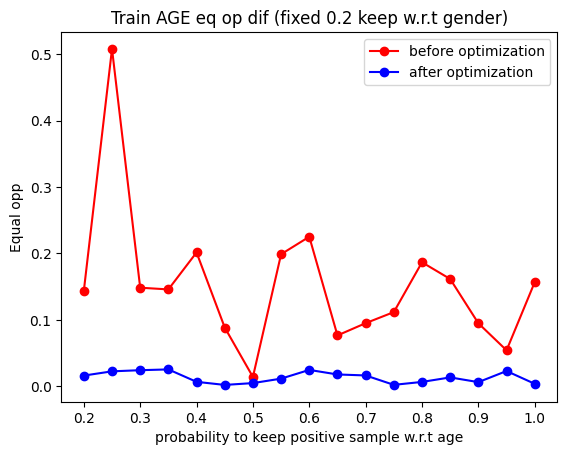

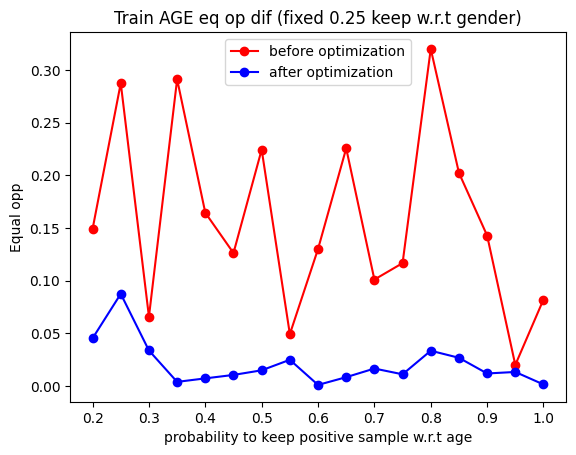

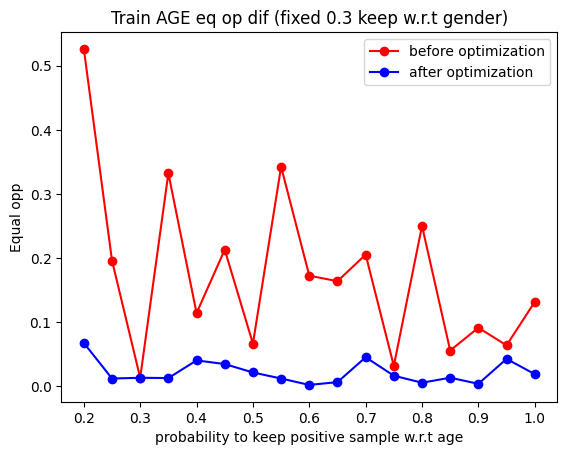

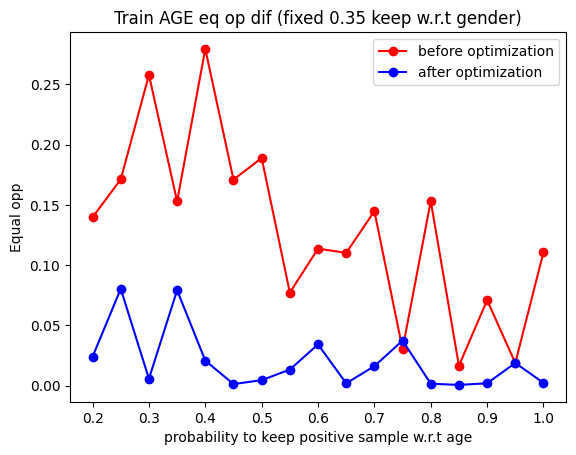

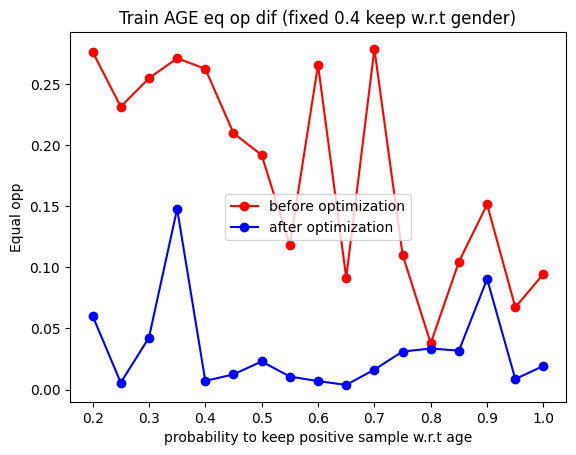

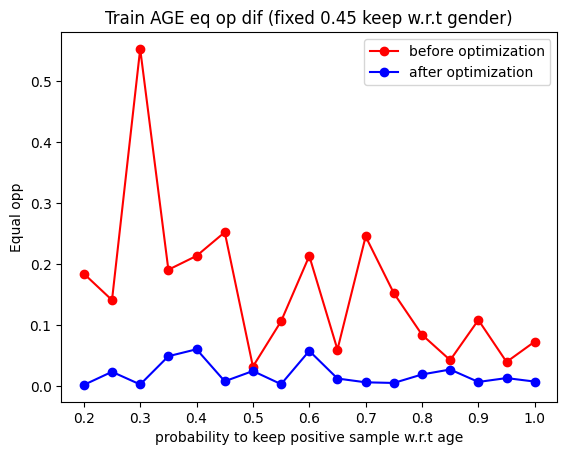

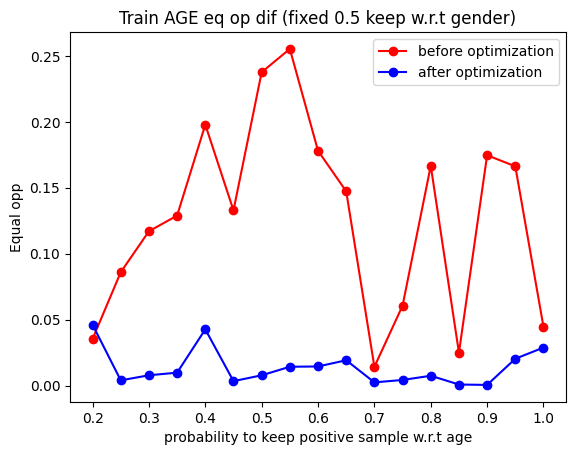

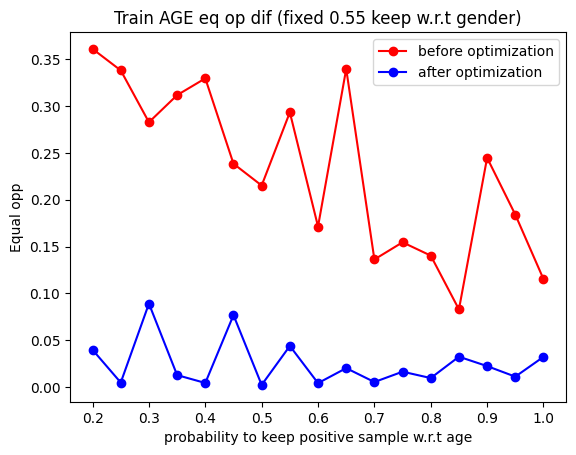

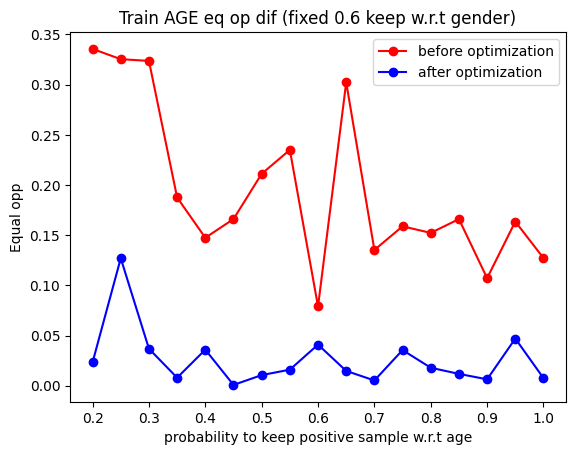

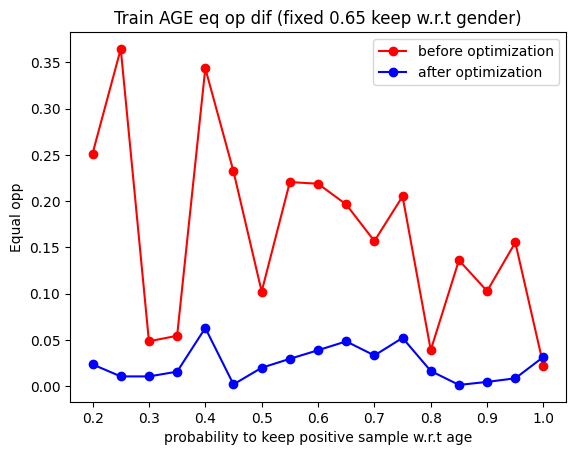

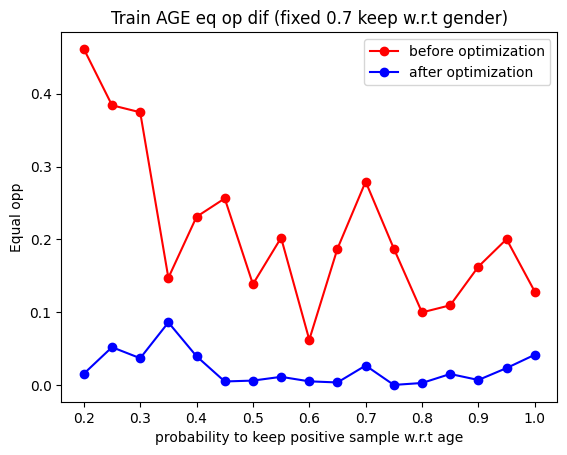

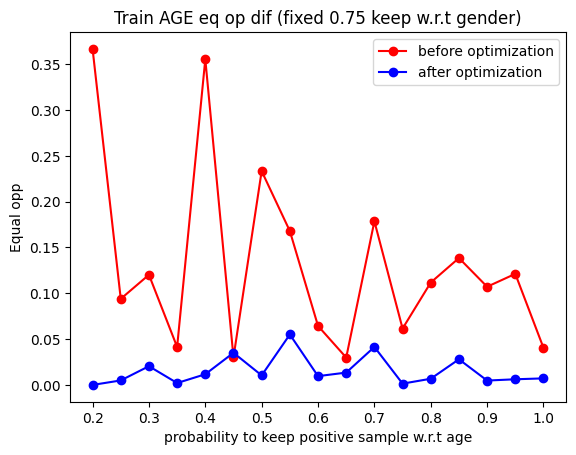

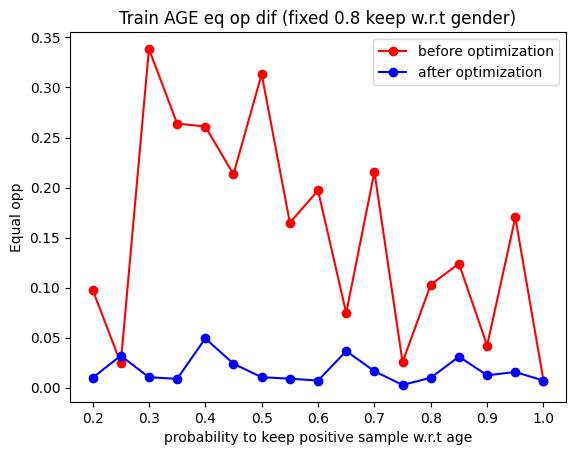

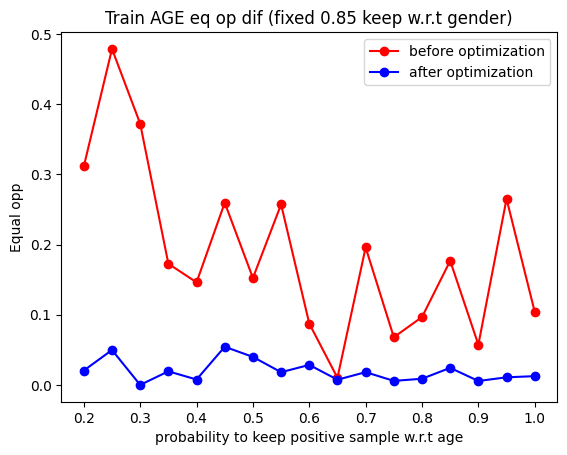

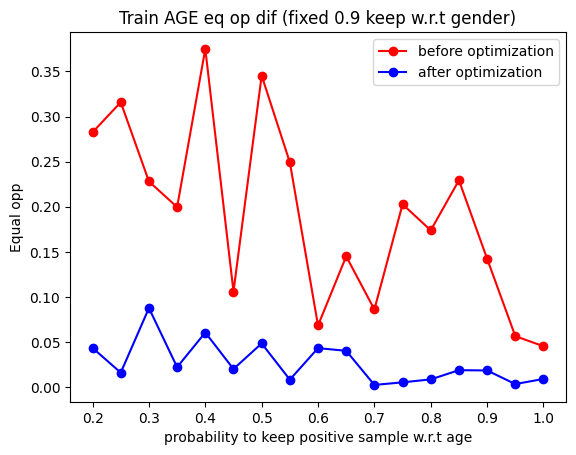

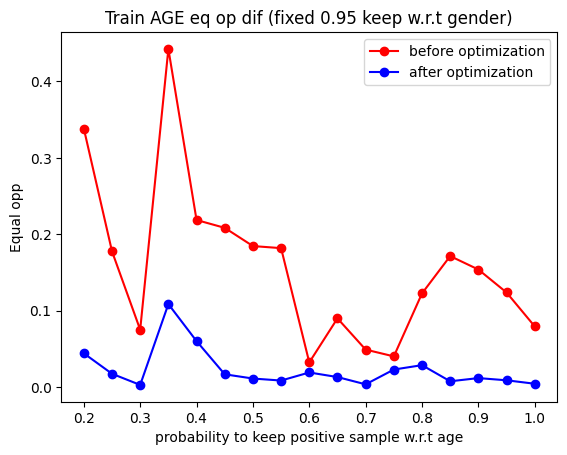

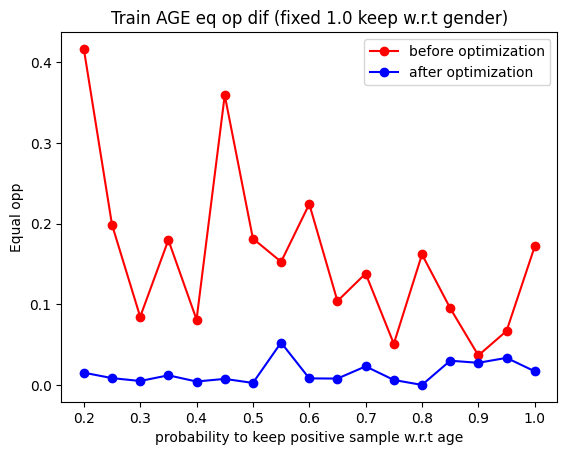

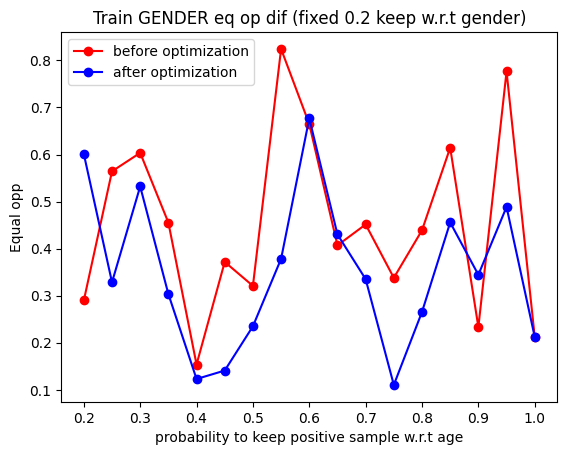

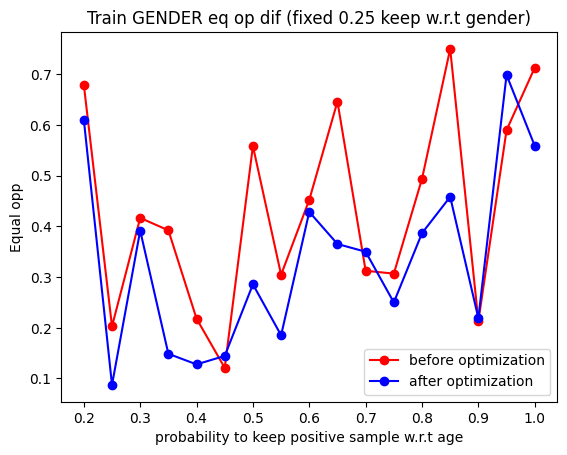

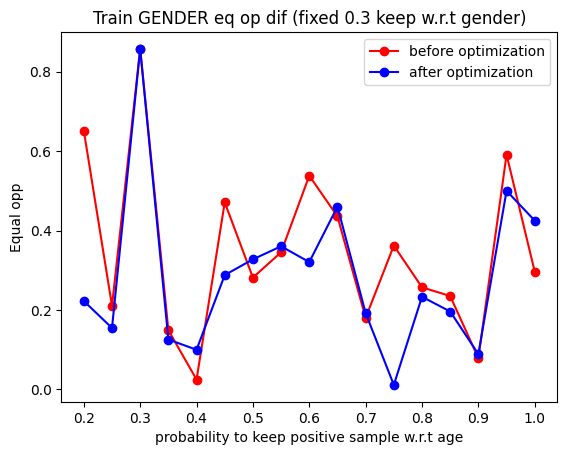

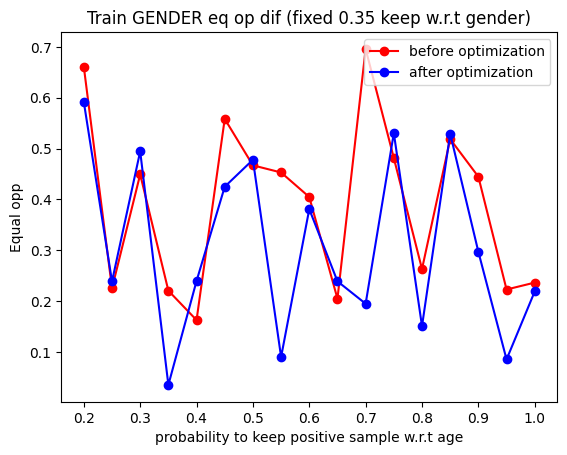

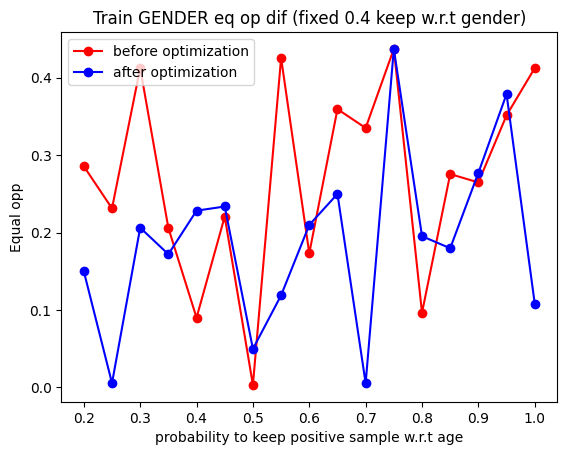

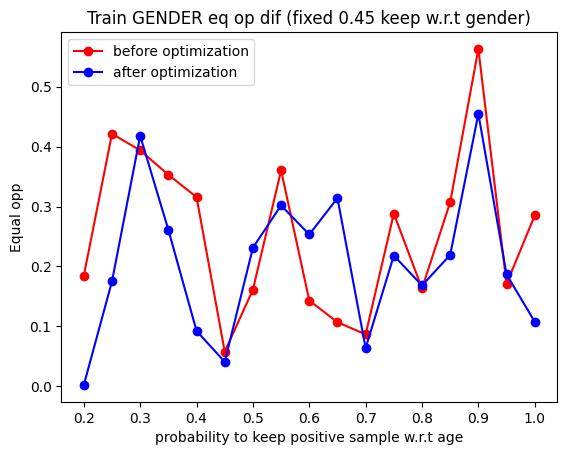

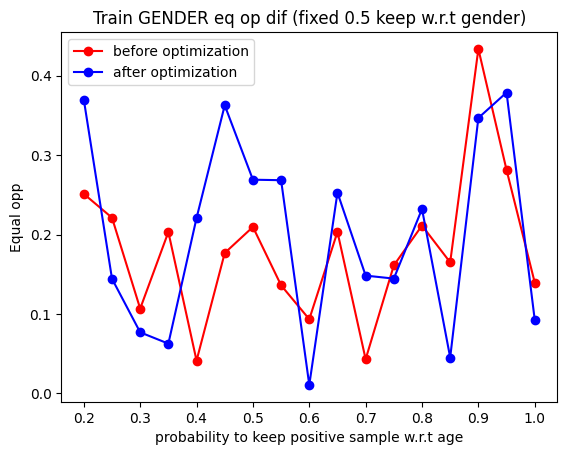

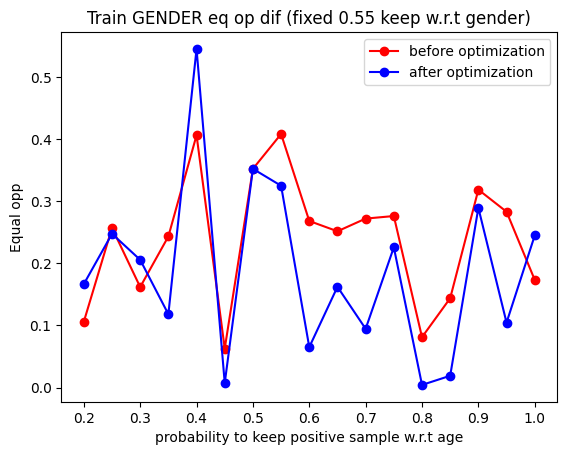

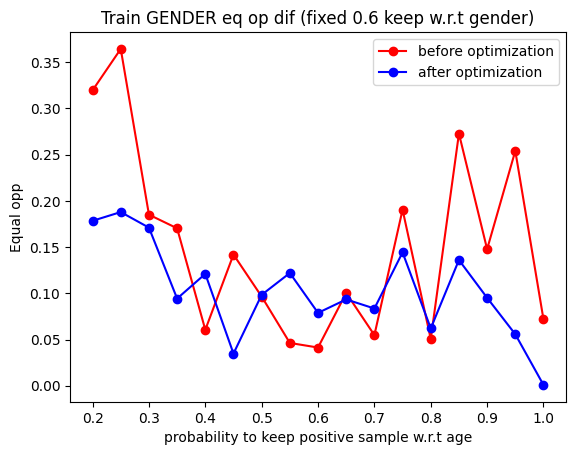

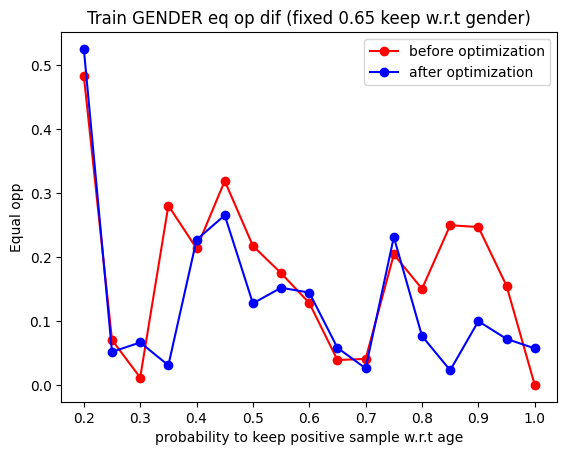

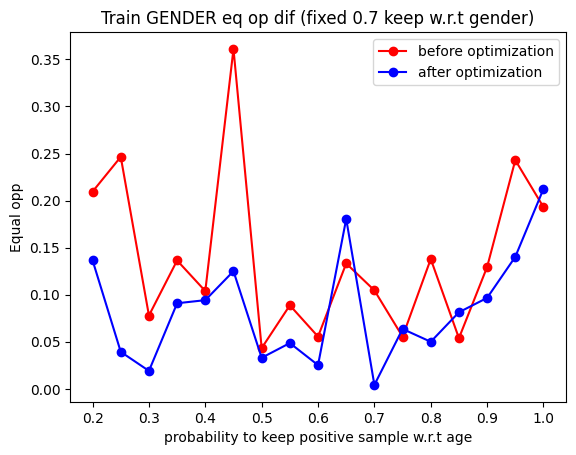

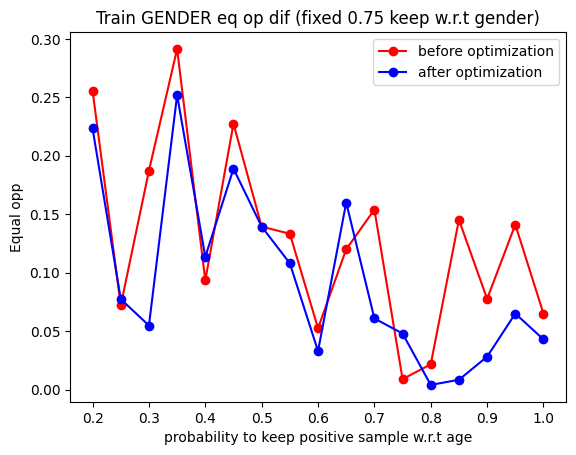

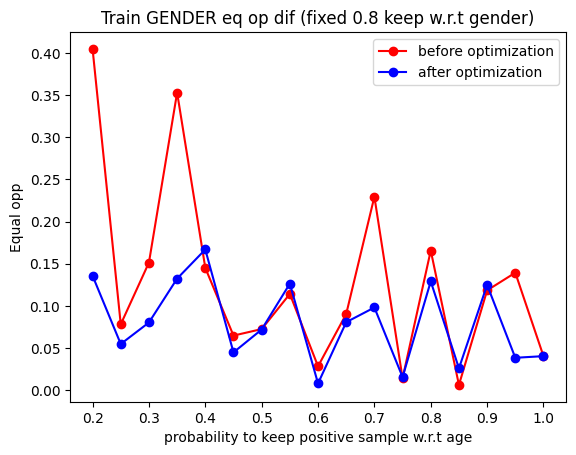

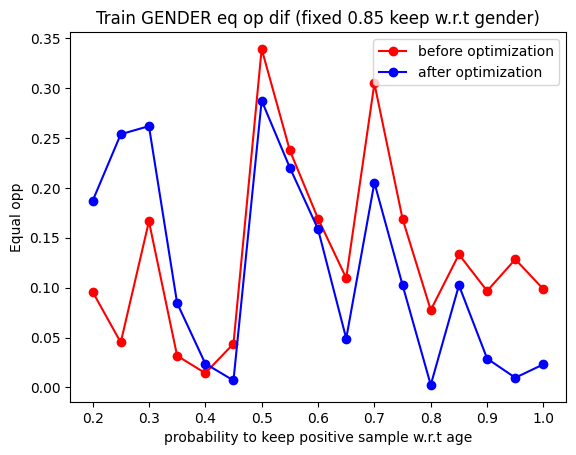

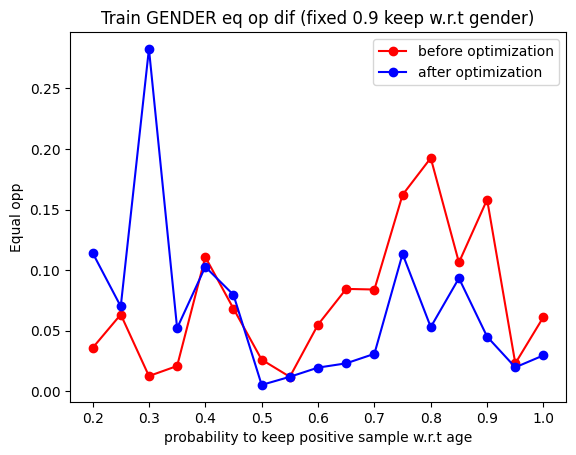

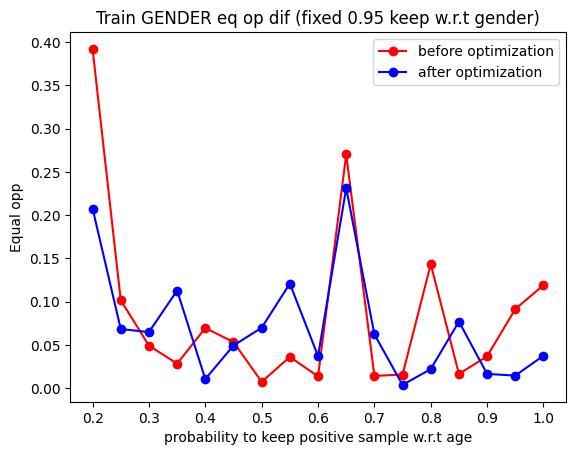

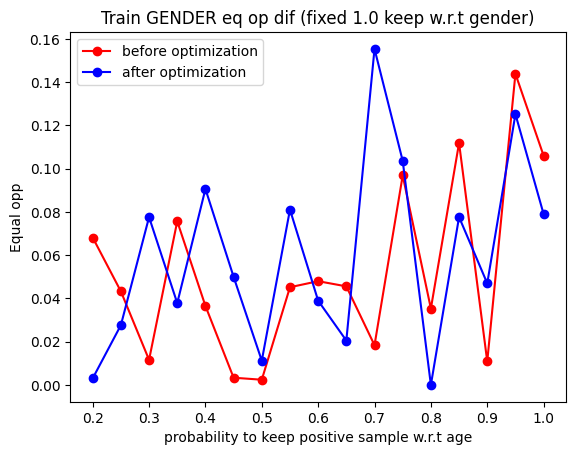

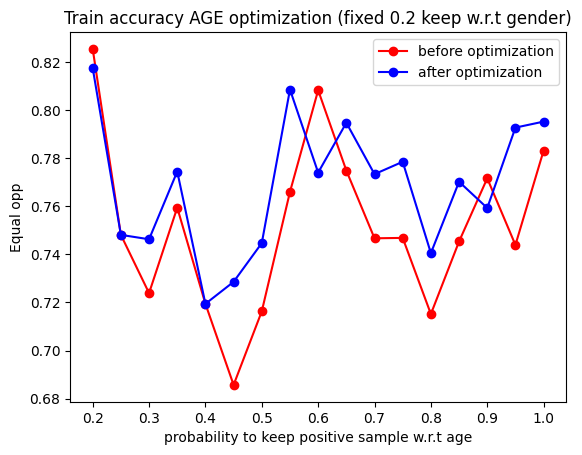

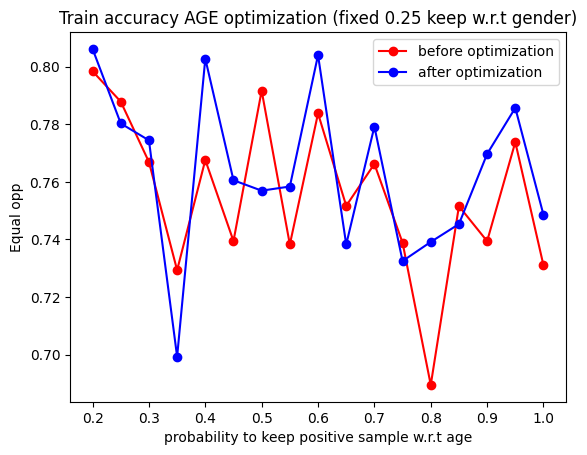

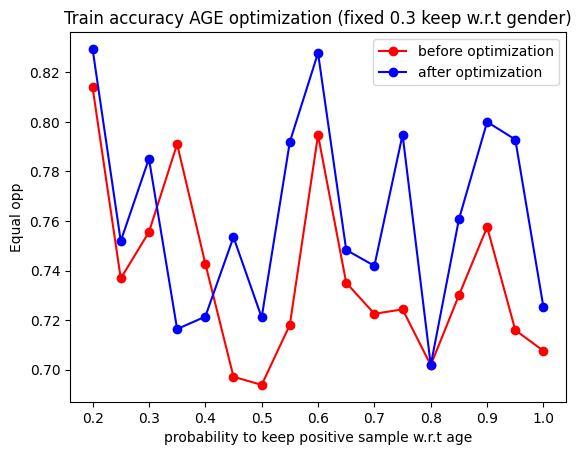

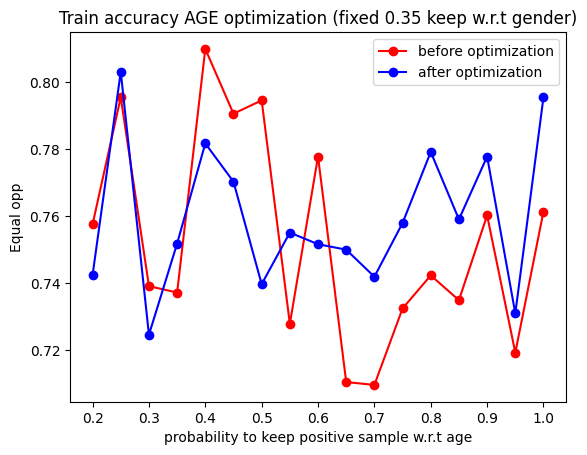

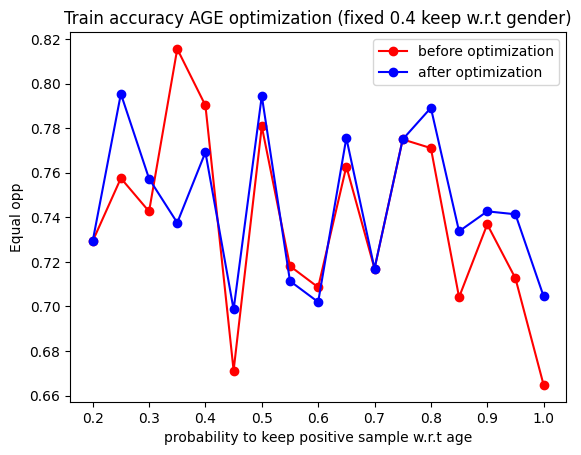

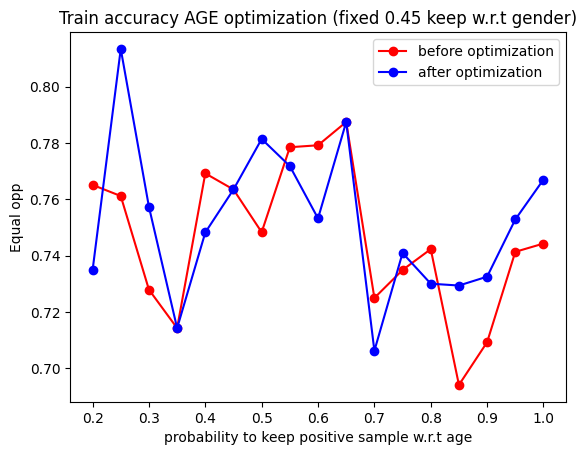

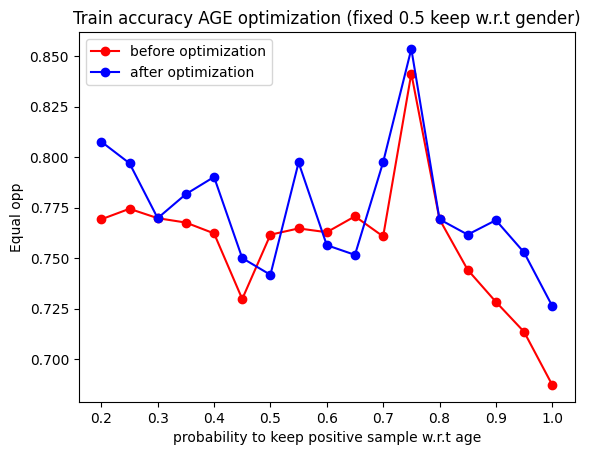

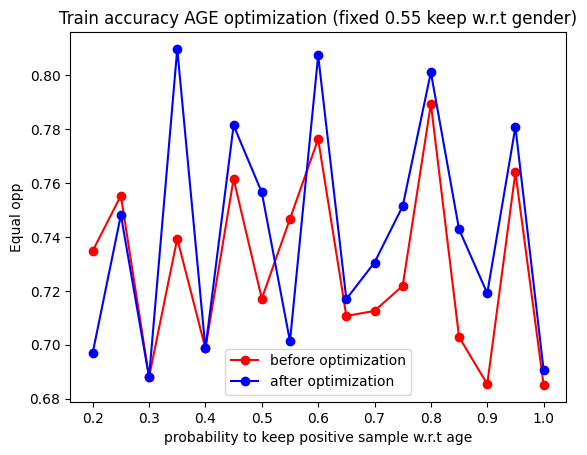

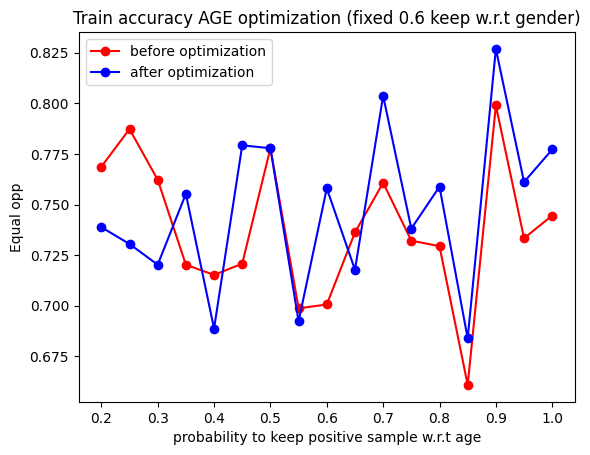

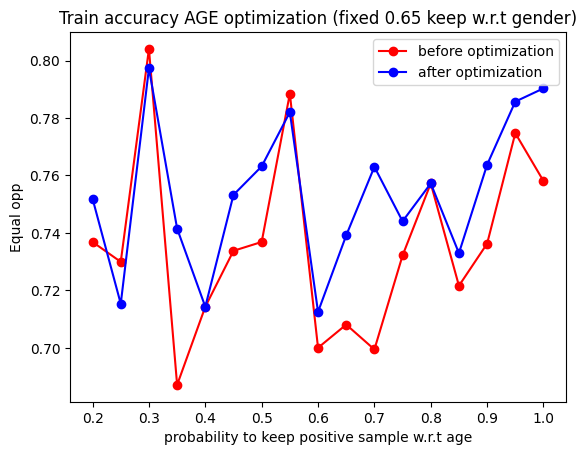

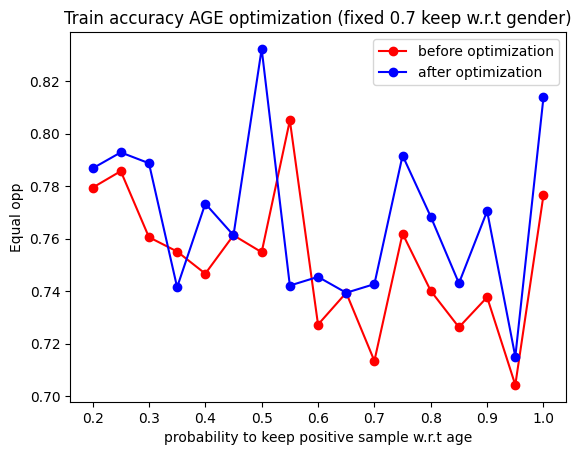

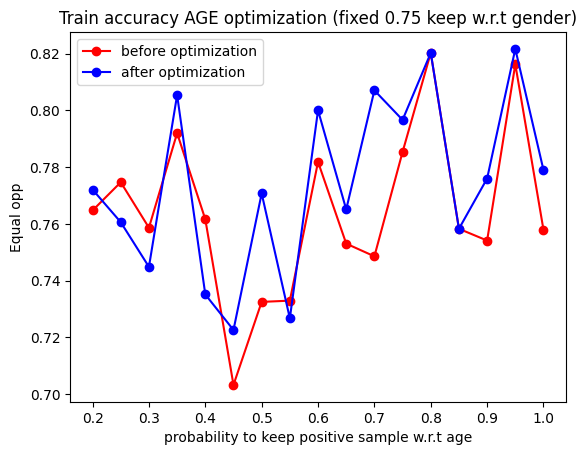

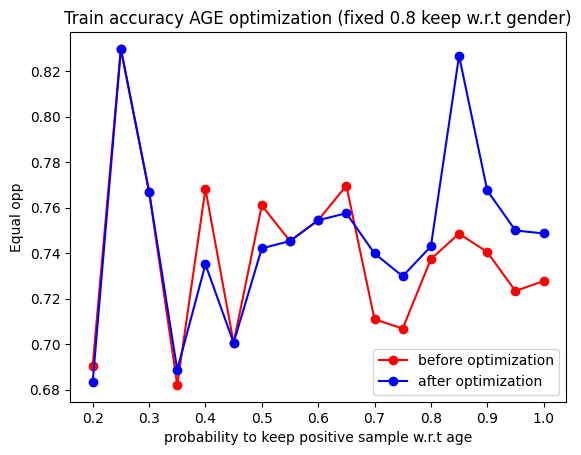

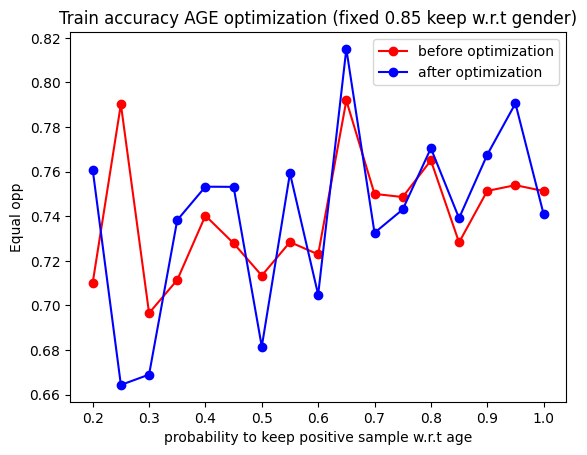

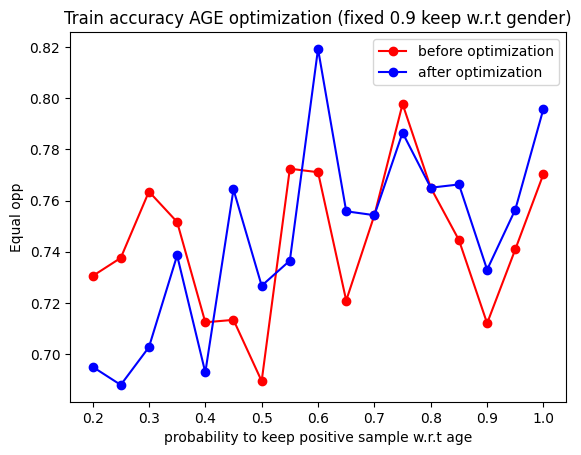

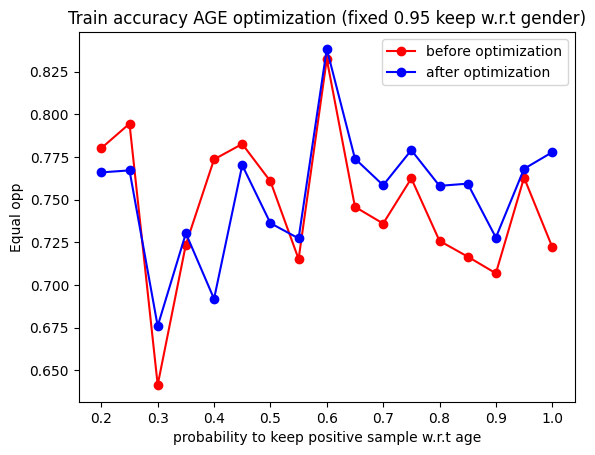

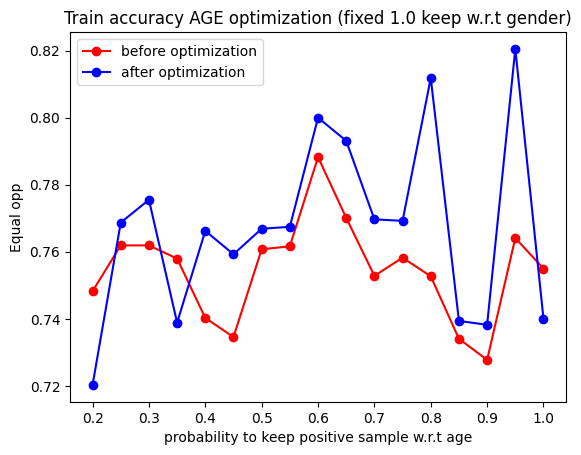

In [53]:

### OPTIMIZATION w.r.t age

###Fairness reudction AGE
for p2 in ls_p2:
    vals_before=[]
    vals_after=[]

    for p1 in ls_p1:
        vals_before.append(train_initial_fairness_age[(p1,p2)])
        vals_after.append(train_fairness_age_scores_optim_age[(p1,p2)] )
    plot_values_with_legend(x_values=ls_p1, y_values1=vals_before, y_values2= vals_after, plot_name=f"Train AGE eq op dif (fixed {p2} keep w.r.t gender)", x_axis_name="probability to keep positive sample w.r.t age", y_axis_name="Equal opp")


### Gender Fairness affected
for p2 in ls_p2:
    vals_before=[]
    vals_after=[]

    for p1 in ls_p1:
        vals_before.append(train_initial_fairness_gender[(p1,p2)])
        vals_after.append(train_fairness_gender_scores_optim_age[(p1,p2)] )
    plot_values_with_legend(x_values=ls_p1, y_values1=vals_before, y_values2= vals_after, plot_name=f"Train GENDER eq op dif (fixed {p2} keep w.r.t gender)", x_axis_name="probability to keep positive sample w.r.t age", y_axis_name="Equal opp")



###ACCURACY reduction
    
for p2 in ls_p2:
    vals_before=[]
    vals_after=[]

    for p1 in ls_p1:
        vals_before.append(train_acc_scores_initial[(p1,p2)])
        vals_after.append(train_acc_scores_optim_age[(p1,p2)] )
    plot_values_with_legend(x_values=ls_p1, y_values1=vals_before, y_values2=vals_after, plot_name=f"Train accuracy AGE optimization (fixed {p2} keep w.r.t gender)", x_axis_name="probability to keep positive sample w.r.t age", y_axis_name="Equal opp")


    



# Trends before and after fairness optimization

# How the bias injection percentage  affects the model

Model rough work

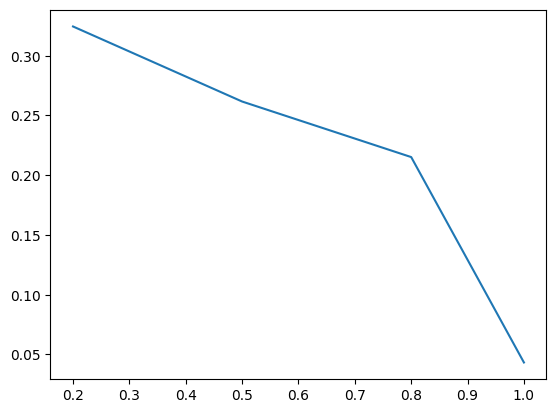

SignificanceResult(statistic=-1.0, pvalue=0.0)


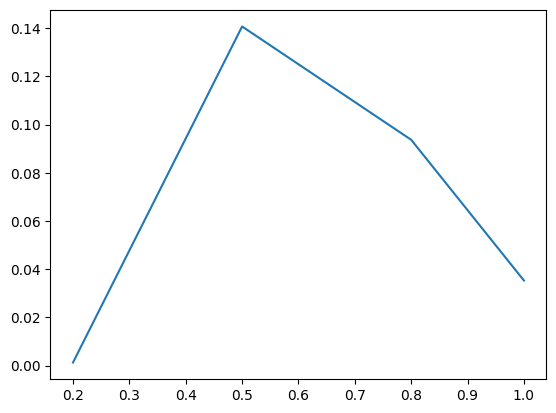

SignificanceResult(statistic=0.19999999999999998, pvalue=0.8)


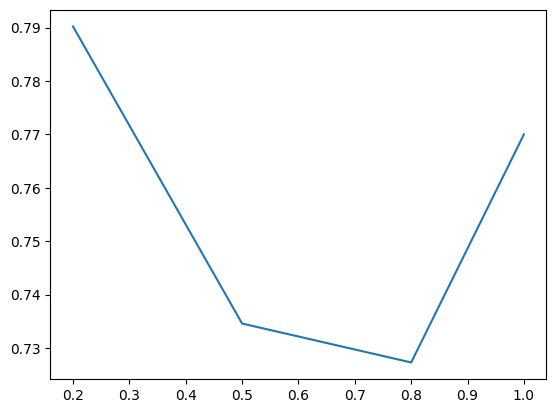

SignificanceResult(statistic=-0.39999999999999997, pvalue=0.6)


In [7]:
from scipy.stats import spearmanr
###Fairness reudction w.r.t. AGE (i.e. drop positive age samples)


p2=1 #Fix no drop in positive samples w.r.t gender
vals_before=[]
for p1 in ls_p1:
    vals_before.append(train_initial_fairness_age[(p1,p2)]) ## Fairness age 

plt.plot(ls_p1, vals_before)
plt.show()
print(spearmanr(ls_p1, vals_before))


p2=1 #Fix no drop in positive samples w.r.t age  (keep it fixed)
vals_before=[]
for p1 in ls_p1:
    vals_before.append(train_initial_fairness_gender[(p1,p2)]) ## Fairness age 

plt.plot(ls_p1, vals_before)
plt.show()
print(spearmanr(ls_p1, vals_before))


p2=1 #Fix no drop in positive samples w.r.t age  (keep it fixed)
vals_before=[]
for p1 in ls_p1:
    vals_before.append(train_acc_scores_initial[(p1,p2)]) ## Fairness age 

plt.plot(ls_p1, vals_before)
plt.show()
print(spearmanr(ls_p1, vals_before))



Trends before and after optimization on train set

----------- TRAIN DATA ----------


----- Trend for initial data when injecting bias in age (i.e vary age) ----- 



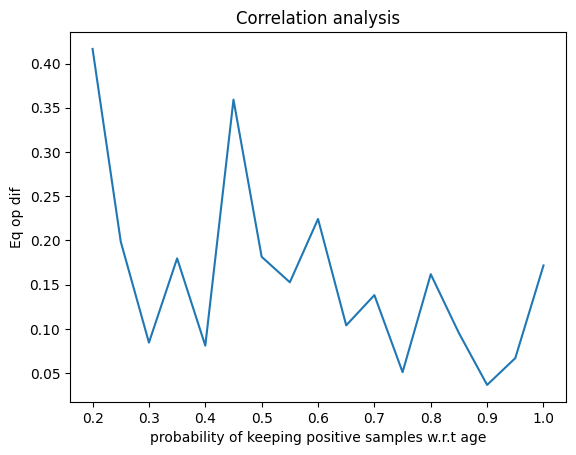

 Age correlation: SignificanceResult(statistic=-0.5122549019607844, pvalue=0.03552652411689097)


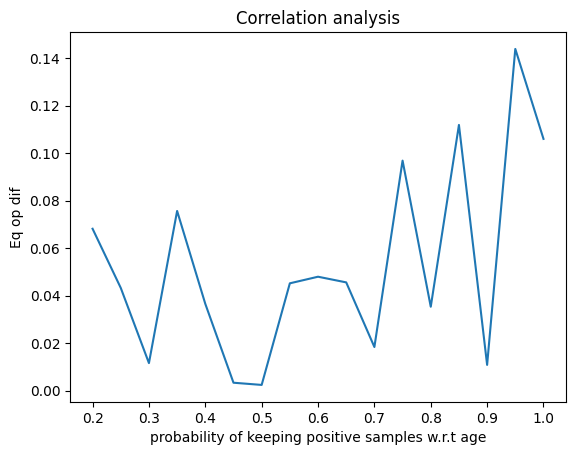

 Gender correlation: SignificanceResult(statistic=0.3357843137254902, pvalue=0.18761411787479576)


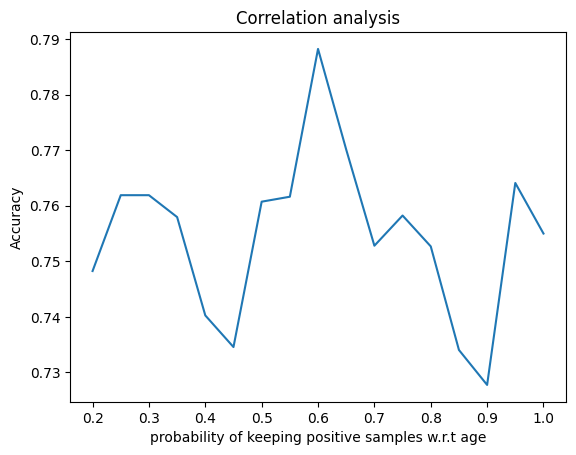

Accuracy correlation: SignificanceResult(statistic=-0.12385042180725782, pvalue=0.6357973999669317)


----- Trend for initial data when injecting bias in gender (i.e. vary gender) ----- 



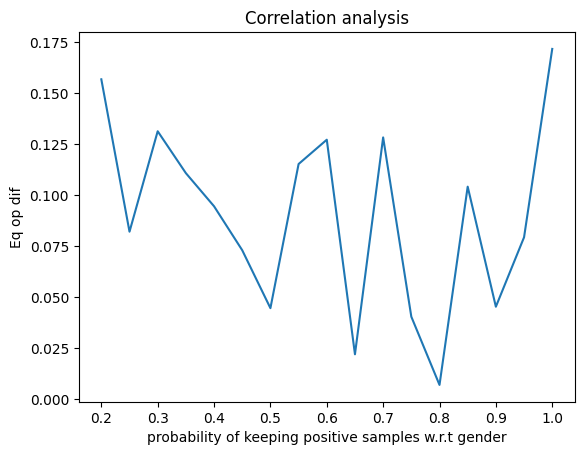

Age correlation: SignificanceResult(statistic=-0.232843137254902, pvalue=0.36845965485437604)


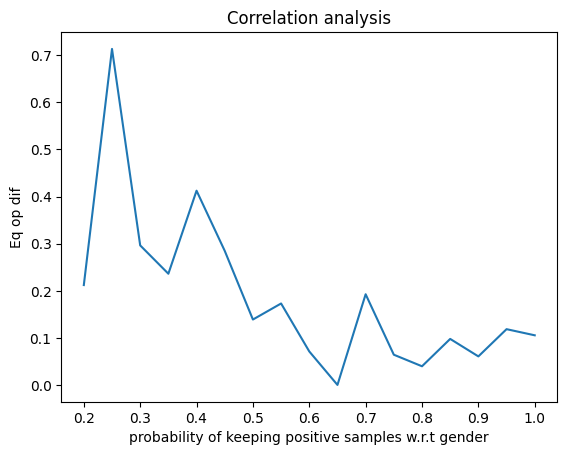

 Gender correlation: SignificanceResult(statistic=-0.7377450980392158, pvalue=0.0007238246704990681)


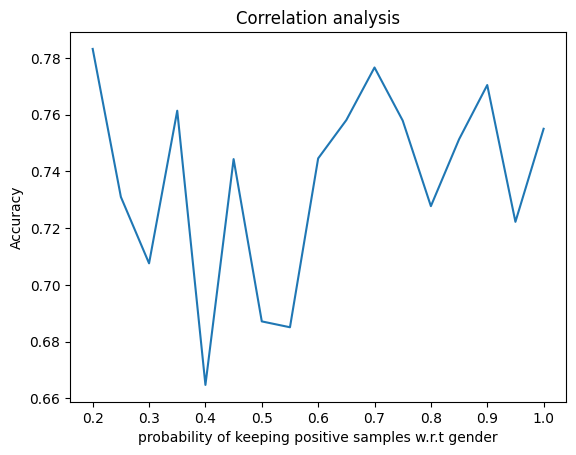

Accuracy correlation: SignificanceResult(statistic=0.12990196078431374, pvalue=0.6192473366524133)


----- Trend after optimization w.r.t age when injecting bias in age (i.e vary age) ----- 



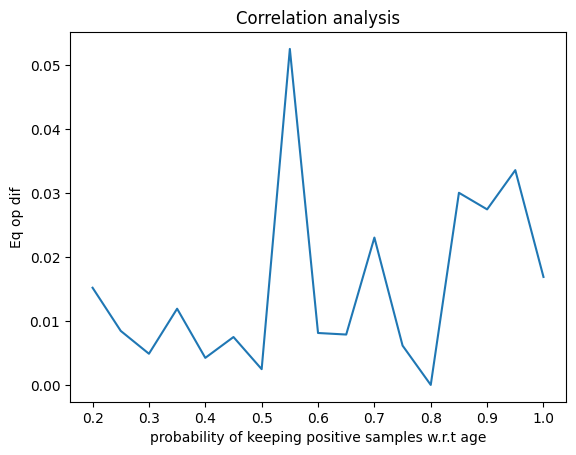

 Age correlation: SignificanceResult(statistic=0.3504901960784314, pvalue=0.16781533363739973)


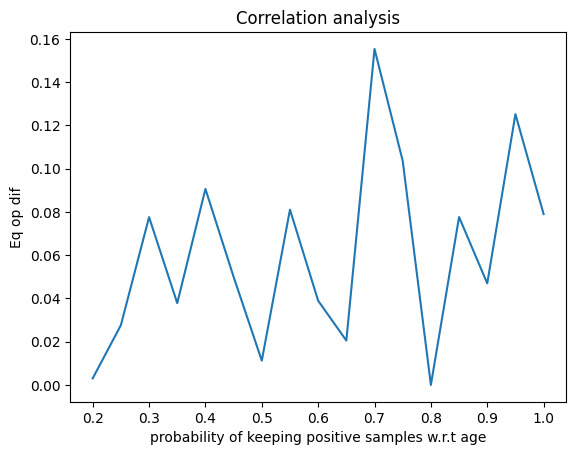

 Gender correlation: SignificanceResult(statistic=0.37990196078431376, pvalue=0.13254890262758873)


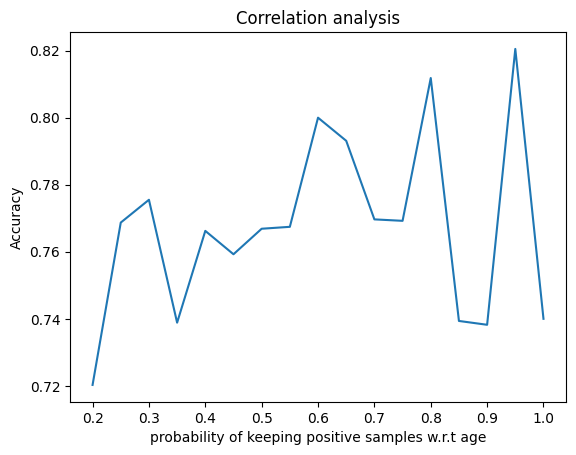

Accuracy correlation: SignificanceResult(statistic=0.2058823529411765, pvalue=0.4279148531427077)


----- Trend after optimization w.r.t age when injecting bias in gender (i.e. vary gender) ----- 



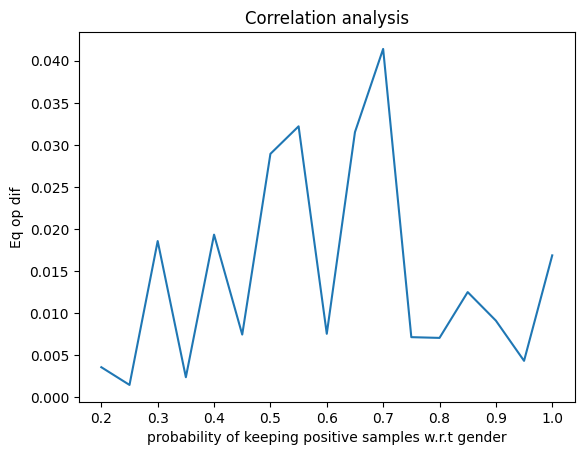

Age correlation: SignificanceResult(statistic=0.18872549019607845, pvalue=0.4681922842798525)


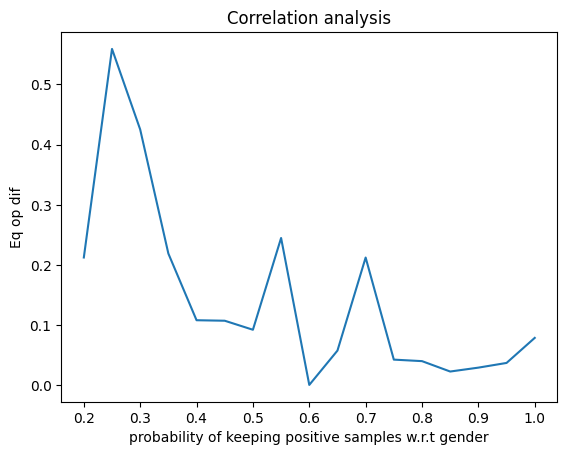

 Gender correlation: SignificanceResult(statistic=-0.752450980392157, pvalue=0.0004921108243565306)


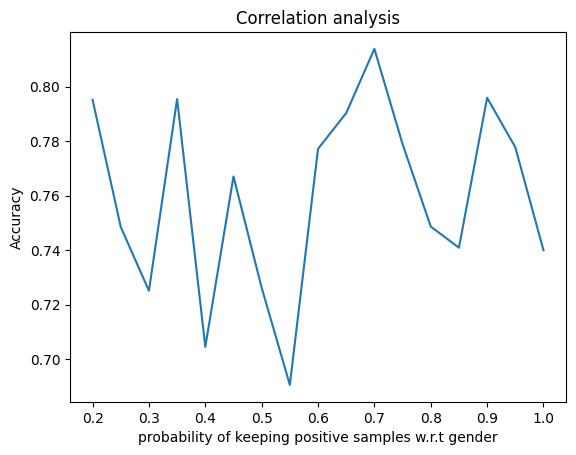

Accuracy correlation: SignificanceResult(statistic=0.14705882352941177, pvalue=0.5732772908660002)


----- Trend after optimization w.r.t gender when injecting bias in age (i.e vary age) ----- 



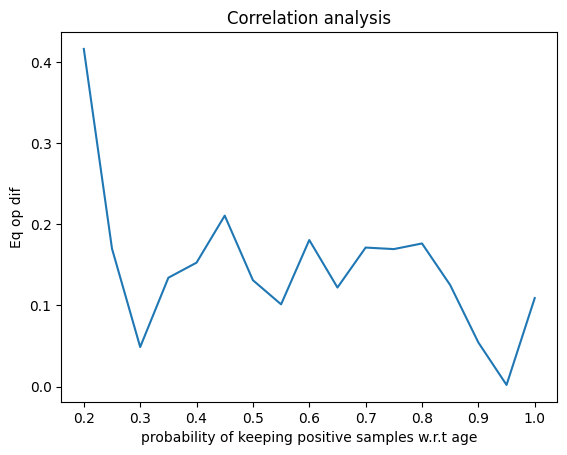

 Age correlation: SignificanceResult(statistic=-0.40196078431372556, pvalue=0.10973047964744011)


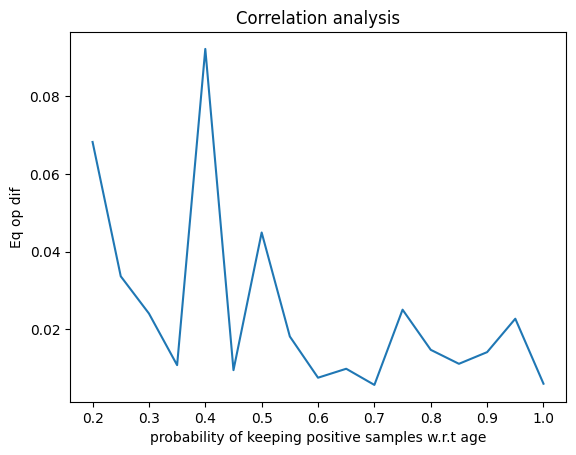

 Gender correlation: SignificanceResult(statistic=-0.465686274509804, pvalue=0.05957824210811783)


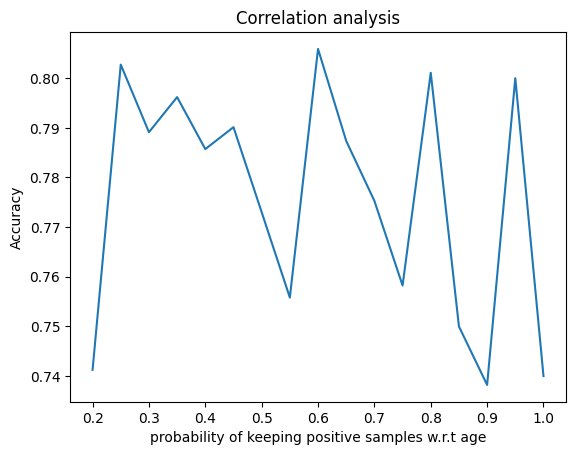

Accuracy correlation: SignificanceResult(statistic=-0.27941176470588236, pvalue=0.2774303257912213)


----- Trend after optimization w.r.t gender when injecting bias in gender (i.e. vary gender) ----- 



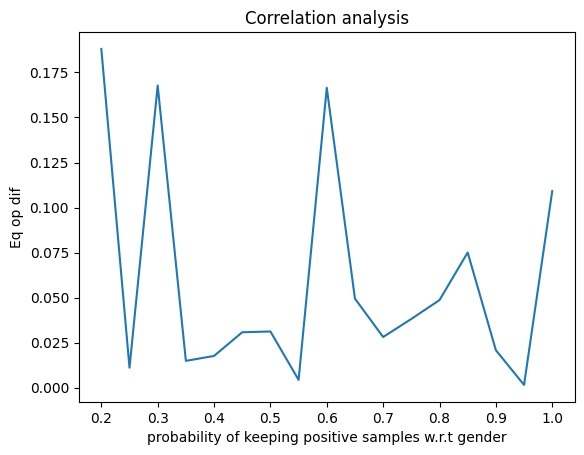

Age correlation: SignificanceResult(statistic=-0.04166666666666667, pvalue=0.8738435327825247)


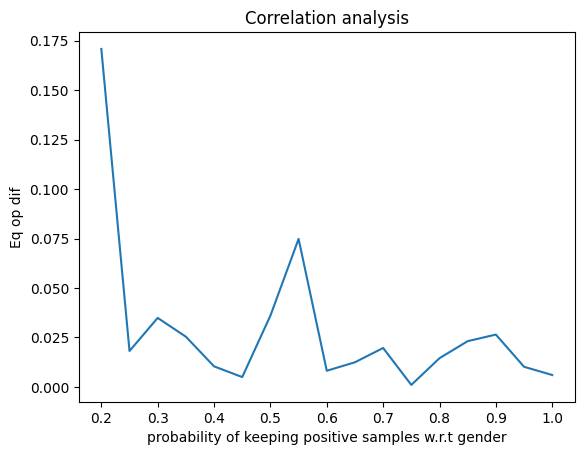

 Gender correlation: SignificanceResult(statistic=-0.40441176470588236, pvalue=0.10737924277811678)


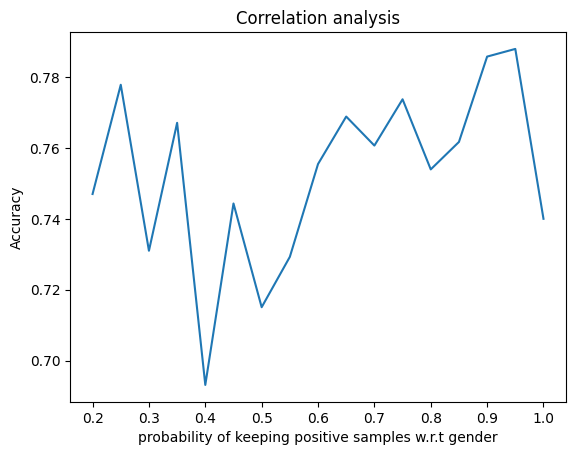

Accuracy correlation: SignificanceResult(statistic=0.3504901960784314, pvalue=0.16781533363739973)




In [57]:
from scipy.stats import spearmanr

print("----------- TRAIN DATA ----------")

print()
print()

print("----- Trend for initial data when injecting bias in age (i.e vary age) ----- ")
print()
find_trend (data_fairness_age=train_initial_fairness_age, data_fairness_gender = train_initial_fairness_gender, data_accuracy = train_acc_scores_initial, 
            correlation_test=spearmanr, ls_p_vary= ls_p1, vary_age = True )
            
print("----- Trend for initial data when injecting bias in gender (i.e. vary gender) ----- ")
print()
find_trend (data_fairness_age=train_initial_fairness_age, data_fairness_gender = train_initial_fairness_gender, data_accuracy = train_acc_scores_initial, 
            correlation_test=spearmanr, ls_p_vary= ls_p2, vary_age = False )


print("----- Trend after optimization w.r.t age when injecting bias in age (i.e vary age) ----- ")
print()
find_trend (data_fairness_age=train_fairness_age_scores_optim_age, data_fairness_gender = train_fairness_gender_scores_optim_age, data_accuracy = train_acc_scores_optim_age, 
            correlation_test=spearmanr, ls_p_vary= ls_p1, vary_age = True )
            
print("----- Trend after optimization w.r.t age when injecting bias in gender (i.e. vary gender) ----- ")
print()
find_trend (data_fairness_age=train_fairness_age_scores_optim_age, data_fairness_gender = train_fairness_gender_scores_optim_age, data_accuracy = train_acc_scores_optim_age, 
            correlation_test=spearmanr, ls_p_vary= ls_p2, vary_age = False )

print("----- Trend after optimization w.r.t gender when injecting bias in age (i.e vary age) ----- ")
print()
find_trend (data_fairness_age=train_fairness_age_scores_optim_gender, data_fairness_gender = train_fairness_gender_scores_optim_gender, data_accuracy = train_acc_scores_optim_gender, 
            correlation_test=spearmanr, ls_p_vary= ls_p1, vary_age = True )
            
print("----- Trend after optimization w.r.t gender when injecting bias in gender (i.e. vary gender) ----- ")
print()
find_trend (data_fairness_age=train_fairness_age_scores_optim_gender, data_fairness_gender = train_fairness_gender_scores_optim_gender, data_accuracy = train_acc_scores_optim_gender, 
            correlation_test=spearmanr, ls_p_vary= ls_p2, vary_age = False )

Trends before and after optimization on test set

----------- TEST DATA ----------


----- Trend for initial data when injecting bias in age (i.e vary age) ----- 



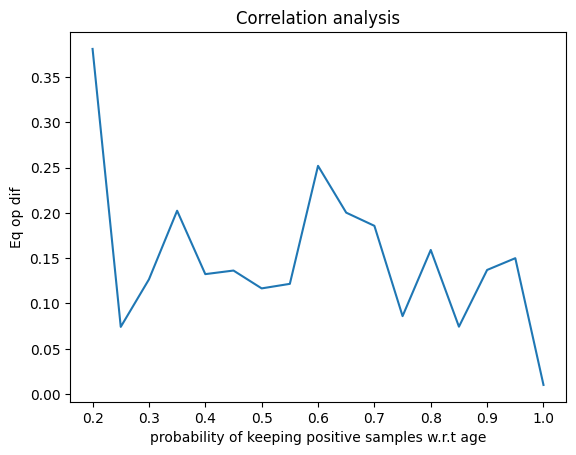

 Age correlation: SignificanceResult(statistic=-0.20098039215686278, pvalue=0.43923387618886767)


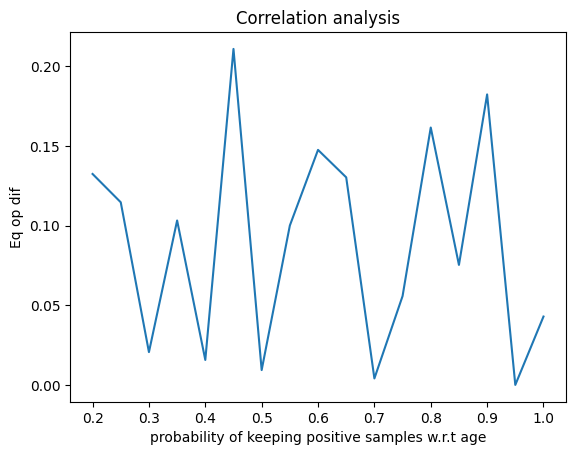

 Gender correlation: SignificanceResult(statistic=-0.13480392156862747, pvalue=0.6059663630124608)


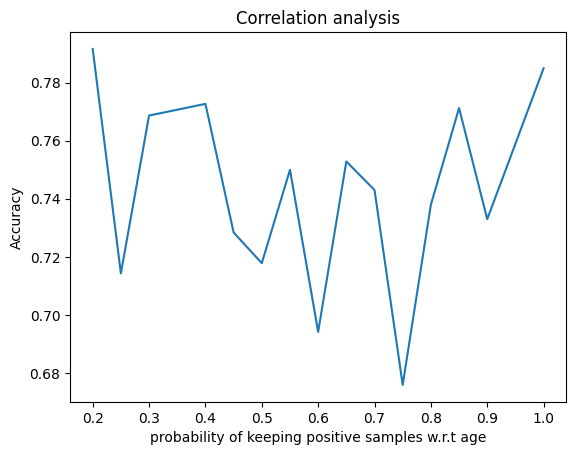

Accuracy correlation: SignificanceResult(statistic=-0.04411764705882353, pvalue=0.8664832749198724)


----- Trend for initial data when injecting bias in gender (i.e. vary gender) ----- 



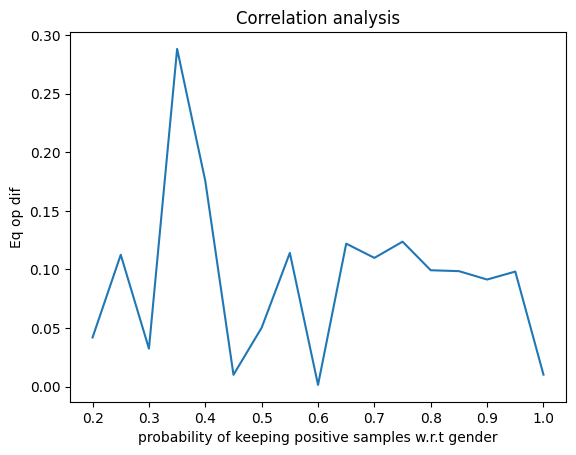

Age correlation: SignificanceResult(statistic=-0.09803921568627452, pvalue=0.708151309718605)


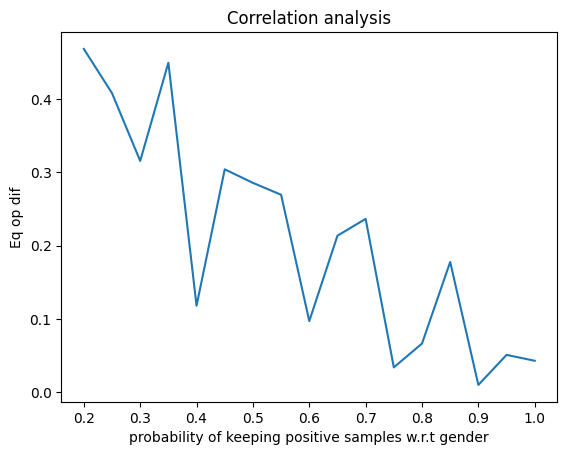

 Gender correlation: SignificanceResult(statistic=-0.8676470588235294, pvalue=6.426473554233677e-06)


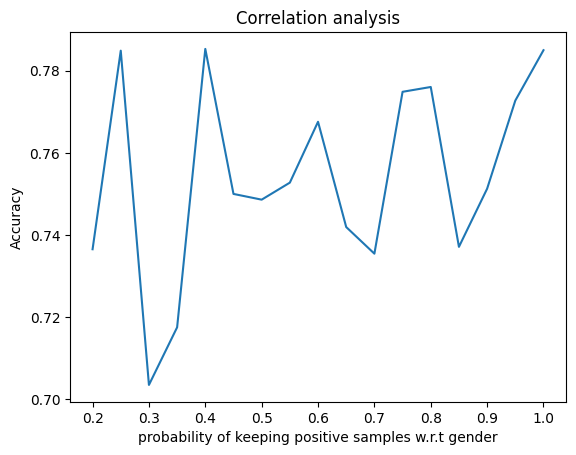

Accuracy correlation: SignificanceResult(statistic=0.31617647058823534, pvalue=0.21632697166875509)


----- Trend after optimization w.r.t age when injecting bias in age (i.e vary age) ----- 



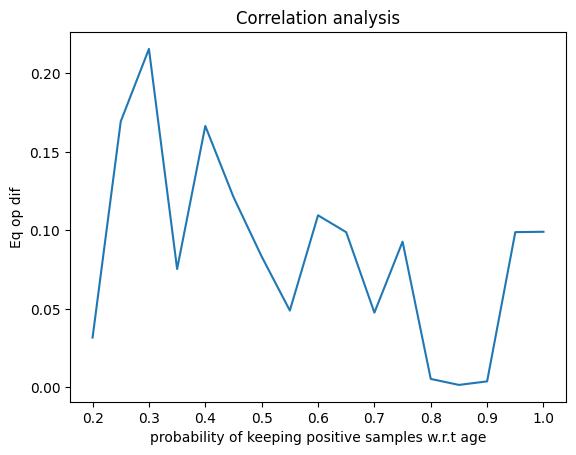

 Age correlation: SignificanceResult(statistic=-0.3823529411764707, pvalue=0.1298634258225738)


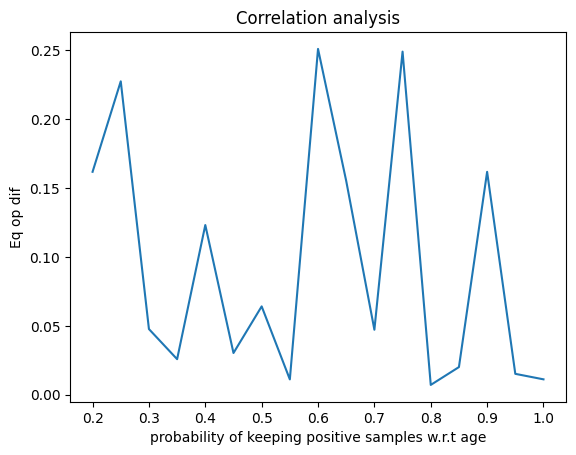

 Gender correlation: SignificanceResult(statistic=-0.37500000000000006, pvalue=0.13803484396804858)


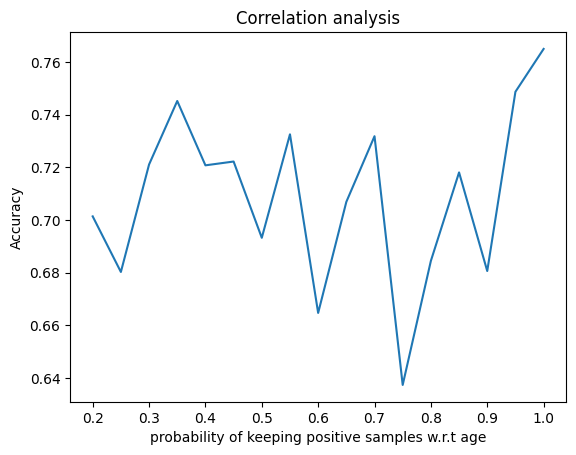

Accuracy correlation: SignificanceResult(statistic=0.13235294117647062, pvalue=0.6125925983674196)


----- Trend after optimization w.r.t age when injecting bias in gender (i.e. vary gender) ----- 



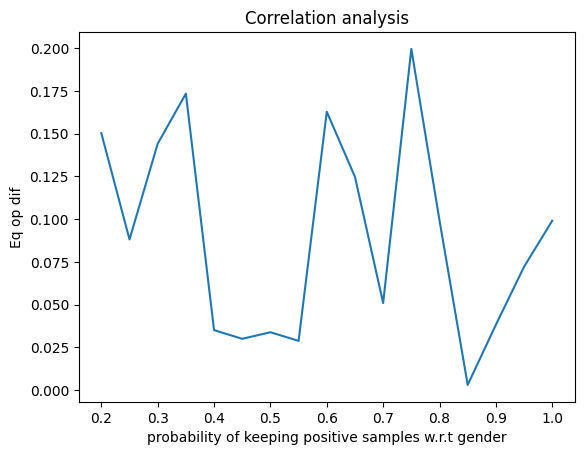

Age correlation: SignificanceResult(statistic=-0.18137254901960786, pvalue=0.4860097755199285)


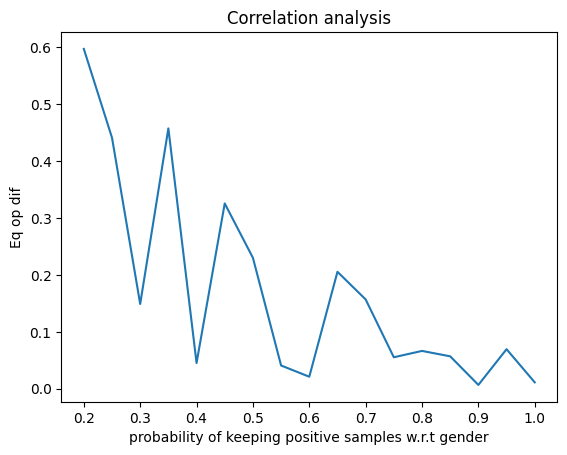

 Gender correlation: SignificanceResult(statistic=-0.6593137254901962, pvalue=0.0039885768126820586)


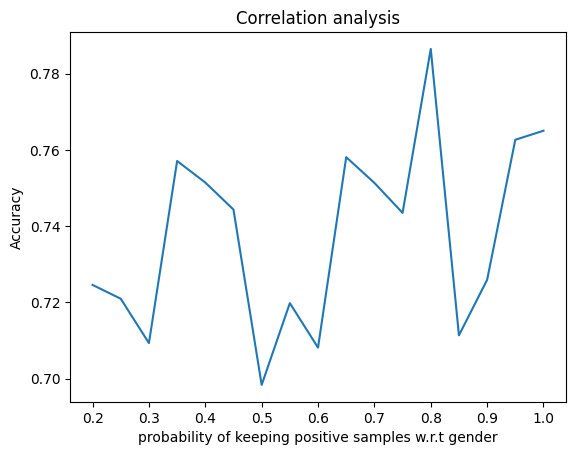

Accuracy correlation: SignificanceResult(statistic=0.4068627450980392, pvalue=0.10506394931044012)


----- Trend after optimization w.r.t gender when injecting bias in age (i.e vary age) ----- 



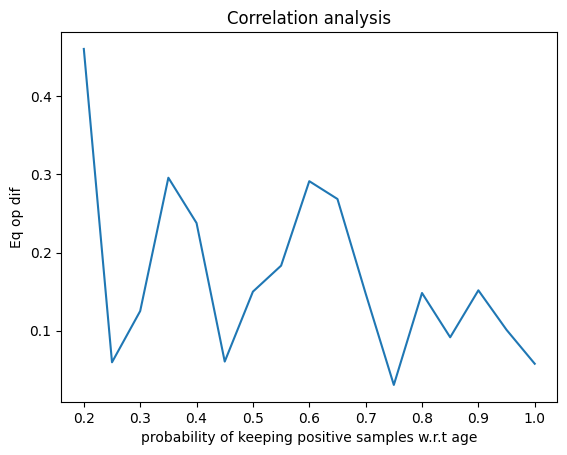

 Age correlation: SignificanceResult(statistic=-0.38480392156862747, pvalue=0.1272159953159875)


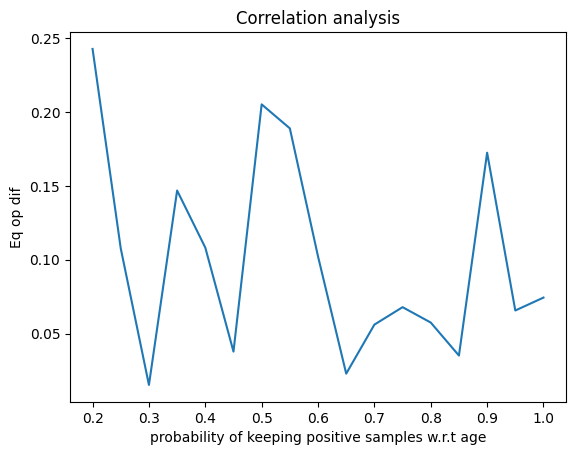

 Gender correlation: SignificanceResult(statistic=-0.2720588235294118, pvalue=0.2907959385044185)


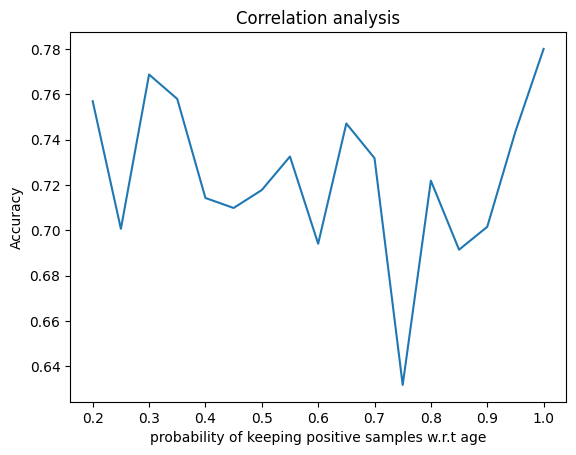

Accuracy correlation: SignificanceResult(statistic=-0.12745098039215688, pvalue=0.6259301508467393)


----- Trend after optimization w.r.t gender when injecting bias in gender (i.e. vary gender) ----- 



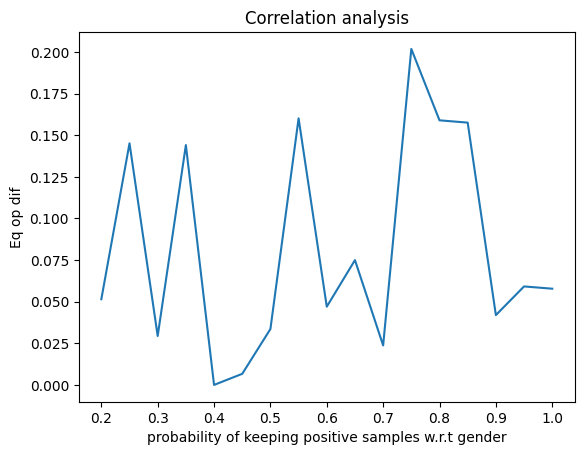

Age correlation: SignificanceResult(statistic=0.24754901960784317, pvalue=0.3380876478588809)


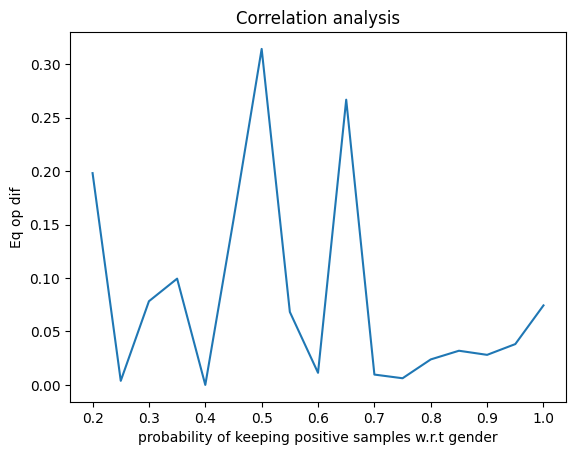

 Gender correlation: SignificanceResult(statistic=-0.17401960784313728, pvalue=0.5041495460552974)


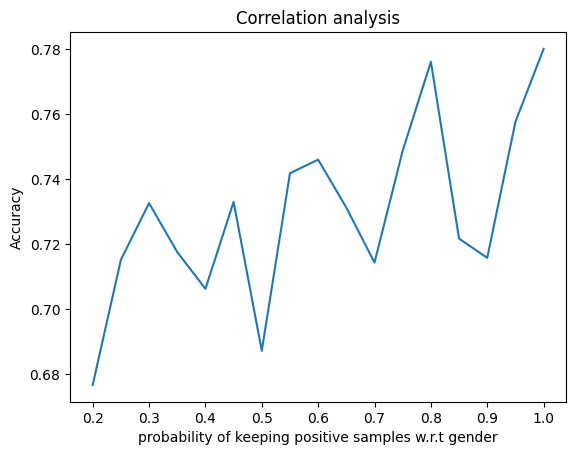

Accuracy correlation: SignificanceResult(statistic=0.590686274509804, pvalue=0.012536389668570057)




In [56]:
from scipy.stats import spearmanr

print("----------- TEST DATA ----------")

print()
print()

print("----- Trend for initial data when injecting bias in age (i.e vary age) ----- ")
print()
find_trend (data_fairness_age=test_initial_fairness_age, data_fairness_gender = test_initial_fairness_gender, data_accuracy = test_acc_scores_initial, 
            correlation_test=spearmanr, ls_p_vary= ls_p1, vary_age = True )
            
print("----- Trend for initial data when injecting bias in gender (i.e. vary gender) ----- ")
print()
find_trend (data_fairness_age=test_initial_fairness_age, data_fairness_gender = test_initial_fairness_gender, data_accuracy = test_acc_scores_initial, 
            correlation_test=spearmanr, ls_p_vary= ls_p2, vary_age = False )


print("----- Trend after optimization w.r.t age when injecting bias in age (i.e vary age) ----- ")
print()
find_trend (data_fairness_age=test_fairness_age_scores_optim_age, data_fairness_gender = test_fairness_gender_scores_optim_age, data_accuracy = test_acc_scores_optim_age, 
            correlation_test=spearmanr, ls_p_vary= ls_p1, vary_age = True )
            
print("----- Trend after optimization w.r.t age when injecting bias in gender (i.e. vary gender) ----- ")
print()
find_trend (data_fairness_age=test_fairness_age_scores_optim_age, data_fairness_gender = test_fairness_gender_scores_optim_age, data_accuracy = test_acc_scores_optim_age, 
            correlation_test=spearmanr, ls_p_vary= ls_p2, vary_age = False )

print("----- Trend after optimization w.r.t gender when injecting bias in age (i.e vary age) ----- ")
print()
find_trend (data_fairness_age=test_fairness_age_scores_optim_gender, data_fairness_gender = test_fairness_gender_scores_optim_gender, data_accuracy = test_acc_scores_optim_gender, 
            correlation_test=spearmanr, ls_p_vary= ls_p1, vary_age = True )
            
print("----- Trend after optimization w.r.t gender when injecting bias in gender (i.e. vary gender) ----- ")
print()
find_trend (data_fairness_age=test_fairness_age_scores_optim_gender, data_fairness_gender = test_fairness_gender_scores_optim_gender, data_accuracy = test_acc_scores_optim_gender, 
            correlation_test=spearmanr, ls_p_vary= ls_p2, vary_age = False )

# How optimization affects the fairness/accuracy
# Correlation Increase in fairness, change (increase/decrease) in accuracy
(i.e. use statistical test that compares the fairness effect with the accuracy effect. i.e. correlation between fairness_after- fairnes_before and acc_after-acc_before and between 2 types of fairness
also do plots with x axis the percentage of positive sample kept and y axis the fairness/acc difference between after and before )


Train data

----------- TRAIN DATA ----------


----- Trends in comparing BEFORE and AFTER optimization w.r.t age when injecting bias in age (i.e vary age) ----- 

Vary age and optimize w.r.t age



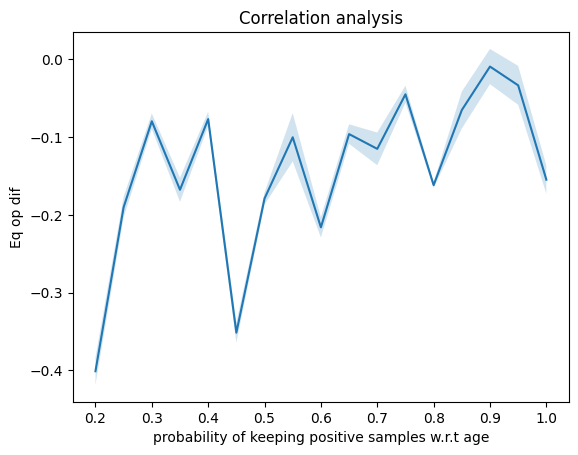

 Correlation between probability of keeping positive samples w.r.t age and age fairness increase: SignificanceResult(statistic=0.573529411764706, pvalue=0.0160814859673801)


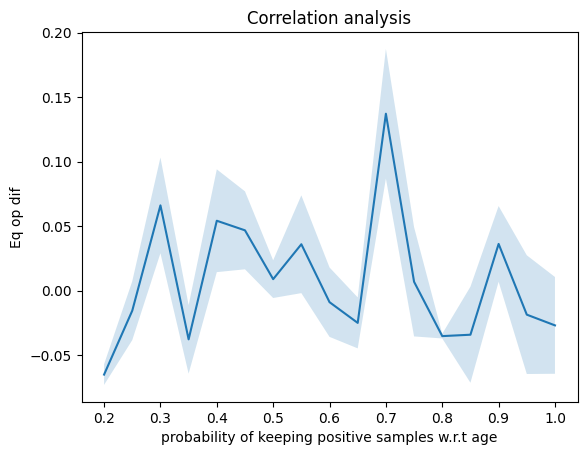

  Correlation between probability of keeping positive samples w.r.t age and gender fairness increase: SignificanceResult(statistic=-0.09068627450980393, pvalue=0.7292353374489888)


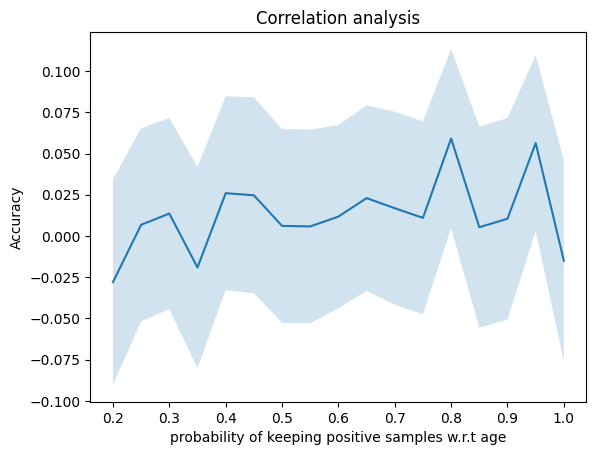

 Correlation between probability of keeping positive samples w.r.t age and accuracy increase: SignificanceResult(statistic=0.2058823529411765, pvalue=0.4279148531427077)

-- RESULTS ABOUT CORRELATION BETWEEN FAIRNESS AND ACC --
Coorelation between age fairness improvement and gender fairness : SignificanceResult(statistic=0.25490196078431376, pvalue=0.32346003406511037)
Coorelation between age fairness improvement and accuracy : SignificanceResult(statistic=0.25980392156862747, pvalue=0.31391716151942517)


----- Trends in comparing BEOFRE and AFTER optimization  w.r.t gender when injecting bias in gender (i.e. vary gender) ----- 

Vary gender and optimize w.r.t gender



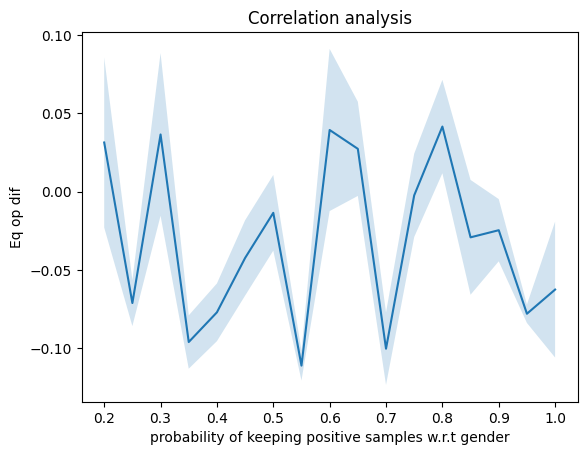

 Correlation between probability of keeping positive samples w.r.t gender and age fairness increase: SignificanceResult(statistic=-0.03921568627450981, pvalue=0.8812135857007628)


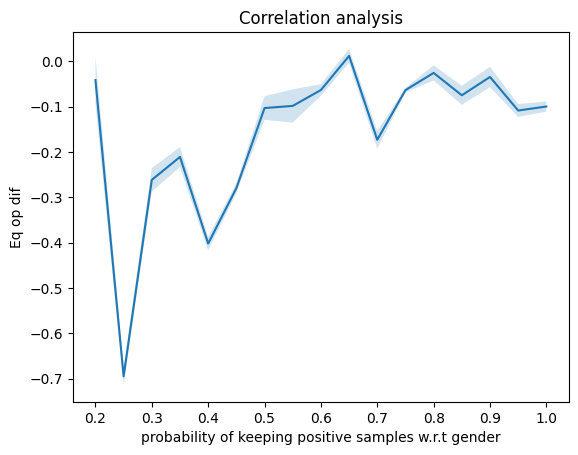

 Correlation between probability of keeping positive samples w.r.t gender and gender fairness increase: SignificanceResult(statistic=0.45098039215686275, pvalue=0.06923198585336185)


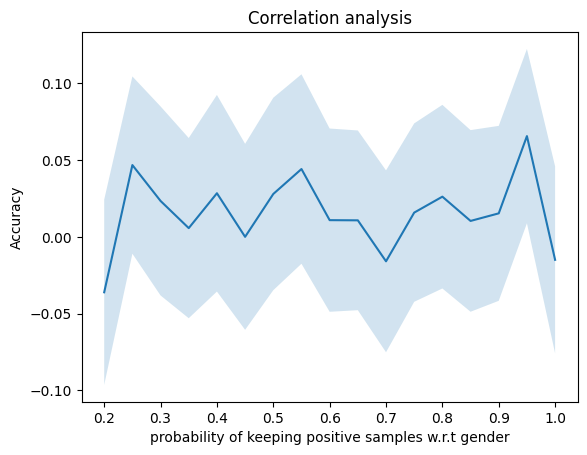

Correlation between probability of keeping positive samples w.r.t gender and accuracy increase:: SignificanceResult(statistic=-0.009803921568627453, pvalue=0.9702105713958575)

-- RESULTS ABOUT CORRELATION BETWEEN FAIRNESS AND ACC --
Coorelation between gender fairness improvement and age fairness : SignificanceResult(statistic=0.5612745098039216, pvalue=0.019063465403200246)
Coorelation between gender fairness improvement and accuracy : SignificanceResult(statistic=-0.22058823529411767, pvalue=0.3948890883363402)




In [54]:
from scipy.stats import spearmanr

print("----------- TRAIN DATA ----------")

print()
print()


print("----- Trends in comparing BEFORE and AFTER optimization w.r.t age when injecting bias in age (i.e vary age) ----- ")
print()
find_trend_optimization(before_fairness_age = train_initial_fairness_age , before_fairness_gender= train_initial_fairness_gender, before_accuracy = train_acc_scores_initial,
                        after_fairness_age = train_fairness_age_scores_optim_age, after_fairness_gender = train_fairness_gender_scores_optim_age, after_accuracy = train_acc_scores_optim_age,
                        correlation_test = spearmanr, ls_p_vary = ls_p1, vary_age=True, size1=X_val_with_A.shape[0], size2=X_val_with_A.shape[0])
    
            
         
print("----- Trends in comparing BEOFRE and AFTER optimization  w.r.t gender when injecting bias in gender (i.e. vary gender) ----- ")
print()
find_trend_optimization(before_fairness_age = train_initial_fairness_age , before_fairness_gender= train_initial_fairness_gender, before_accuracy = train_acc_scores_initial,
                        after_fairness_age = train_fairness_age_scores_optim_gender, after_fairness_gender = train_fairness_gender_scores_optim_gender, after_accuracy = train_acc_scores_optim_gender,
                        correlation_test = spearmanr, ls_p_vary = ls_p1, vary_age=False, size1=X_val_with_A.shape[0], size2=X_val_with_A.shape[0])


## Maybe also compare optimiz age when vary gender just to check that there is no clear correlation

Test data

----------- TEST DATA ----------


----- Trends in comparing BEFORE and AFTER optimization w.r.t age when injecting bias in age (i.e vary age) ----- 

Vary age and optimize w.r.t age



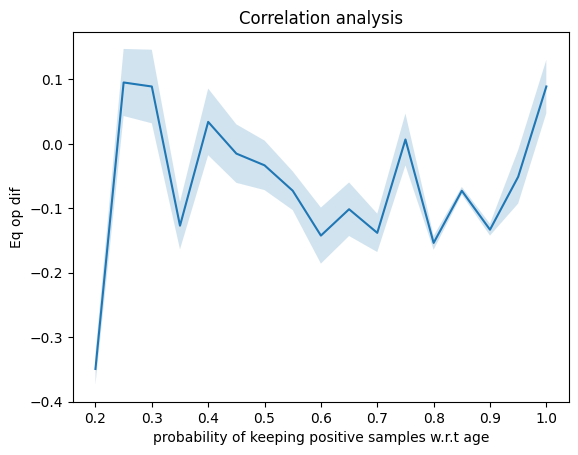

 Correlation between probability of keeping positive samples w.r.t age and age fairness increase: SignificanceResult(statistic=-0.09803921568627452, pvalue=0.708151309718605)


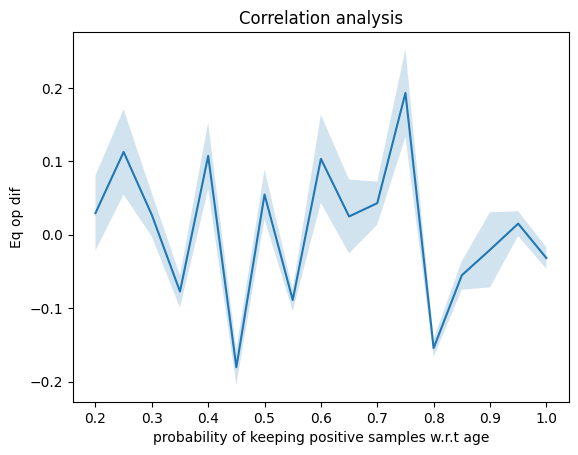

  Correlation between probability of keeping positive samples w.r.t age and gender fairness increase: SignificanceResult(statistic=-0.26715686274509803, pvalue=0.2999179120959026)


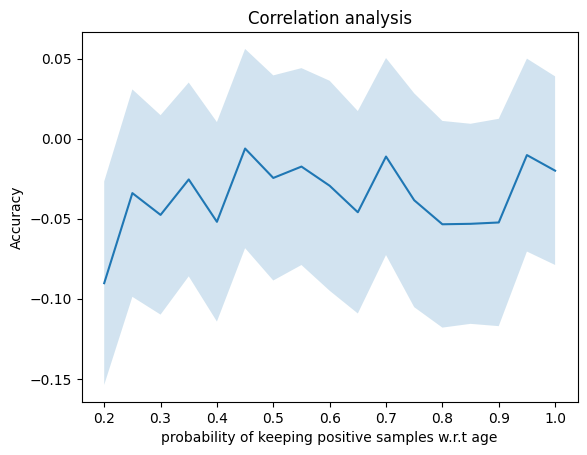

 Correlation between probability of keeping positive samples w.r.t age and accuracy increase: SignificanceResult(statistic=0.12990196078431374, pvalue=0.6192473366524133)

-- RESULTS ABOUT CORRELATION BETWEEN FAIRNESS AND ACC --
Coorelation between age fairness improvement and gender fairness : SignificanceResult(statistic=0.24754901960784317, pvalue=0.3380876478588809)
Coorelation between age fairness improvement and accuracy : SignificanceResult(statistic=0.303921568627451, pvalue=0.23563584127730533)


----- Trends in comparing BEOFRE and AFTER optimization  w.r.t gender when injecting bias in gender (i.e. vary gender) ----- 

Vary gender and optimize w.r.t gender



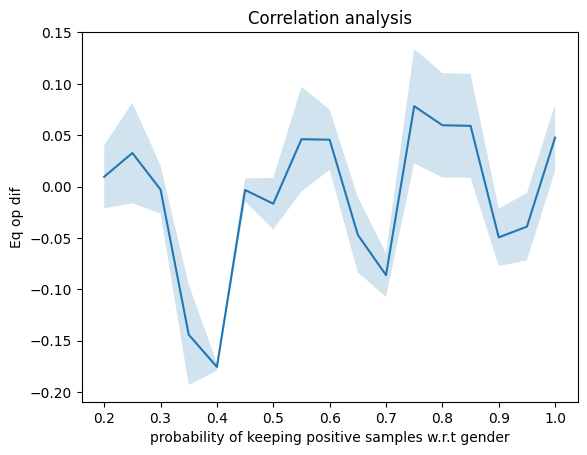

 Correlation between probability of keeping positive samples w.r.t gender and age fairness increase: SignificanceResult(statistic=0.2524509803921569, pvalue=0.32829422956501797)


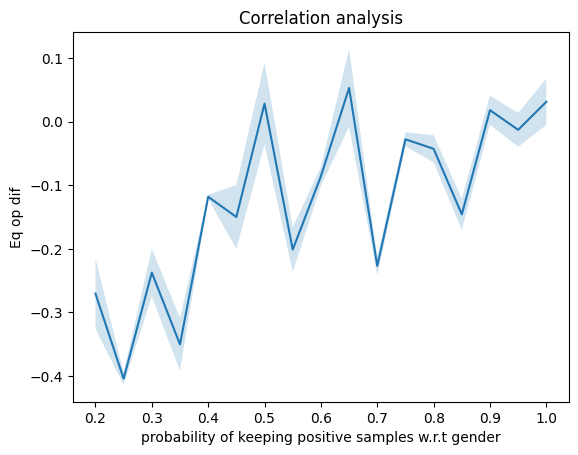

 Correlation between probability of keeping positive samples w.r.t gender and gender fairness increase: SignificanceResult(statistic=0.7156862745098039, pvalue=0.001235508800786355)


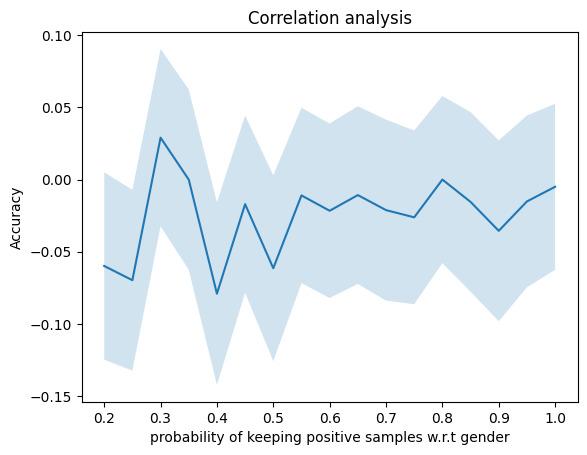

Correlation between probability of keeping positive samples w.r.t gender and accuracy increase:: SignificanceResult(statistic=0.2538320526148749, pvalue=0.32556513305101664)

-- RESULTS ABOUT CORRELATION BETWEEN FAIRNESS AND ACC --
Coorelation between gender fairness improvement and age fairness : SignificanceResult(statistic=0.07352941176470588, pvalue=0.779127287251723)
Coorelation between gender fairness improvement and accuracy : SignificanceResult(statistic=0.03801349580222765, pvalue=0.8848319590758248)




In [55]:
from scipy.stats import spearmanr

print("----------- TEST DATA ----------")

print()
print()


print("----- Trends in comparing BEFORE and AFTER optimization w.r.t age when injecting bias in age (i.e vary age) ----- ")
print()
find_trend_optimization(before_fairness_age = test_initial_fairness_age , before_fairness_gender= test_initial_fairness_gender, before_accuracy = test_acc_scores_initial,
                        after_fairness_age = test_fairness_age_scores_optim_age, after_fairness_gender = test_fairness_gender_scores_optim_age, after_accuracy = test_acc_scores_optim_age,
                        correlation_test = spearmanr, ls_p_vary = ls_p1, vary_age=True, size1=X_test_with_A.shape[0], size2=X_test_with_A.shape[0])
    
            
         
print("----- Trends in comparing BEOFRE and AFTER optimization  w.r.t gender when injecting bias in gender (i.e. vary gender) ----- ")
print()
find_trend_optimization(before_fairness_age = test_initial_fairness_age , before_fairness_gender= test_initial_fairness_gender, before_accuracy = test_acc_scores_initial,
                        after_fairness_age = test_fairness_age_scores_optim_gender, after_fairness_gender = test_fairness_gender_scores_optim_gender, after_accuracy = test_acc_scores_optim_gender,
                        correlation_test = spearmanr, ls_p_vary = ls_p1, vary_age=False, size1=X_test_with_A.shape[0], size2=X_test_with_A.shape[0])


## Maybe also compare optimiz age when vary gender just to check that there is no clear correlation

# Correlation Increase in fairness, change (increase/decrease) in accuracy
(i.e. use statistical test that compares the fairness effect with the accuracy effect. i.e. correlation between fairness_after- fairnes_before and acc_after-acc_before )


Train set

Test set

# Shap analysis

In [12]:
import joblib
import shap
model=best_lr_A = joblib.load(f'../ML_models/German_credit_biased/best_logistic_regression_A_model_0.2_1.pkl')
explainer = shap.TreeExplainer(model)
X_train_with_A = pd.read_csv(os.path.join('../Dataframes/German_credit_biased', f'X_train_with_A_0.2_1.csv'))
X_test_with_A = pd.read_csv(os.path.join('../Dataframes/German_credit_biased', f'X_test_with_A_0.2_1.csv'))
shap_values = explainer.shap_values(X)
model
# Create a Shap dependency plot for Feature1
shap.dependence_plot('Feature1', shap_values, X)

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._logistic.LogisticRegression'>